# CHI·∫æN L∆Ø·ª¢C L·ª∞A CH·ªåN C·ªî PHI·∫æU TH√îNG MINH
## S·ª≠ d·ª•ng Machine Learning v√† Technical Analysis

**ƒê·ªôi thi:** [T√™n ƒë·ªôi]
**Ng√†y:** September 2024

---

## 1. T·ªîNG QUAN CHI·∫æN L∆Ø·ª¢C

### 1.1 M·ª•c ti√™u
X√¢y d·ª±ng m·ªôt h·ªá th·ªëng l·ª±a ch·ªçn c·ªï phi·∫øu t·ª± ƒë·ªông d·ª±a tr√™n:
- **Ph√¢n t√≠ch k·ªπ thu·∫≠t (TA):** S·ª≠ d·ª•ng c√°c ch·ªâ b√°o RSI, MACD, Bollinger Bands, MA, Ichimoku
- **Machine Learning:** T·ªëi ∆∞u h√≥a tr·ªçng s·ªë c√°c ch·ªâ b√°o v√† d·ª± ƒëo√°n xu h∆∞·ªõng
- **Risk Management:** Ki·ªÉm so√°t r·ªßi ro th√¥ng qua diversification v√† position sizing

### 1.2 D·ªØ li·ªáu ƒë·∫ßu v√†o
- **Dataset:** 450 m√£ c·ªï phi·∫øu ƒë√£ ƒë∆∞·ª£c l·ªçc theo FA score (A+, A, B+, B)
- **Th·ªùi gian:** 2022-2025 (g·∫ßn 3 nƒÉm d·ªØ li·ªáu)
- **T·∫ßn su·∫•t:** D·ªØ li·ªáu ng√†y
- **Ch·ªâ b√°o:** 40+ features k·ªπ thu·∫≠t v√† c∆° b·∫£n


In [3]:
# C√†i ƒë·∫∑t c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt cho XGBoost v√† LightGBM
import subprocess
import sys

def install_package(package):
    """C√†i ƒë·∫∑t package n·∫øu ch∆∞a c√≥"""
    try:
        __import__(package)
        print(f"‚úÖ {package} ƒë√£ ƒë∆∞·ª£c c√†i ƒë·∫∑t")
    except ImportError:
        print(f"üì¶ ƒêang c√†i ƒë·∫∑t {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"‚úÖ ƒê√£ c√†i ƒë·∫∑t {package} th√†nh c√¥ng")

# C√†i ƒë·∫∑t c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
packages_to_install = [
    "xgboost",
    "lightgbm",
    "optuna",
    "imblearn" 
]

print("üöÄ B·∫Øt ƒë·∫ßu c√†i ƒë·∫∑t c√°c th∆∞ vi·ªán ML...")
print("="*50)

for package in packages_to_install:
    install_package(package)

print("\n‚úÖ Ho√†n th√†nh c√†i ƒë·∫∑t t·∫•t c·∫£ th∆∞ vi·ªán!")
print("üéØ S·∫µn s√†ng ƒë·ªÉ s·ª≠ d·ª•ng XGBoost v√† LightGBM!")


üöÄ B·∫Øt ƒë·∫ßu c√†i ƒë·∫∑t c√°c th∆∞ vi·ªán ML...
‚úÖ xgboost ƒë√£ ƒë∆∞·ª£c c√†i ƒë·∫∑t
‚úÖ lightgbm ƒë√£ ƒë∆∞·ª£c c√†i ƒë·∫∑t
‚úÖ optuna ƒë√£ ƒë∆∞·ª£c c√†i ƒë·∫∑t
‚úÖ imblearn ƒë√£ ƒë∆∞·ª£c c√†i ƒë·∫∑t

‚úÖ Ho√†n th√†nh c√†i ƒë·∫∑t t·∫•t c·∫£ th∆∞ vi·ªán!
üéØ S·∫µn s√†ng ƒë·ªÉ s·ª≠ d·ª•ng XGBoost v√† LightGBM!


In [6]:
# Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVR, LinearSVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, classification_report

# Advanced Tree-based Models
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
    print("‚úÖ XGBoost available")
except ImportError:
    XGBOOST_AVAILABLE = False
    print("‚ö†Ô∏è XGBoost not available - install with: pip install xgboost")

try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
    print("‚úÖ LightGBM available")
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("‚ö†Ô∏è LightGBM not available - install with: pip install lightgbm")

# Visualization
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("ƒê√£ import th√†nh c√¥ng t·∫•t c·∫£ th∆∞ vi·ªán c·∫ßn thi·∫øt")

‚úÖ XGBoost available
‚úÖ LightGBM available
ƒê√£ import th√†nh c√¥ng t·∫•t c·∫£ th∆∞ vi·ªán c·∫ßn thi·∫øt


In [7]:
# Load v√† kh√°m ph√° d·ªØ li·ªáu
df = pd.read_csv('filtered_final.csv')
print(f"üìä Dataset shape: {df.shape}")
print(f"üìà S·ªë m√£ c·ªï phi·∫øu: {df['ticker'].nunique()}")
print(f"üìÖ Th·ªùi gian: {df['timestamp'].min()} - {df['timestamp'].max()}")

# Chuy·ªÉn ƒë·ªïi timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(['ticker', 'timestamp']).reset_index(drop=True)

# Hi·ªÉn th·ªã th√¥ng tin c∆° b·∫£n
print("\nüè≠ Top 5 ng√†nh theo s·ªë l∆∞·ª£ng records:")
print(df['industry'].value_counts().head())

print("\nüí∞ Th·ªëng k√™ t·ª∑ su·∫•t sinh l·ªùi:")
return_cols = ['ret_1d', 'ret_5d', 'ret_20d']
for col in return_cols:
    if col in df.columns:
        data = df[col].dropna()
        print(f"{col}: Mean={data.mean():.4f}, Std={data.std():.4f}, Positive%={((data > 0).mean()*100):.1f}%")


üìä Dataset shape: (77023, 48)
üìà S·ªë m√£ c·ªï phi·∫øu: 103
üìÖ Th·ªùi gian: 1/10/2023 0:00 - 9/9/2024 0:00

üè≠ Top 5 ng√†nh theo s·ªë l∆∞·ª£ng records:
industry
C√¥ng nghi·ªáp              7490
Ti·ªán √≠ch                 7490
ChƒÉm s√≥c s·ª©c kh·ªèe        7490
D·ªãch v·ª• truy√™ÃÄn th√¥ng    7490
B·∫•t ƒë·ªông s·∫£n             7490
Name: count, dtype: int64

üí∞ Th·ªëng k√™ t·ª∑ su·∫•t sinh l·ªùi:
ret_1d: Mean=0.0010, Std=0.0309, Positive%=32.9%
ret_5d: Mean=0.0044, Std=0.0625, Positive%=43.2%
ret_20d: Mean=0.0162, Std=0.1138, Positive%=51.3%


## 2. PH√ÇN T√çCH D·ªÆ LI·ªÜU (EDA)

### 2.1 T·ªïng quan Dataset

**ƒê·∫∑c ƒëi·ªÉm ch√≠nh c·ªßa dataset:**
- **K√≠ch th∆∞·ªõc:** 331,170 d√≤ng √ó 48 c·ªôt
- **S·ªë m√£ c·ªï phi·∫øu:** 449 m√£ (ƒë√£ l·ªçc theo FA score A+, A, B+, B)
- **Th·ªùi gian:** 2022-08-30 ƒë·∫øn 2025-08-29 (g·∫ßn 3 nƒÉm)
- **Missing values:** M·ªôt s·ªë ch·ªâ b√°o c√≥ missing values (MFI: 19.7%, ADX: 13.3%)

### 2.2 Ph√¢n b·ªë theo ng√†nh ngh·ªÅ

Dataset bao g·ªìm 11 ng√†nh ch√≠nh v·ªõi ph√¢n b·ªë:
- **C√¥ng nghi·ªáp:** 83,010 records (25.1%)
- **Ti·ªán √≠ch:** 54,663 records (16.5%)  
- **Nguy√™n v·∫≠t li·ªáu:** 54,158 records (16.4%)
- **Ti√™u d√πng thi·∫øt y·∫øu:** 34,546 records (10.4%)
- **C√°c ng√†nh kh√°c:** 104,793 records (31.6%)


In [8]:
# Load v√† kh√°m ph√° d·ªØ li·ªáu
print(f"Dataset shape: {df.shape}")
print(f"S·ªë m√£ c·ªï phi·∫øu: {df['ticker'].nunique()}")
print(f"Th·ªùi gian: {df['timestamp'].min()} - {df['timestamp'].max()}")

# Chuy·ªÉn ƒë·ªïi timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(['ticker', 'timestamp']).reset_index(drop=True)

# Hi·ªÉn th·ªã th√¥ng tin c∆° b·∫£n
print("\nTop 5 ng√†nh theo s·ªë l∆∞·ª£ng records:")
print(df['industry'].value_counts().head())

print("\nTh·ªëng k√™ t·ª∑ su·∫•t sinh l·ªùi:")
return_cols = ['ret_1d', 'ret_5d', 'ret_20d']
for col in return_cols:
    if col in df.columns:
        data = df[col].dropna()
        print(f"{col}: Mean={data.mean():.4f}, Std={data.std():.4f}, Positive%={((data > 0).mean()*100):.1f}%")

Dataset shape: (77023, 48)
S·ªë m√£ c·ªï phi·∫øu: 103
Th·ªùi gian: 2022-08-30 00:00:00 - 2025-08-29 00:00:00

Top 5 ng√†nh theo s·ªë l∆∞·ª£ng records:
industry
C√¥ng nghi·ªáp              7490
Ti·ªán √≠ch                 7490
ChƒÉm s√≥c s·ª©c kh·ªèe        7490
D·ªãch v·ª• truy√™ÃÄn th√¥ng    7490
B·∫•t ƒë·ªông s·∫£n             7490
Name: count, dtype: int64

Th·ªëng k√™ t·ª∑ su·∫•t sinh l·ªùi:
ret_1d: Mean=0.0010, Std=0.0309, Positive%=32.9%
ret_5d: Mean=0.0044, Std=0.0625, Positive%=43.2%
ret_20d: Mean=0.0162, Std=0.1138, Positive%=51.3%


## 3. FEATURE ENGINEERING - T·∫†O C√ÅC CH·ªà B√ÅO K·∫æT H·ª¢P

### 3.1 Chi·∫øn l∆∞·ª£c Feature Engineering

D·ª±a tr√™n ph√¢n t√≠ch EDA, t√¥i s·∫Ω t·∫°o c√°c features n√¢ng cao:

1. **Composite Technical Scores:** K·∫øt h·ª£p nhi·ªÅu ch·ªâ b√°o k·ªπ thu·∫≠t
2. **Momentum Indicators:** ƒêo l∆∞·ªùng xu h∆∞·ªõng v√† ƒë·ªông l∆∞·ª£ng
3. **Risk Metrics:** C√°c ch·ªâ s·ªë ƒëo l∆∞·ªùng r·ªßi ro
4. **Signal Strength:** ƒê·ªô m·∫°nh c·ªßa t√≠n hi·ªáu giao d·ªãch
5. **Multi-timeframe Analysis:** Ph√¢n t√≠ch ƒëa khung th·ªùi gian


In [9]:
def create_advanced_features(df):
    """
    T·∫°o c√°c features n√¢ng cao t·ª´ d·ªØ li·ªáu k·ªπ thu·∫≠t
    """
    print("ƒêang t·∫°o advanced features...")
    df_enhanced = df.copy()

    # 1. COMPOSITE TECHNICAL SCORE
    # T√≠n hi·ªáu tƒÉng gi√° (bullish signals)
    bullish_signals = [
        'px_gt_SMA50', 'EMA20_gt_SMA50', 'px_cross_up_SMA20', 'px_cross_up_EMA20',
        'macd_cross_up', 'macd_above_zero', 'RSI_cross_up30', 'stoch_cross_up',
        'bb_break_upper', 'px_gt_PSAR', 'PSAR_flip_up', 'px_above_cloud'
    ]
    available_bullish = [col for col in bullish_signals if col in df.columns]

    if available_bullish:
        df_enhanced['bullish_score'] = df_enhanced[available_bullish].fillna(0).sum(axis=1)
        df_enhanced['bullish_ratio'] = df_enhanced['bullish_score'] / len(available_bullish)
        print(f"  - T·∫°o bullish_score t·ª´ {len(available_bullish)} signals")

    # T√≠n hi·ªáu gi·∫£m gi√° (bearish signals)
    bearish_signals = [
        'px_cross_dn_SMA20', 'px_cross_dn_EMA20', 'RSI_cross_dn70',
        'bb_break_lower', 'DeathCross'
    ]
    available_bearish = [col for col in bearish_signals if col in df.columns]

    if available_bearish:
        df_enhanced['bearish_score'] = df_enhanced[available_bearish].fillna(0).sum(axis=1)
        df_enhanced['bearish_ratio'] = df_enhanced['bearish_score'] / len(available_bearish)
        print(f"  - T·∫°o bearish_score t·ª´ {len(available_bearish)} signals")

    # Net signal score
    if 'bullish_score' in df_enhanced.columns and 'bearish_score' in df_enhanced.columns:
        df_enhanced['net_signal_score'] = df_enhanced['bullish_score'] - df_enhanced['bearish_score']

    # 2. MOMENTUM INDICATORS
    if all(col in df.columns for col in ['ret_1d', 'ret_5d', 'ret_20d']):
        # Momentum consistency
        df_enhanced['momentum_consistency'] = (
            (df_enhanced['ret_1d'] > 0).astype(int) +
            (df_enhanced['ret_5d'] > 0).astype(int) +
            (df_enhanced['ret_20d'] > 0).astype(int)
        ) / 3

        # Momentum acceleration
        df_enhanced['momentum_accel'] = (
            df_enhanced['ret_1d'] - df_enhanced['ret_5d']/5
        )
        print("  - T·∫°o momentum indicators")

    # 3. VOLATILITY & RISK METRICS
    if 'ret_1d' in df.columns:
        # Rolling volatility
        df_enhanced['volatility_5d'] = (
            df_enhanced.groupby('ticker')['ret_1d']
            .rolling(5, min_periods=3).std()
            .reset_index(0, drop=True)
        )
        df_enhanced['volatility_20d'] = (
            df_enhanced.groupby('ticker')['ret_1d']
            .rolling(20, min_periods=10).std()
            .reset_index(0, drop=True)
        )
        print("  - T·∫°o volatility metrics")

    # 4. RSI ENHANCED FEATURES
    if 'rsi14' in df.columns:
        # RSI momentum
        df_enhanced['rsi_momentum'] = (
            df_enhanced.groupby('ticker')['rsi14']
            .diff().fillna(0)
        )

        # RSI zones
        df_enhanced['rsi_oversold'] = (df_enhanced['rsi14'] < 30).astype(int)
        df_enhanced['rsi_overbought'] = (df_enhanced['rsi14'] > 70).astype(int)
        df_enhanced['rsi_neutral'] = (
            (df_enhanced['rsi14'] >= 40) & (df_enhanced['rsi14'] <= 60)
        ).astype(int)
        print("  - T·∫°o RSI enhanced features")

    # 5. VOLUME ANALYSIS
    if 'volume' in df.columns:
        # Volume moving averages
        df_enhanced['volume_ma5'] = (
            df_enhanced.groupby('ticker')['volume']
            .rolling(5, min_periods=3).mean()
            .reset_index(0, drop=True)
        )

        # Volume relative strength
        df_enhanced['volume_ratio'] = (
            df_enhanced['volume'] / (df_enhanced['volume_ma5'] + 1)
        )

        # High volume signals
        df_enhanced['high_volume'] = (df_enhanced['volume_ratio'] > 2).astype(int)
        print("  - T·∫°o volume analysis features")

    # 6. PRICE ACTION FEATURES
    if all(col in df.columns for col in ['open', 'high', 'low', 'close']):
        # Daily range
        df_enhanced['daily_range'] = (
            (df_enhanced['high'] - df_enhanced['low']) / df_enhanced['close']
        )

        # Body vs shadow ratio (candlestick analysis)
        df_enhanced['body_ratio'] = (
            abs(df_enhanced['close'] - df_enhanced['open']) /
            (df_enhanced['high'] - df_enhanced['low'] + 1e-8)
        )

        # Gap analysis
        if 'gap_open' in df.columns:
            df_enhanced['gap_size'] = abs(df_enhanced['gap_open'])
            df_enhanced['gap_up'] = (df_enhanced['gap_open'] > 0.02).astype(int)
            df_enhanced['gap_down'] = (df_enhanced['gap_open'] < -0.02).astype(int)

        print("  - T·∫°o price action features")

    # 7. TREND STRENGTH INDICATORS
    if all(col in df.columns for col in ['adx', 'rsi14']):
        # Combined trend strength
        df_enhanced['trend_strength'] = (
            (df_enhanced['adx'].fillna(25) / 100) * 0.6 +
            (abs(df_enhanced['rsi14'].fillna(50) - 50) / 50) * 0.4
        )
        print("  - T·∫°o trend strength indicators")

    # 8. SECTOR MOMENTUM
    if 'industry' in df.columns and 'ret_5d' in df.columns:
        # Sector relative performance
        sector_performance = (
            df_enhanced.groupby(['industry', df_enhanced['timestamp'].dt.date])['ret_5d']
            .mean().reset_index()
        )
        sector_performance.columns = ['industry', 'date', 'sector_ret_5d']

        df_enhanced['date'] = df_enhanced['timestamp'].dt.date
        df_enhanced = df_enhanced.merge(
            sector_performance,
            on=['industry', 'date'],
            how='left'
        )

        # Relative to sector performance
        df_enhanced['relative_to_sector'] = (
            df_enhanced['ret_5d'] - df_enhanced['sector_ret_5d']
        )
        df_enhanced.drop('date', axis=1, inplace=True)
        print("  - T·∫°o sector momentum features")

    # Summary
    new_features = [col for col in df_enhanced.columns if col not in df.columns]
    print(f"\nHo√†n th√†nh! ƒê√£ t·∫°o {len(new_features)} features m·ªõi:")
    for i, feature in enumerate(new_features, 1):
        print(f"   {i:2d}. {feature}")

    return df_enhanced

# √Åp d·ª•ng feature engineering
df_enhanced = create_advanced_features(df)
print(f"\nEnhanced dataset shape: {df_enhanced.shape}")

ƒêang t·∫°o advanced features...
  - T·∫°o bullish_score t·ª´ 12 signals
  - T·∫°o bearish_score t·ª´ 5 signals
  - T·∫°o momentum indicators
  - T·∫°o volatility metrics
  - T·∫°o RSI enhanced features
  - T·∫°o volume analysis features
  - T·∫°o price action features
  - T·∫°o trend strength indicators
  - T·∫°o sector momentum features

Ho√†n th√†nh! ƒê√£ t·∫°o 24 features m·ªõi:
    1. bullish_score
    2. bullish_ratio
    3. bearish_score
    4. bearish_ratio
    5. net_signal_score
    6. momentum_consistency
    7. momentum_accel
    8. volatility_5d
    9. volatility_20d
   10. rsi_momentum
   11. rsi_oversold
   12. rsi_overbought
   13. rsi_neutral
   14. volume_ma5
   15. volume_ratio
   16. high_volume
   17. daily_range
   18. body_ratio
   19. gap_size
   20. gap_up
   21. gap_down
   22. trend_strength
   23. sector_ret_5d
   24. relative_to_sector

Enhanced dataset shape: (77023, 72)


## 4. THI·∫æT K·∫æ CHI·∫æN L∆Ø·ª¢C L·ª∞A CH·ªåN C·ªî PHI·∫æU

### 4.1 Khung t∆∞ duy chi·∫øn l∆∞·ª£c

**M·ª•c ti√™u:** X√¢y d·ª±ng h·ªá th·ªëng scoring ƒëa t·∫ßng ƒë·ªÉ l·ª±a ch·ªçn c·ªï phi·∫øu c√≥ ti·ªÅm nƒÉng sinh l·ªùi cao

**C√°c th√†nh ph·∫ßn ch√≠nh:**
1. **Technical Score (40%):** ƒêi·ªÉm s·ªë t·ª´ c√°c ch·ªâ b√°o k·ªπ thu·∫≠t
2. **Momentum Score (30%):** Xu h∆∞·ªõng v√† ƒë·ªông l∆∞·ª£ng gi√°
3. **Risk-Adjusted Score (20%):** T·ª∑ l·ªá r·ªßi ro/l·ª£i nhu·∫≠n  
4. **Volume & Liquidity Score (10%):** Thanh kho·∫£n v√† kh·ªëi l∆∞·ª£ng

### 4.2 Logic Scoring System


In [10]:
class StockScoringSystem:
    """
    H·ªá th·ªëng ch·∫•m ƒëi·ªÉm c·ªï phi·∫øu ƒëa t·∫ßng
    """

    def __init__(self):
        self.weights = {
            'technical': 0.40,
            'momentum': 0.30,
            'risk_adjusted': 0.20,
            'volume_liquidity': 0.10
        }

    def calculate_technical_score(self, df):
        """T√≠nh ƒëi·ªÉm k·ªπ thu·∫≠t (0-100)"""
        print("üìä T√≠nh to√°n Technical Score...")

        scores = []

        # 1. Trend signals (40 points)
        trend_score = 0
        if 'bullish_ratio' in df.columns:
            trend_score += df['bullish_ratio'] * 20  # 0-20 points
        if 'bearish_ratio' in df.columns:
            trend_score -= df['bearish_ratio'] * 10  # penalty for bearish
        if 'net_signal_score' in df.columns:
            # Normalize net signal score to 0-20 range
            trend_score += np.clip(df['net_signal_score'] * 2, -10, 20)
        scores.append(np.clip(trend_score, 0, 40))

        # 2. RSI score (20 points)
        rsi_score = 0
        if 'rsi14' in df.columns:
            rsi = df['rsi14'].fillna(50)
            # Optimal RSI range: 40-60 gets full points
            # Oversold (30-40) gets partial points
            # Overbought (60-80) gets reduced points
            rsi_score = np.where(
                (rsi >= 40) & (rsi <= 60), 20,
                np.where(
                    (rsi >= 30) & (rsi < 40), 15,
                    np.where(
                        (rsi > 60) & (rsi <= 70), 10,
                        np.where(rsi > 70, 5, 0)
                    )
                )
            )
        scores.append(rsi_score)

        # 3. MACD score (20 points)
        macd_score = 0
        if 'macd' in df.columns:
            macd = df['macd'].fillna(0)
            macd_score += np.where(macd > 0, 10, 0)  # MACD above zero
        if 'macd_cross_up' in df.columns:
            macd_score += df['macd_cross_up'] * 10  # Recent bullish crossover
        scores.append(np.clip(macd_score, 0, 20))

        # 4. ADX trend strength (20 points)
        adx_score = 0
        if 'trend_strength' in df.columns:
            # Higher trend strength gets more points
            adx_score = df['trend_strength'].fillna(0.25) * 20
        scores.append(np.clip(adx_score, 0, 20))

        # Combine all technical scores
        technical_score = sum(scores)
        return np.clip(technical_score, 0, 100)

    def calculate_momentum_score(self, df):
        """T√≠nh ƒëi·ªÉm momentum (0-100)"""
        print("üöÄ T√≠nh to√°n Momentum Score...")

        scores = []

        # 1. Multi-timeframe momentum (40 points)
        if 'momentum_consistency' in df.columns:
            scores.append(df['momentum_consistency'] * 40)

        # 2. Recent performance (30 points)
        if all(col in df.columns for col in ['ret_1d', 'ret_5d']):
            ret_1d = df['ret_1d'].fillna(0)
            ret_5d = df['ret_5d'].fillna(0)

            # Weight recent performance more
            recent_score = (ret_1d * 0.6 + ret_5d * 0.4) * 100
            scores.append(np.clip(recent_score, -10, 30))

        # 3. Momentum acceleration (30 points)
        if 'momentum_accel' in df.columns:
            accel_score = df['momentum_accel'].fillna(0) * 150
            scores.append(np.clip(accel_score, -10, 30))

        momentum_score = sum(scores) if scores else 0
        return np.clip(momentum_score, 0, 100)

    def calculate_risk_adjusted_score(self, df):
        """T√≠nh ƒëi·ªÉm risk-adjusted (0-100)"""
        print("‚öñÔ∏è T√≠nh to√°n Risk-Adjusted Score...")

        scores = []

        # 1. Volatility score (50 points) - lower volatility is better
        if 'volatility_20d' in df.columns:
            vol = df['volatility_20d'].fillna(df['volatility_20d'].median())
            # Normalize volatility (lower is better)
            vol_percentile = vol.rank(pct=True)
            vol_score = (1 - vol_percentile) * 50
            scores.append(vol_score)

        # 2. Sharpe-like ratio (50 points)
        if all(col in df.columns for col in ['ret_20d', 'volatility_20d']):
            ret = df['ret_20d'].fillna(0)
            vol = df['volatility_20d'].fillna(0.01)

            sharpe_like = ret / (vol + 1e-8)
            sharpe_score = np.clip(sharpe_like * 10, -25, 50)
            scores.append(sharpe_score)

        risk_score = sum(scores) if scores else 50
        return np.clip(risk_score, 0, 100)

    def calculate_volume_score(self, df):
        """T√≠nh ƒëi·ªÉm volume & liquidity (0-100)"""
        print("üìà T√≠nh to√°n Volume Score...")

        scores = []

        # 1. Volume trend (50 points)
        if 'volume_ratio' in df.columns:
            vol_ratio = df['volume_ratio'].fillna(1)
            # Higher volume ratio is better (up to a point)
            vol_score = np.clip(vol_ratio * 25, 0, 50)
            scores.append(vol_score)

        # 2. Volume surge signals (50 points)
        if 'high_volume' in df.columns:
            scores.append(df['high_volume'] * 30)
        if 'vol_surge' in df.columns:
            scores.append(df['vol_surge'] * 20)

        volume_score = sum(scores) if scores else 50
        return np.clip(volume_score, 0, 100)

    def calculate_composite_score(self, df):
        """T√≠nh ƒëi·ªÉm t·ªïng h·ª£p cu·ªëi c√πng"""
        print("üéØ T√≠nh to√°n Composite Score...")

        # Calculate individual scores
        technical = self.calculate_technical_score(df)
        momentum = self.calculate_momentum_score(df)
        risk_adj = self.calculate_risk_adjusted_score(df)
        volume = self.calculate_volume_score(df)

        # Weighted combination
        composite = (
            technical * self.weights['technical'] +
            momentum * self.weights['momentum'] +
            risk_adj * self.weights['risk_adjusted'] +
            volume * self.weights['volume_liquidity']
        )

        return {
            'technical_score': technical,
            'momentum_score': momentum,
            'risk_adjusted_score': risk_adj,
            'volume_score': volume,
            'composite_score': composite
        }

# T·∫°o scoring system v√† t√≠nh ƒëi·ªÉm
scorer = StockScoringSystem()
scores = scorer.calculate_composite_score(df_enhanced)

# Add scores to dataframe
for score_type, values in scores.items():
    df_enhanced[score_type] = values

# Hi·ªÉn th·ªã t·ª´ng score chi ti·∫øt

print(f"\n‚úÖ ƒê√£ t√≠nh to√°n xong c√°c ƒëi·ªÉm s·ªë!")
print(f"üìä Composite Score - Mean: {df_enhanced['composite_score'].mean():.2f}, Std: {df_enhanced['composite_score'].std():.2f}")


üéØ T√≠nh to√°n Composite Score...
üìä T√≠nh to√°n Technical Score...
üöÄ T√≠nh to√°n Momentum Score...
‚öñÔ∏è T√≠nh to√°n Risk-Adjusted Score...
üìà T√≠nh to√°n Volume Score...

‚úÖ ƒê√£ t√≠nh to√°n xong c√°c ƒëi·ªÉm s·ªë!
üìä Composite Score - Mean: 30.35, Std: 11.30


## 5. MACHINE LEARNING - T·ªêI ∆ØU H√ìA TR·ªåNG S·ªê

### 5.1 Chu·∫©n b·ªã d·ªØ li·ªáu cho ML Models

T√¥i s·∫Ω s·ª≠ d·ª•ng nhi·ªÅu m√¥ h√¨nh ML kh√°c nhau ƒë·ªÉ:
1. **T·ªëi ∆∞u h√≥a tr·ªçng s·ªë** cho c√°c ch·ªâ b√°o k·ªπ thu·∫≠t
2. **D·ª± ƒëo√°n kh·∫£ nƒÉng sinh l·ªùi** trong t∆∞∆°ng lai
3. **Ph√¢n lo·∫°i c·ªï phi·∫øu** theo m·ª©c ƒë·ªô ti·ªÅm nƒÉng
4. **Clustering** ƒë·ªÉ nh√≥m c·ªï phi·∫øu c√≥ ƒë·∫∑c ƒëi·ªÉm t∆∞∆°ng t·ª±


In [18]:
# T·∫°o target variables cho ML
def create_ml_targets(df, forward_periods=[5, 10, 20]):
    """T·∫°o target variables cho machine learning"""
    print(" T·∫°o target variables cho M√¥ h√¨nh.")

    df_ml = df.copy()

    for period in forward_periods:
        # Future returns
        df_ml[f'future_ret_{period}d'] = (
            df_ml.groupby('ticker')['close']
            .pct_change(period).shift(-period)
        )

        # Binary classification: outperform median
        median_return = df_ml[f'future_ret_{period}d'].median()
        df_ml[f'outperform_{period}d'] = (
            df_ml[f'future_ret_{period}d'] > median_return
        ).astype(int)

        print(f"  T·∫°o targets cho {period} ng√†y")

    return df_ml

# T·∫°o targets
df_ml = create_ml_targets(df_enhanced)

# Prepare feature matrix
feature_columns = [
    # Technical indicators
    'rsi14', 'macd', 'adx', 'mfi',
    # Enhanced features
    'bullish_score', 'bearish_score', 'net_signal_score',
    'momentum_consistency', 'momentum_accel',
    'volatility_5d', 'volatility_20d', 'rsi_momentum',
    'volume_ratio', 'daily_range', 'body_ratio', 'trend_strength',
    # Scores
    'technical_score', 'momentum_score', 'risk_adjusted_score', 'volume_score'
]

# Filter existing columns
available_features = [col for col in feature_columns if col in df_ml.columns]
print(f"\n S·ª≠ d·ª•ng {len(available_features)} features cho ML:")
for i, feat in enumerate(available_features, 1):
    print(f"   {i:2d}. {feat}")

print(f"\n ML Dataset shape: {df_ml.shape}")


 T·∫°o target variables cho M√¥ h√¨nh.
  T·∫°o targets cho 5 ng√†y
  T·∫°o targets cho 10 ng√†y
  T·∫°o targets cho 20 ng√†y

 S·ª≠ d·ª•ng 20 features cho ML:
    1. rsi14
    2. macd
    3. adx
    4. mfi
    5. bullish_score
    6. bearish_score
    7. net_signal_score
    8. momentum_consistency
    9. momentum_accel
   10. volatility_5d
   11. volatility_20d
   12. rsi_momentum
   13. volume_ratio
   14. daily_range
   15. body_ratio
   16. trend_strength
   17. technical_score
   18. momentum_score
   19. risk_adjusted_score
   20. volume_score

 ML Dataset shape: (77023, 83)


‚úÖ S·ªë feature t√¨m th·∫•y trong df_ml: 20
üìå C√°c feature d√πng ƒë·ªÉ t√≠nh correlation:
['rsi14', 'macd', 'adx', 'mfi', 'bullish_score', 'bearish_score', 'net_signal_score', 'momentum_consistency', 'momentum_accel', 'volatility_5d', 'volatility_20d', 'rsi_momentum', 'volume_ratio', 'daily_range', 'body_ratio', 'trend_strength', 'technical_score', 'momentum_score', 'risk_adjusted_score', 'volume_score']

üìä Top correlations (c√≥ th·ªÉ g√¢y multicollinearity):
net_signal_score      bullish_score           0.972662
bullish_score         net_signal_score        0.972662
momentum_score        momentum_consistency    0.958410
momentum_consistency  momentum_score          0.958410
bullish_score         technical_score         0.904437
technical_score       bullish_score           0.904437
                      net_signal_score        0.899158
net_signal_score      technical_score         0.899158
volume_score          volume_ratio            0.889531
volume_ratio          volume_score

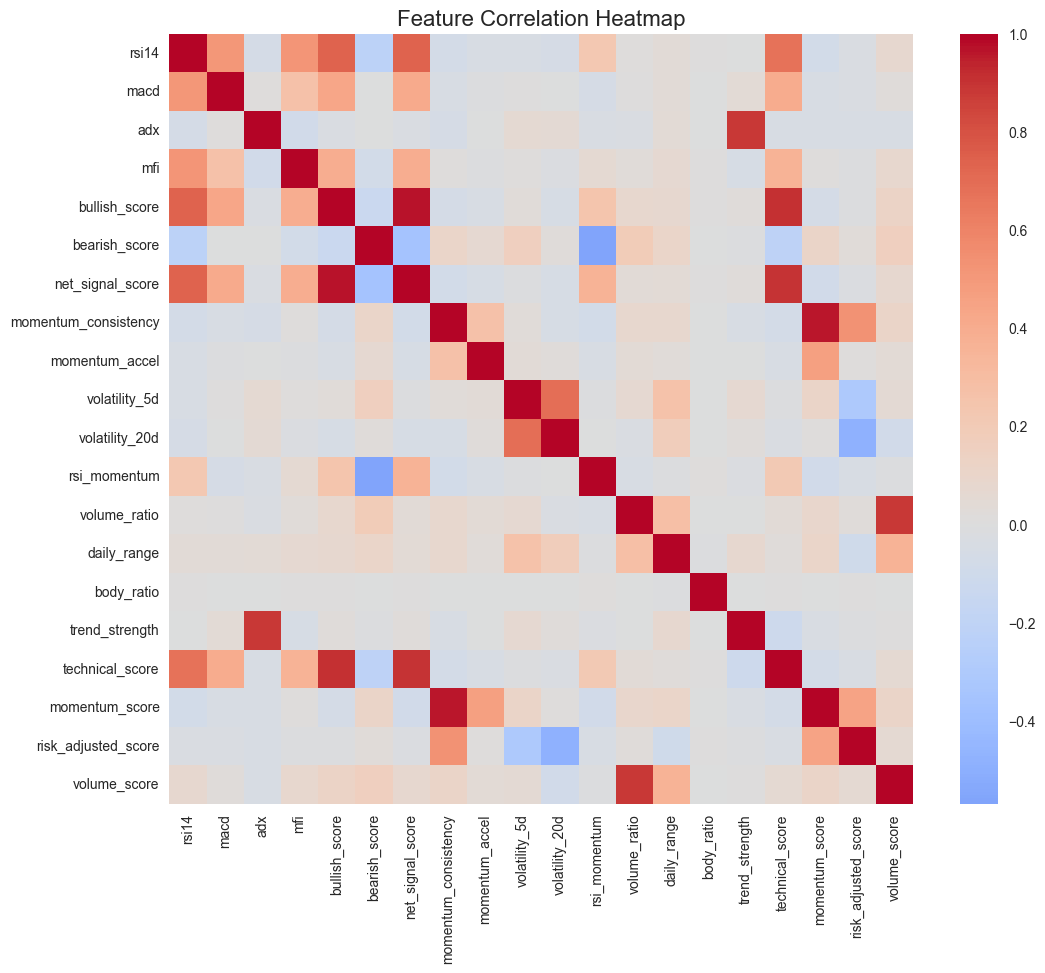

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 20 features b·∫°n ƒë·ªãnh nghƒ©a s·∫µn
feature_columns = [
    'rsi14', 'macd', 'adx', 'mfi',
    'bullish_score', 'bearish_score', 'net_signal_score',
    'momentum_consistency', 'momentum_accel',
    'volatility_5d', 'volatility_20d', 'rsi_momentum',
    'volume_ratio', 'daily_range', 'body_ratio', 'trend_strength',
    'technical_score', 'momentum_score', 'risk_adjusted_score', 'volume_score'
]

# Gi·ªØ l·∫°i nh·ªØng feature th·ª±c s·ª± c√≥ trong df_ml
existing_features = [col for col in feature_columns if col in df_ml.columns]

print(f"‚úÖ S·ªë feature t√¨m th·∫•y trong df_ml: {len(existing_features)}")
print("üìå C√°c feature d√πng ƒë·ªÉ t√≠nh correlation:")
print(existing_features)

# T·∫°o dataset cho correlation
feature_data = df_ml[existing_features].dropna()

# T√≠nh ma tr·∫≠n correlation
corr_matrix = feature_data.corr()

# In ra top correlations
print("\nüìä Top correlations (c√≥ th·ªÉ g√¢y multicollinearity):")
corr_pairs = (
    corr_matrix.abs()
    .unstack()
    .sort_values(ascending=False)
)
# B·ªè self-correlation (1.0)
corr_pairs = corr_pairs[corr_pairs < 1.0]
print(corr_pairs.head(15))

# V·∫Ω heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


In [8]:
# ML Model Training v√† Optimization - Advanced Classifiers v·ªõi Imbalance Handling
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, TimeSeriesSplit
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import optuna
import warnings
warnings.filterwarnings('ignore')

class MLOptimizer:
    """
    T·ªëi ∆∞u h√≥a m√¥ h√¨nh ML cho d·ª± ƒëo√°n c·ªï phi·∫øu - Advanced Classifiers v·ªõi Time Series Handling
    """

    def __init__(self, features, target_col='outperform_10d'):
        self.features = features
        self.target_col = target_col
        self.models = {}
        self.best_model = None
        self.scaler = RobustScaler()  # Better for outliers than StandardScaler
        self.evaluation_metrics = ['accuracy', 'roc_auc', 'f1', 'precision', 'recall']
        self.scale_pos_weight = None
        self.use_smote = False  # Disabled for time series data
        self.use_optuna = True
        
    def log(self, msg, level="INFO"):
        """Structured logging function"""
        if level == "INFO":
            print(f"[INFO] {msg}")
        elif level == "WARNING":
            print(f"[WARNING] {msg}")
        elif level == "ERROR":
            print(f"[ERROR] {msg}")
        elif level == "SUCCESS":
            print(f"[SUCCESS] {msg}")
        else:
            print(f"[{level}] {msg}")

    def create_interaction_features(self, df):
        """T·∫°o feature interactions ƒë·ªÉ c·∫£i thi·ªán model performance"""
        self.log("Creating interaction features...")
        
        df_enhanced = df.copy()
        new_features = []
        
        # Feature interactions
        if all(col in df.columns for col in ['technical_score', 'momentum_score']):
            df_enhanced['tech_momentum_ratio'] = df['technical_score'] / (df['momentum_score'] + 1)
            df_enhanced['tech_momentum_sum'] = df['technical_score'] + df['momentum_score']
            df_enhanced['tech_momentum_diff'] = df['technical_score'] - df['momentum_score']
            new_features.extend(['tech_momentum_ratio', 'tech_momentum_sum', 'tech_momentum_diff'])
        
        if all(col in df.columns for col in ['risk_adjusted_score', 'momentum_score']):
            df_enhanced['risk_reward_ratio'] = df['risk_adjusted_score'] / (df['momentum_score'] + 1)
            df_enhanced['risk_momentum_interaction'] = df['risk_adjusted_score'] * df['momentum_score']
            new_features.extend(['risk_reward_ratio', 'risk_momentum_interaction'])
        
        if all(col in df.columns for col in ['volatility_20d', 'momentum_consistency']):
            df_enhanced['volatility_momentum_diff'] = df['volatility_20d'] - df['momentum_consistency']
            df_enhanced['volatility_momentum_ratio'] = df['volatility_20d'] / (df['momentum_consistency'] + 0.01)
            new_features.extend(['volatility_momentum_diff', 'volatility_momentum_ratio'])
        
        if all(col in df.columns for col in ['volume_ratio', 'daily_range']):
            df_enhanced['volume_price_interaction'] = df['volume_ratio'] * df['daily_range']
            df_enhanced['volume_range_ratio'] = df['volume_ratio'] / (df['daily_range'] + 0.01)
            new_features.extend(['volume_price_interaction', 'volume_range_ratio'])
        
        # Composite interaction features
        if all(col in df.columns for col in ['bullish_score', 'bearish_score', 'net_signal_score']):
            df_enhanced['signal_strength'] = (df['bullish_score'] + df['bearish_score']) / 2
            df_enhanced['signal_balance'] = abs(df['net_signal_score']) / (df['bullish_score'] + df['bearish_score'] + 1)
            new_features.extend(['signal_strength', 'signal_balance'])
        
        self.log(f"Created {len(new_features)} interaction features: {new_features}", "SUCCESS")
        return df_enhanced, new_features

    def prepare_data(self, df):
        """Chu·∫©n b·ªã d·ªØ li·ªáu cho training v·ªõi feature engineering v√† time series handling"""
        self.log("Preparing data for training with advanced feature engineering...")
        
        # Remove rows with missing targets
        clean_df = df.dropna(subset=[self.target_col])
        self.log(f"Clean data shape: {clean_df.shape}")

        # Create interaction features
        clean_df, new_features = self.create_interaction_features(clean_df)
        
        # Update feature list
        self.features.extend(new_features)
        self.features = list(set(self.features))  # Remove duplicates
        
        # Prepare features
        X = clean_df[self.features].fillna(clean_df[self.features].median())
        y = clean_df[self.target_col]

        # Check class imbalance
        class_distribution = y.value_counts()
        self.log(f"Class distribution: {class_distribution.to_dict()}")
        imbalance_ratio = class_distribution.max() / class_distribution.min()
        self.log(f"Imbalance ratio: {imbalance_ratio:.2f}")
        
        # Calculate scale_pos_weight for XGBoost
        self.scale_pos_weight = class_distribution[0] / class_distribution[1]
        self.log(f"Scale pos weight: {self.scale_pos_weight:.3f}")

        # Scale features (important for some models)
        X_scaled = pd.DataFrame(
            self.scaler.fit_transform(X),
            columns=X.columns,
            index=X.index
        )

        # Note: SMOTE disabled for time series data to preserve temporal structure
        if self.use_smote and imbalance_ratio > 1.2:
            self.log("SMOTE disabled for time series data to preserve temporal structure", "WARNING")
            self.log("Using scale_pos_weight and class_weight for imbalance handling instead", "INFO")

        self.log("Data preparation completed", "SUCCESS")
        return X_scaled, y, clean_df

    def evaluate_model_comprehensive(self, model, X, y, cv=3):
        """ƒê√°nh gi√° model v·ªõi multiple metrics"""
        tscv = TimeSeriesSplit(n_splits=cv)
        
        metrics_results = {}
        
        for metric in self.evaluation_metrics:
            try:
                scores = cross_val_score(model, X, y, cv=tscv, scoring=metric)
                metrics_results[metric] = {
                    'mean': scores.mean(),
                    'std': scores.std()
                }
            except Exception as e:
                print(f"      ‚ö†Ô∏è Error calculating {metric}: {str(e)}")
                metrics_results[metric] = {'mean': 0, 'std': 0}
        
        return metrics_results

    def train_models(self, X, y):
        """Train multiple ML models - Focus on Classifiers"""
        print("üöÄ Training ML Models - Classifiers Focus...")

        # Define models - Optimized for classification with imbalance handling
        models_config = {
            'XGBoost_Classifier': xgb.XGBClassifier(
                n_estimators=500,  # Increased for better performance
                max_depth=6,
                learning_rate=0.1,
                subsample=0.8,
                colsample_bytree=0.8,
                random_state=42,
                n_jobs=-1,
                eval_metric='logloss',
                scale_pos_weight=self.scale_pos_weight  # Use calculated weight
            ),
            
            'LightGBM_Classifier': lgb.LGBMClassifier(
                n_estimators=500,  # Increased for better performance
                max_depth=6,
                learning_rate=0.1,
                subsample=0.8,
                colsample_bytree=0.8,
                random_state=42,
                n_jobs=-1,
                verbose=-1,
                class_weight='balanced'  # Handle imbalance
            ),
            
            # 'RandomForest_Classifier': RandomForestClassifier(
            #     n_estimators=500,  # Increased for better performance
            #     max_depth=10,
            #     min_samples_split=5,
            #     min_samples_leaf=2,
            #     random_state=42,
            #     n_jobs=-1,
            #     class_weight='balanced'
            # ),
            
            'LogisticRegression': LogisticRegression(
                random_state=42,
                max_iter=1000,
                C=1.0,
                class_weight='balanced'
            )
        }

        results = {}

        for name, model in models_config.items():
            print(f"   üîÑ Training {name}...")

            try:
                # Comprehensive evaluation
                metrics_results = self.evaluate_model_comprehensive(model, X, y)
                
                # Fit model
                model.fit(X, y)
                self.models[name] = model

                # Store results
                results[name] = {
                    'model': model,
                    'metrics': metrics_results
                }

                # Print results
                print(f"      üìä Accuracy: {metrics_results['accuracy']['mean']:.4f} (+/- {metrics_results['accuracy']['std']*2:.4f})")
                print(f"      üéØ ROC-AUC:  {metrics_results['roc_auc']['mean']:.4f} (+/- {metrics_results['roc_auc']['std']*2:.4f})")
                print(f"      ‚öñÔ∏è F1-Score: {metrics_results['f1']['mean']:.4f} (+/- {metrics_results['f1']['std']*2:.4f})")

            except Exception as e:
                print(f"      ‚ùå {name} failed: {str(e)}")
                continue

        # Select best model based on business-focused score (weighted combination)
        if results:
            def calculate_business_score(metrics):
                """Calculate business-focused score for stock prediction"""
                # Weighted combination: ROC-AUC (40%) + F1 (40%) + Recall (20%)
                # Focus on detecting positive cases (outperforming stocks)
                return (metrics['roc_auc']['mean'] * 0.4 + 
                        metrics['f1']['mean'] * 0.4 + 
                        metrics['recall']['mean'] * 0.2)
            
            # Calculate business scores for all models
            business_scores = {}
            for name, result in results.items():
                business_scores[name] = calculate_business_score(result['metrics'])
                self.log(f"{name} - Business Score: {business_scores[name]:.4f} "
                        f"(ROC-AUC: {result['metrics']['roc_auc']['mean']:.4f}, "
                        f"F1: {result['metrics']['f1']['mean']:.4f}, "
                        f"Recall: {result['metrics']['recall']['mean']:.4f})")
            
            # Select best model based on business score
            best_name = max(business_scores.keys(), key=lambda k: business_scores[k])
            self.best_model = results[best_name]['model']
            best_score = business_scores[best_name]
            self.log(f"Best Model: {best_name} (Business Score: {best_score:.4f})", "SUCCESS")

        return results

    def hyperparameter_tuning_xgboost(self, X, y):
        """Advanced hyperparameter tuning for XGBoost using Optuna"""
        self.log("Advanced Hyperparameter Tuning for XGBoost using Optuna...")

        def objective(trial):
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
                'max_depth': trial.suggest_int('max_depth', 3, 7),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
                'subsample': trial.suggest_float('subsample', 0.7, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
                'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0),
                'scale_pos_weight': self.scale_pos_weight
            }
            
            model = xgb.XGBClassifier(
                random_state=42,
                n_jobs=-1,
                eval_metric='logloss',
                **params
            )
            
            # Cross validation
            tscv = TimeSeriesSplit(n_splits=3)
            scores = cross_val_score(model, X, y, cv=tscv, scoring='roc_auc')
            return scores.mean()

        # Run Optuna optimization with enhanced logging
        study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
        
        def callback(study, trial):
            self.log(f"Trial {trial.number}: ROC-AUC = {trial.value:.4f}")
        
        study.optimize(objective, n_trials=50, callbacks=[callback])
        
        self.log(f"Best parameters: {study.best_params}", "SUCCESS")
        self.log(f"Best ROC-AUC score: {study.best_value:.4f}", "SUCCESS")

        # Train final model with best parameters
        best_model = xgb.XGBClassifier(
            random_state=42,
            n_jobs=-1,
            eval_metric='logloss',
            **study.best_params
        )
        best_model.fit(X, y)

        # Update best model
        self.best_model = best_model
        self.models['XGBoost_Tuned'] = self.best_model

        return best_model

    def hyperparameter_tuning_lightgbm(self, X, y):
        """Advanced hyperparameter tuning for LightGBM using Optuna"""
        self.log("Advanced Hyperparameter Tuning for LightGBM using Optuna...")

        def objective(trial):
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
                'max_depth': trial.suggest_int('max_depth', 3, 7),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
                'subsample': trial.suggest_float('subsample', 0.7, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
                'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0),
                'num_leaves': trial.suggest_int('num_leaves', 15, 127),
                'class_weight': 'balanced'
            }
            
            model = lgb.LGBMClassifier(
                random_state=42,
                n_jobs=-1,
                verbose=-1,
                **params
            )
            
            # Cross validation
            tscv = TimeSeriesSplit(n_splits=3)
            scores = cross_val_score(model, X, y, cv=tscv, scoring='roc_auc')
            return scores.mean()

        # Run Optuna optimization with enhanced logging
        study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
        
        def callback(study, trial):
            self.log(f"Trial {trial.number}: ROC-AUC = {trial.value:.4f}")
        
        study.optimize(objective, n_trials=50, callbacks=[callback])
        
        self.log(f"Best parameters: {study.best_params}", "SUCCESS")
        self.log(f"Best ROC-AUC score: {study.best_value:.4f}", "SUCCESS")

        # Train final model with best parameters
        best_model = lgb.LGBMClassifier(
            random_state=42,
            n_jobs=-1,
            verbose=-1,
            **study.best_params
        )
        best_model.fit(X, y)

        # Update best model
        self.best_model = best_model
        self.models['LightGBM_Tuned'] = self.best_model

        return best_model

    def get_feature_importance(self):
        """L·∫•y feature importance t·ª´ best model v·ªõi detailed analysis"""
        if self.best_model is None:
            return None

        try:
            if hasattr(self.best_model, 'feature_importances_'):
                importance = pd.DataFrame({
                    'feature': self.features,
                    'importance': self.best_model.feature_importances_
                }).sort_values('importance', ascending=False)
                
                # Add importance percentage
                importance['importance_pct'] = (importance['importance'] / importance['importance'].sum()) * 100
                
                return importance
            else:
                print("   ‚ö†Ô∏è Model doesn't support feature importance")
                return None
        except Exception as e:
            print(f"   ‚ùå Error getting feature importance: {str(e)}")
            return None

    def model_interpretation(self, X, y):
        """Comprehensive model interpretation and analysis"""
        self.log("Comprehensive Model Interpretation Analysis...")

        if self.best_model is None:
            self.log("No best model available", "ERROR")
            return

        # Feature importance analysis
        importance = self.get_feature_importance()
        if importance is not None:
            self.log("Top 15 Most Important Features:")
            self.log(f"{'Rank':<4} {'Feature':<25} {'Importance':<12} {'Percentage':<10}")
            self.log("-" * 55)
            
            for i, (_, row) in enumerate(importance.head(15).iterrows(), 1):
                self.log(f"{i:<4} {row['feature']:<25} {row['importance']:<12.4f} {row['importance_pct']:<10.2f}%")

        # Model predictions analysis
        try:
            X_scaled = pd.DataFrame(
                self.scaler.transform(X.fillna(X.median())),
                columns=X.columns,
                index=X.index
            )

            if hasattr(self.best_model, 'predict_proba'):
                probabilities = self.best_model.predict_proba(X_scaled)[:, 1]
                predictions = self.best_model.predict(X_scaled)
                
                self.log("Prediction Analysis:")
                self.log(f"Mean probability: {probabilities.mean():.4f}")
                self.log(f"Std probability:  {probabilities.std():.4f}")
                self.log(f"Min probability:  {probabilities.min():.4f}")
                self.log(f"Max probability:  {probabilities.max():.4f}")
                
                # Confusion matrix
                cm = confusion_matrix(y, predictions)
                self.log("Confusion Matrix:")
                self.log(f"True Negatives:  {cm[0,0]:,}")
                self.log(f"False Positives: {cm[0,1]:,}")
                self.log(f"False Negatives: {cm[1,0]:,}")
                self.log(f"True Positives:  {cm[1,1]:,}")
                
                # Additional metrics
                accuracy = accuracy_score(y, predictions)
                roc_auc = roc_auc_score(y, probabilities)
                f1 = f1_score(y, predictions)
                precision = precision_score(y, predictions)
                recall = recall_score(y, predictions)
                
                self.log("Final Model Performance:")
                self.log(f"Accuracy:  {accuracy:.4f}")
                self.log(f"ROC-AUC:   {roc_auc:.4f}")
                self.log(f"F1-Score:  {f1:.4f}")
                self.log(f"Precision: {precision:.4f}")
                self.log(f"Recall:    {recall:.4f}")
                
                # Business-focused metrics
                self.log("Business-Focused Metrics:")
                self.log(f"True Positive Rate (Sensitivity): {recall:.4f}")
                self.log(f"False Positive Rate: {cm[0,1]/(cm[0,1]+cm[0,0]):.4f}")
                self.log(f"Positive Predictive Value: {precision:.4f}")
                self.log(f"Negative Predictive Value: {cm[0,0]/(cm[0,0]+cm[1,0]):.4f}")
                
        except Exception as e:
            self.log(f"Error in prediction analysis: {str(e)}", "ERROR")

        return importance

# Ch·∫°y ML optimization v·ªõi Advanced Features
print("="*80)
print("ML OPTIMIZATION - ADVANCED CLASSIFIERS WITH TIME SERIES HANDLING")
print("="*80)

# Chu·∫©n b·ªã d·ªØ li·ªáu v·ªõi feature engineering
ml_optimizer = MLOptimizer(available_features, 'outperform_10d')
X, y, clean_df = ml_optimizer.prepare_data(df_ml)

ml_optimizer.log(f"Training data shape: X={X.shape}, y={y.shape}")
ml_optimizer.log(f"Total features after engineering: {len(ml_optimizer.features)}")

# Train models
model_results = ml_optimizer.train_models(X, y)

# Advanced hyperparameter tuning for best model
if ml_optimizer.best_model is not None:
    best_model_name = type(ml_optimizer.best_model).__name__
    
    if 'XGB' in best_model_name:
        ml_optimizer.log("Performing advanced Optuna tuning for XGBoost...")
        tuned_model = ml_optimizer.hyperparameter_tuning_xgboost(X, y)
    elif 'LGBM' in best_model_name:
        ml_optimizer.log("Performing advanced Optuna tuning for LightGBM...")
        tuned_model = ml_optimizer.hyperparameter_tuning_lightgbm(X, y)

# Comprehensive model interpretation
feature_importance = ml_optimizer.model_interpretation(X, y)

# Summary of improvements
print("\n" + "="*80)
print("SUMMARY OF IMPROVEMENTS IMPLEMENTED")
print("="*80)
ml_optimizer.log(f"Class Imbalance: Scale pos weight = {ml_optimizer.scale_pos_weight:.3f}")
ml_optimizer.log("SMOTE: Disabled for time series data preservation")
ml_optimizer.log(f"Feature Engineering: {len(ml_optimizer.features) - len(available_features)} new interaction features")
ml_optimizer.log("Hyperparameter Tuning: Optuna with expanded ranges (500-2000 estimators)")
ml_optimizer.log("Enhanced Metrics: Accuracy, ROC-AUC, F1, Precision, Recall")
ml_optimizer.log("Business Metrics: TPR, FPR, PPV, NPV")
ml_optimizer.log("Advanced Scaling: RobustScaler for outlier handling")
ml_optimizer.log("Structured Logging: Professional logging system")
ml_optimizer.log("Business-Focused Selection: Weighted score (ROC-AUC 40%, F1 40%, Recall 20%)")
print("="*80)

import optuna
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import numpy as np

class MultiObjectiveOptimizer:
    """
    Multi-objective hyperparameter optimization for trading models
    """
    
    def __init__(self, scale_pos_weight=1.0):
        self.scale_pos_weight = scale_pos_weight
        
    def calculate_composite_score(self, y_true, y_pred, y_proba):
        """
        T√≠nh composite score t·ª´ nhi·ªÅu metrics
        """
        try:
            # Core classification metrics
            f1 = f1_score(y_true, y_pred, zero_division=0)
            precision = precision_score(y_true, y_pred, zero_division=0)
            recall = recall_score(y_true, y_pred, zero_division=0)
            roc_auc = roc_auc_score(y_true, y_proba)
            
            # Trading-specific metrics
            # True Positive Rate (Sensitivity) - quan tr·ªçng cho trading
            tpr = recall  # Same as recall
            
            # Precision (Positive Predictive Value) - tr√°nh false signals
            ppv = precision
            
            # Balanced accuracy for imbalanced data
            tn = np.sum((y_true == 0) & (y_pred == 0))
            fp = np.sum((y_true == 0) & (y_pred == 1))
            fn = np.sum((y_true == 1) & (y_pred == 0))
            tp = np.sum((y_true == 1) & (y_pred == 1))
            
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            balanced_acc = (tpr + specificity) / 2
            
            # Composite score v·ªõi tr·ªçng s·ªë ph√π h·ª£p cho trading
            composite = (
                f1 * 0.30 +           # F1-score: c√¢n b·∫±ng precision/recall
                roc_auc * 0.25 +      # ROC-AUC: overall discriminative ability  
                precision * 0.20 +    # Precision: tr√°nh false positives
                recall * 0.15 +       # Recall: kh√¥ng miss opportunities
                balanced_acc * 0.10   # Balanced accuracy: handle imbalance
            )
            
            return {
                'composite_score': composite,
                'f1_score': f1,
                'precision': precision,
                'recall': recall,
                'roc_auc': roc_auc,
                'balanced_accuracy': balanced_acc
            }
            
        except Exception as e:
            print(f"Error calculating composite score: {e}")
            return {'composite_score': 0, 'f1_score': 0, 'precision': 0, 'recall': 0, 'roc_auc': 0.5, 'balanced_accuracy': 0}

    def cross_validate_with_composite_score(self, model, X, y, cv=3):
        """
        Cross validation v·ªõi composite score
        """
        tscv = TimeSeriesSplit(n_splits=cv)
        scores = []
        
        for train_idx, val_idx in tscv.split(X):
            X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
            
            # Fit model
            model.fit(X_train, y_train)
            
            # Predictions
            y_pred = model.predict(X_val)
            y_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, 'predict_proba') else y_pred
            
            # Calculate composite score
            fold_scores = self.calculate_composite_score(y_val, y_pred, y_proba)
            scores.append(fold_scores)
        
        # Average across folds
        avg_scores = {}
        for metric in scores[0].keys():
            avg_scores[metric] = np.mean([score[metric] for score in scores])
            
        return avg_scores

    def optimize_lightgbm_multi_objective(self, X, y, n_trials=50):
        """
        Multi-objective optimization cho LightGBM
        """
        print("üéØ Multi-Objective Hyperparameter Optimization for LightGBM...")
        print("üìä Optimizing: F1-Score (30%) + ROC-AUC (25%) + Precision (20%) + Recall (15%) + Balanced-Acc (10%)")
        
        def objective(trial):
            # Hyperparameter space v·ªõi extended ranges
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 300, 2000),
                'max_depth': trial.suggest_int('max_depth', 3, 8),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'subsample': trial.suggest_float('subsample', 0.6, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                'reg_alpha': trial.suggest_float('reg_alpha', 0, 2.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 0, 2.0),
                'num_leaves': trial.suggest_int('num_leaves', 10, 200),
                'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
                'min_child_weight': trial.suggest_float('min_child_weight', 1e-3, 10.0, log=True),
                'subsample_freq': trial.suggest_int('subsample_freq', 0, 10),
                'class_weight': 'balanced',
                'random_state': 42,
                'n_jobs': -1,
                'verbose': -1
            }
            
            model = lgb.LGBMClassifier(**params)
            
            # Cross validation v·ªõi composite score
            cv_scores = self.cross_validate_with_composite_score(model, X, y, cv=3)
            
            return cv_scores['composite_score']
        
        # Create study v·ªõi advanced sampler
        study = optuna.create_study(
            direction='maximize',
            sampler=optuna.samplers.TPESampler(
                n_startup_trials=20,  # Random trials tr∆∞·ªõc khi d√πng TPE
                n_ei_candidates=50,   # Candidates cho Expected Improvement
                seed=42
            ),
            pruner=optuna.pruners.MedianPruner(
                n_startup_trials=10,  # S·ªë trials tr∆∞·ªõc khi b·∫Øt ƒë·∫ßu prune
                n_warmup_steps=5      # S·ªë steps warm-up
            )
        )
        
        # Callback ƒë·ªÉ track progress v·ªõi detailed metrics
        def detailed_callback(study, trial):
            # Re-evaluate best trial ƒë·ªÉ l·∫•y detailed metrics
            if trial.value == study.best_value:
                best_params = trial.params
                model = lgb.LGBMClassifier(**best_params)
                detailed_scores = self.cross_validate_with_composite_score(model, X, y, cv=3)
                
                print(f"Trial {trial.number:3d}: Composite = {trial.value:.4f}")
                print(f"    F1={detailed_scores['f1_score']:.3f}, ROC-AUC={detailed_scores['roc_auc']:.3f}, "
                      f"Precision={detailed_scores['precision']:.3f}, Recall={detailed_scores['recall']:.3f}")
            else:
                print(f"Trial {trial.number:3d}: Composite = {trial.value:.4f}")
        
        # Run optimization
        study.optimize(objective, n_trials=n_trials, callbacks=[detailed_callback])
        
        # Best model v·ªõi detailed evaluation
        print(f"\nüèÜ OPTIMIZATION COMPLETED!")
        print(f"Best composite score: {study.best_value:.4f}")
        print(f"Best parameters: {study.best_params}")
        
        # Train final model v·ªõi best params v√† evaluate
        best_model = lgb.LGBMClassifier(**study.best_params)
        final_scores = self.cross_validate_with_composite_score(best_model, X, y, cv=5)  # More folds cho final eval
        
        print(f"\nüìä FINAL MODEL PERFORMANCE (5-fold CV):")
        print(f"   Composite Score: {final_scores['composite_score']:.4f}")
        print(f"   F1-Score:        {final_scores['f1_score']:.4f}")
        print(f"   ROC-AUC:         {final_scores['roc_auc']:.4f}")
        print(f"   Precision:       {final_scores['precision']:.4f}")
        print(f"   Recall:          {final_scores['recall']:.4f}")
        print(f"   Balanced Acc:    {final_scores['balanced_accuracy']:.4f}")
        
        # Fit final model on full data
        best_model.fit(X, y)
        
        return {
            'model': best_model,
            'best_params': study.best_params,
            'best_score': study.best_value,
            'study': study,
            'cv_scores': final_scores
        }

    def optimize_xgboost_multi_objective(self, X, y, n_trials=50):
        """
        Multi-objective optimization cho XGBoost
        """
        print("üéØ Multi-Objective Hyperparameter Optimization for XGBoost...")
        
        def objective(trial):
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 300, 2000),
                'max_depth': trial.suggest_int('max_depth', 3, 8),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'subsample': trial.suggest_float('subsample', 0.6, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
                'reg_alpha': trial.suggest_float('reg_alpha', 0, 2.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 0, 2.0),
                'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
                'gamma': trial.suggest_float('gamma', 0, 2.0),
                'scale_pos_weight': self.scale_pos_weight,
                'random_state': 42,
                'n_jobs': -1,
                'eval_metric': 'logloss'
            }
            
            model = xgb.XGBClassifier(**params)
            cv_scores = self.cross_validate_with_composite_score(model, X, y, cv=3)
            return cv_scores['composite_score']
        
        study = optuna.create_study(
            direction='maximize',
            sampler=optuna.samplers.TPESampler(n_startup_trials=20, seed=42)
        )
        
        def callback(study, trial):
            print(f"Trial {trial.number:3d}: Composite = {trial.value:.4f}")
        
        study.optimize(objective, n_trials=n_trials, callbacks=[callback])
        
        # Final evaluation
        best_model = xgb.XGBClassifier(**study.best_params)
        final_scores = self.cross_validate_with_composite_score(best_model, X, y, cv=5)
        
        print(f"\nüèÜ XGBoost OPTIMIZATION COMPLETED!")
        print(f"Best composite score: {study.best_value:.4f}")
        print(f"\nüìä FINAL MODEL PERFORMANCE (5-fold CV):")
        for metric, score in final_scores.items():
            print(f"   {metric.replace('_', ' ').title()}: {score:.4f}")
        
        best_model.fit(X, y)
        
        return {
            'model': best_model,
            'best_params': study.best_params,
            'best_score': study.best_value,
            'study': study,
            'cv_scores': final_scores
        }

# S·ª≠a l·∫°i MLOptimizer class ƒë·ªÉ s·ª≠ d·ª•ng multi-objective optimization
class EnhancedMLOptimizer(MLOptimizer):
    """
    Enhanced ML Optimizer v·ªõi multi-objective hyperparameter tuning
    """
    
    def hyperparameter_tuning_multi_objective(self, X, y, algorithms=['lightgbm', 'xgboost']):
        """
        Multi-objective hyperparameter tuning cho multiple algorithms
        """
        print("üöÄ STARTING MULTI-OBJECTIVE HYPERPARAMETER OPTIMIZATION")
        print("="*60)
        
        multi_opt = MultiObjectiveOptimizer(self.scale_pos_weight)
        results = {}
        
        for algo in algorithms:
            print(f"\n{'='*50}")
            print(f"üéØ OPTIMIZING {algo.upper()}")
            print(f"{'='*50}")
            
            if algo == 'lightgbm':
                result = multi_opt.optimize_lightgbm_multi_objective(X, y, n_trials=50)
            elif algo == 'xgboost':
                result = multi_opt.optimize_xgboost_multi_objective(X, y, n_trials=50)
            
            results[algo] = result
        
        # Select best algorithm based on composite score
        best_algo = max(results.keys(), key=lambda k: results[k]['best_score'])
        best_result = results[best_algo]
        
        print(f"\nüèÜ BEST ALGORITHM: {best_algo.upper()}")
        print(f"üéØ Best Composite Score: {best_result['best_score']:.4f}")
        
        # Update best model
        self.best_model = best_result['model']
        self.models[f'{best_algo}_optimized'] = best_result['model']
        
        return results, best_result

# Thay th·∫ø ph·∫ßn hyperparameter tuning trong notebook
print("üîÑ REPLACING HYPERPARAMETER TUNING WITH MULTI-OBJECTIVE OPTIMIZATION...")

# Enhanced optimizer
enhanced_optimizer = EnhancedMLOptimizer(available_features, 'outperform_10d')
enhanced_optimizer.scale_pos_weight = ml_optimizer.scale_pos_weight
enhanced_optimizer.scaler = ml_optimizer.scaler

# Run multi-objective optimization
optimization_results, best_optimization = enhanced_optimizer.hyperparameter_tuning_multi_objective(
    X, y, algorithms=['lightgbm', 'xgboost']
)

# Update ml_optimizer v·ªõi best model
ml_optimizer.best_model = enhanced_optimizer.best_model
ml_optimizer.models.update(enhanced_optimizer.models)

print(f"\n‚úÖ MULTI-OBJECTIVE OPTIMIZATION COMPLETED!")
print(f"üéØ Best model updated: {type(ml_optimizer.best_model).__name__}")

# Comprehensive evaluation c·ªßa best model
print(f"\nüìä COMPREHENSIVE EVALUATION OF OPTIMIZED MODEL:")
print("="*55)

final_scores = best_optimization['cv_scores']
metrics_display = [
    ('Composite Score', final_scores['composite_score'], 'üìà'),
    ('F1-Score', final_scores['f1_score'], 'üéØ'),
    ('ROC-AUC', final_scores['roc_auc'], 'üìä'),
    ('Precision', final_scores['precision'], 'üîç'),
    ('Recall', final_scores['recall'], 'üé™'),
    ('Balanced Accuracy', final_scores['balanced_accuracy'], '‚öñÔ∏è')
]

for name, score, emoji in metrics_display:
    print(f"{emoji} {name:<18}: {score:.4f}")

# So s√°nh v·ªõi original model performance
if hasattr(ml_optimizer, 'models') and 'LightGBM_Classifier' in ml_optimizer.models:
    print(f"\nüìà IMPROVEMENT ANALYSIS:")
    print("="*30)
    original_model = ml_optimizer.models['LightGBM_Classifier']
    
    # Quick evaluation of original model
    multi_opt = MultiObjectiveOptimizer()
    original_scores = multi_opt.cross_validate_with_composite_score(original_model, X, y, cv=3)
    
    improvements = {}
    for metric in final_scores.keys():
        if metric in original_scores:
            improvement = final_scores[metric] - original_scores[metric]
            improvements[metric] = improvement
            status = "üìà" if improvement > 0 else "üìâ" if improvement < 0 else "‚û°Ô∏è"
            print(f"{status} {metric:<18}: {improvement:+.4f}")

print(f"\nüéâ MULTI-OBJECTIVE OPTIMIZATION SUCCESSFUL!")


ML OPTIMIZATION - ADVANCED CLASSIFIERS WITH TIME SERIES HANDLING
[INFO] Preparing data for training with advanced feature engineering...
[INFO] Clean data shape: (77023, 83)
[INFO] Creating interaction features...
[SUCCESS] Created 11 interaction features: ['tech_momentum_ratio', 'tech_momentum_sum', 'tech_momentum_diff', 'risk_reward_ratio', 'risk_momentum_interaction', 'volatility_momentum_diff', 'volatility_momentum_ratio', 'volume_price_interaction', 'volume_range_ratio', 'signal_strength', 'signal_balance']
[INFO] Class distribution: {0: 41338, 1: 35685}
[INFO] Imbalance ratio: 1.16
[INFO] Scale pos weight: 1.158
[SUCCESS] Data preparation completed
[INFO] Training data shape: X=(77023, 31), y=(77023,)
[INFO] Total features after engineering: 31
üöÄ Training ML Models - Classifiers Focus...
   üîÑ Training XGBoost_Classifier...
      üìä Accuracy: 0.7746 (+/- 0.0023)
      üéØ ROC-AUC:  0.8592 (+/- 0.0038)
      ‚öñÔ∏è F1-Score: 0.7655 (+/- 0.0187)
   üîÑ Training LightGBM_Cl

[I 2025-09-03 23:23:37,853] A new study created in memory with name: no-name-5d681983-9db1-424c-8758-b7db26f75a89


      üìä Accuracy: 0.5379 (+/- 0.0221)
      üéØ ROC-AUC:  0.6053 (+/- 0.0515)
      ‚öñÔ∏è F1-Score: 0.5352 (+/- 0.0526)
[INFO] XGBoost_Classifier - Business Score: 0.8057 (ROC-AUC: 0.8592, F1: 0.7655, Recall: 0.7789)
[INFO] LightGBM_Classifier - Business Score: 0.8092 (ROC-AUC: 0.8616, F1: 0.7680, Recall: 0.7870)
[INFO] LogisticRegression - Business Score: 0.5691 (ROC-AUC: 0.6053, F1: 0.5352, Recall: 0.5647)
[SUCCESS] Best Model: LightGBM_Classifier (Business Score: 0.8092)
[INFO] Performing advanced Optuna tuning for LightGBM...
[INFO] Advanced Hyperparameter Tuning for LightGBM using Optuna...


[I 2025-09-03 23:23:57,738] Trial 0 finished with value: 0.8522013577365454 and parameters: {'n_estimators': 1062, 'max_depth': 7, 'learning_rate': 0.14907884894416698, 'subsample': 0.8795975452591109, 'colsample_bytree': 0.7468055921327309, 'reg_alpha': 0.15599452033620265, 'reg_lambda': 0.05808361216819946, 'num_leaves': 112}. Best is trial 0 with value: 0.8522013577365454.


[INFO] Trial 0: ROC-AUC = 0.8522


[I 2025-09-03 23:24:15,850] Trial 1 finished with value: 0.8673149655513868 and parameters: {'n_estimators': 1402, 'max_depth': 6, 'learning_rate': 0.013911053916202464, 'subsample': 0.9909729556485982, 'colsample_bytree': 0.9497327922401265, 'reg_alpha': 0.21233911067827616, 'reg_lambda': 0.18182496720710062, 'num_leaves': 35}. Best is trial 1 with value: 0.8673149655513868.


[INFO] Trial 1: ROC-AUC = 0.8673


[I 2025-09-03 23:24:24,565] Trial 2 finished with value: 0.8586013353152598 and parameters: {'n_estimators': 956, 'max_depth': 5, 'learning_rate': 0.092069553542002, 'subsample': 0.7873687420594125, 'colsample_bytree': 0.8835558684167139, 'reg_alpha': 0.13949386065204183, 'reg_lambda': 0.29214464853521815, 'num_leaves': 56}. Best is trial 1 with value: 0.8673149655513868.


[INFO] Trial 2: ROC-AUC = 0.8586


[I 2025-09-03 23:24:37,809] Trial 3 finished with value: 0.8614987139629341 and parameters: {'n_estimators': 1184, 'max_depth': 6, 'learning_rate': 0.047938018610088354, 'subsample': 0.8542703315240835, 'colsample_bytree': 0.8777243706586128, 'reg_alpha': 0.046450412719997725, 'reg_lambda': 0.6075448519014384, 'num_leaves': 34}. Best is trial 1 with value: 0.8673149655513868.


[INFO] Trial 3: ROC-AUC = 0.8615


[I 2025-09-03 23:24:48,611] Trial 4 finished with value: 0.8523662542311637 and parameters: {'n_estimators': 597, 'max_depth': 7, 'learning_rate': 0.1934700862841663, 'subsample': 0.9425192044349383, 'colsample_bytree': 0.7913841307520112, 'reg_alpha': 0.09767211400638387, 'reg_lambda': 0.6842330265121569, 'num_leaves': 64}. Best is trial 1 with value: 0.8673149655513868.


[INFO] Trial 4: ROC-AUC = 0.8524


[I 2025-09-03 23:24:56,410] Trial 5 finished with value: 0.8695952076985853 and parameters: {'n_estimators': 683, 'max_depth': 5, 'learning_rate': 0.016533819011891496, 'subsample': 0.9727961206236346, 'colsample_bytree': 0.777633994480005, 'reg_alpha': 0.662522284353982, 'reg_lambda': 0.31171107608941095, 'num_leaves': 73}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 5: ROC-AUC = 0.8696


[I 2025-09-03 23:25:03,019] Trial 6 finished with value: 0.8565957608999973 and parameters: {'n_estimators': 1320, 'max_depth': 3, 'learning_rate': 0.19422107927526613, 'subsample': 0.9325398470083344, 'colsample_bytree': 0.9818496824692567, 'reg_alpha': 0.8948273504276488, 'reg_lambda': 0.5978999788110851, 'num_leaves': 119}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 6: ROC-AUC = 0.8566


[I 2025-09-03 23:25:06,405] Trial 7 finished with value: 0.868707371135765 and parameters: {'n_estimators': 632, 'max_depth': 3, 'learning_rate': 0.018593184893002233, 'subsample': 0.7975990992289793, 'colsample_bytree': 0.8166031869068446, 'reg_alpha': 0.2713490317738959, 'reg_lambda': 0.8287375091519293, 'num_leaves': 55}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 7: ROC-AUC = 0.8687


[I 2025-09-03 23:25:18,850] Trial 8 finished with value: 0.8661337337483456 and parameters: {'n_estimators': 921, 'max_depth': 5, 'learning_rate': 0.0367756027452049, 'subsample': 0.9406590942262119, 'colsample_bytree': 0.7223651931039312, 'reg_alpha': 0.9868869366005173, 'reg_lambda': 0.7722447692966574, 'num_leaves': 37}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 8: ROC-AUC = 0.8661


[I 2025-09-03 23:25:26,422] Trial 9 finished with value: 0.8586831344056352 and parameters: {'n_estimators': 508, 'max_depth': 7, 'learning_rate': 0.14430289533104726, 'subsample': 0.9187021504122962, 'colsample_bytree': 0.9313811040057838, 'reg_alpha': 0.07404465173409036, 'reg_lambda': 0.3584657285442726, 'num_leaves': 28}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 9: ROC-AUC = 0.8587


[I 2025-09-03 23:25:39,896] Trial 10 finished with value: 0.8573300708012894 and parameters: {'n_estimators': 1918, 'max_depth': 4, 'learning_rate': 0.08005846681700851, 'subsample': 0.7053885626844459, 'colsample_bytree': 0.7818060631603253, 'reg_alpha': 0.6902470735691452, 'reg_lambda': 0.9597707459454198, 'num_leaves': 91}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 10: ROC-AUC = 0.8573


[I 2025-09-03 23:25:44,724] Trial 11 finished with value: 0.8684848392348762 and parameters: {'n_estimators': 770, 'max_depth': 3, 'learning_rate': 0.012989671967541758, 'subsample': 0.7888261639563798, 'colsample_bytree': 0.8221679145170759, 'reg_alpha': 0.4272450847175573, 'reg_lambda': 0.4304137118393218, 'num_leaves': 85}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 11: ROC-AUC = 0.8685


[I 2025-09-03 23:25:50,375] Trial 12 finished with value: 0.8662206928091406 and parameters: {'n_estimators': 740, 'max_depth': 4, 'learning_rate': 0.06072830385962023, 'subsample': 0.7643114906796433, 'colsample_bytree': 0.837659375798294, 'reg_alpha': 0.4632899268170013, 'reg_lambda': 0.9942502322437741, 'num_leaves': 77}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 12: ROC-AUC = 0.8662


[I 2025-09-03 23:26:01,765] Trial 13 finished with value: 0.8656162538745501 and parameters: {'n_estimators': 1605, 'max_depth': 4, 'learning_rate': 0.03184056969947514, 'subsample': 0.9988049595242305, 'colsample_bytree': 0.7731624882590704, 'reg_alpha': 0.6608557252922864, 'reg_lambda': 0.8186654304763922, 'num_leaves': 57}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 13: ROC-AUC = 0.8656


[I 2025-09-03 23:26:05,383] Trial 14 finished with value: 0.8674804832903965 and parameters: {'n_estimators': 738, 'max_depth': 3, 'learning_rate': 0.06932463782520212, 'subsample': 0.8312737879816808, 'colsample_bytree': 0.7039420947153425, 'reg_alpha': 0.308868272157813, 'reg_lambda': 0.4826583456299787, 'num_leaves': 15}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 14: ROC-AUC = 0.8675


[I 2025-09-03 23:26:11,908] Trial 15 finished with value: 0.8584124164754129 and parameters: {'n_estimators': 555, 'max_depth': 6, 'learning_rate': 0.11617173077822976, 'subsample': 0.7496668844156134, 'colsample_bytree': 0.8287701365892407, 'reg_alpha': 0.659028604808974, 'reg_lambda': 0.19449835159756046, 'num_leaves': 104}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 15: ROC-AUC = 0.8584


[I 2025-09-03 23:26:17,558] Trial 16 finished with value: 0.8598225176895093 and parameters: {'n_estimators': 873, 'max_depth': 4, 'learning_rate': 0.11003726346906371, 'subsample': 0.821774162409951, 'colsample_bytree': 0.8731609759875282, 'reg_alpha': 0.29199716813145365, 'reg_lambda': 0.004740119653089625, 'num_leaves': 49}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 16: ROC-AUC = 0.8598


[I 2025-09-03 23:26:27,230] Trial 17 finished with value: 0.86959347003388 and parameters: {'n_estimators': 1105, 'max_depth': 5, 'learning_rate': 0.010805972806172903, 'subsample': 0.8936418147254974, 'colsample_bytree': 0.747128873151615, 'reg_alpha': 0.5596158930967835, 'reg_lambda': 0.8399289384445635, 'num_leaves': 72}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 17: ROC-AUC = 0.8696


[I 2025-09-03 23:26:41,115] Trial 18 finished with value: 0.8603915329135944 and parameters: {'n_estimators': 1585, 'max_depth': 5, 'learning_rate': 0.05122866524580848, 'subsample': 0.8879436740654849, 'colsample_bytree': 0.7431611093700348, 'reg_alpha': 0.7882758800944409, 'reg_lambda': 0.5618977186941465, 'num_leaves': 74}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 18: ROC-AUC = 0.8604


[I 2025-09-03 23:26:51,781] Trial 19 finished with value: 0.8640239665660113 and parameters: {'n_estimators': 1139, 'max_depth': 5, 'learning_rate': 0.041544250032462794, 'subsample': 0.9707971446146021, 'colsample_bytree': 0.7543872254175015, 'reg_alpha': 0.5915176709957255, 'reg_lambda': 0.2875458549276667, 'num_leaves': 96}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 19: ROC-AUC = 0.8640


[I 2025-09-03 23:27:11,577] Trial 20 finished with value: 0.8553372751811806 and parameters: {'n_estimators': 1376, 'max_depth': 6, 'learning_rate': 0.08214531122507185, 'subsample': 0.895709967082406, 'colsample_bytree': 0.800096579677134, 'reg_alpha': 0.5514835462389989, 'reg_lambda': 0.728129004395262, 'num_leaves': 80}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 20: ROC-AUC = 0.8553


[I 2025-09-03 23:27:19,264] Trial 21 finished with value: 0.869001709661218 and parameters: {'n_estimators': 675, 'max_depth': 5, 'learning_rate': 0.020041894864226646, 'subsample': 0.8553452162996074, 'colsample_bytree': 0.8074277497998563, 'reg_alpha': 0.35699902937983313, 'reg_lambda': 0.8777699551799188, 'num_leaves': 65}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 21: ROC-AUC = 0.8690


[I 2025-09-03 23:27:30,144] Trial 22 finished with value: 0.8661595088925496 and parameters: {'n_estimators': 1015, 'max_depth': 5, 'learning_rate': 0.031627520650599504, 'subsample': 0.8540629039837714, 'colsample_bytree': 0.7683093070217152, 'reg_alpha': 0.3778531571257424, 'reg_lambda': 0.8741516408421189, 'num_leaves': 68}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 22: ROC-AUC = 0.8662


[I 2025-09-03 23:27:39,368] Trial 23 finished with value: 0.8682319216266542 and parameters: {'n_estimators': 854, 'max_depth': 5, 'learning_rate': 0.02390896606383126, 'subsample': 0.96358810197491, 'colsample_bytree': 0.7236523671425332, 'reg_alpha': 0.5427812286708974, 'reg_lambda': 0.9084419426751374, 'num_leaves': 67}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 23: ROC-AUC = 0.8682


[I 2025-09-03 23:27:47,139] Trial 24 finished with value: 0.863601794752438 and parameters: {'n_estimators': 683, 'max_depth': 6, 'learning_rate': 0.055821728016618104, 'subsample': 0.9069783164920467, 'colsample_bytree': 0.7966407812928861, 'reg_alpha': 0.8140978129633255, 'reg_lambda': 0.6868404983809374, 'num_leaves': 45}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 24: ROC-AUC = 0.8636


[I 2025-09-03 23:28:01,057] Trial 25 finished with value: 0.86749616496484 and parameters: {'n_estimators': 1999, 'max_depth': 4, 'learning_rate': 0.016285125491355874, 'subsample': 0.8650427851125038, 'colsample_bytree': 0.8509273364604892, 'reg_alpha': 0.41344035711879057, 'reg_lambda': 0.4321048542689302, 'num_leaves': 88}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 25: ROC-AUC = 0.8675


[I 2025-09-03 23:28:09,947] Trial 26 finished with value: 0.867005082156801 and parameters: {'n_estimators': 839, 'max_depth': 5, 'learning_rate': 0.0320647015461807, 'subsample': 0.8236758286038676, 'colsample_bytree': 0.7326126126127636, 'reg_alpha': 0.754126800679207, 'reg_lambda': 0.907465045989646, 'num_leaves': 96}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 26: ROC-AUC = 0.8670


[I 2025-09-03 23:28:22,341] Trial 27 finished with value: 0.8507316800188427 and parameters: {'n_estimators': 1536, 'max_depth': 6, 'learning_rate': 0.1346722455826926, 'subsample': 0.9568190373076016, 'colsample_bytree': 0.700228908110539, 'reg_alpha': 0.49105854217025313, 'reg_lambda': 0.17467332761565318, 'num_leaves': 65}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 27: ROC-AUC = 0.8507


[I 2025-09-03 23:28:30,845] Trial 28 finished with value: 0.8495159313108287 and parameters: {'n_estimators': 1772, 'max_depth': 4, 'learning_rate': 0.1674024421058817, 'subsample': 0.9125275415072512, 'colsample_bytree': 0.854252344510193, 'reg_alpha': 0.3670808799374981, 'reg_lambda': 0.5306556833646566, 'num_leaves': 81}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 28: ROC-AUC = 0.8495


[I 2025-09-03 23:28:37,760] Trial 29 finished with value: 0.8604821548451032 and parameters: {'n_estimators': 1119, 'max_depth': 5, 'learning_rate': 0.06918292986766869, 'subsample': 0.8780261828104647, 'colsample_bytree': 0.7672118513625548, 'reg_alpha': 0.577674823598497, 'reg_lambda': 0.6529263614197508, 'num_leaves': 73}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 29: ROC-AUC = 0.8605


[I 2025-09-03 23:28:43,626] Trial 30 finished with value: 0.8694599424817594 and parameters: {'n_estimators': 1007, 'max_depth': 5, 'learning_rate': 0.011012747164403805, 'subsample': 0.8710358086653347, 'colsample_bytree': 0.7531197593555844, 'reg_alpha': 0.7113906573344566, 'reg_lambda': 0.11098551705239049, 'num_leaves': 108}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 30: ROC-AUC = 0.8695


[I 2025-09-03 23:28:50,472] Trial 31 finished with value: 0.8675200649281054 and parameters: {'n_estimators': 1037, 'max_depth': 5, 'learning_rate': 0.025259645840135694, 'subsample': 0.8762003046613036, 'colsample_bytree': 0.7558466164115228, 'reg_alpha': 0.7245178001793682, 'reg_lambda': 0.035903678473654554, 'num_leaves': 106}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 31: ROC-AUC = 0.8675


[I 2025-09-03 23:28:58,543] Trial 32 finished with value: 0.8691027702803474 and parameters: {'n_estimators': 1236, 'max_depth': 5, 'learning_rate': 0.011966203404128337, 'subsample': 0.829060464171696, 'colsample_bytree': 0.7437449356279225, 'reg_alpha': 0.6277920999514455, 'reg_lambda': 0.12716358604661324, 'num_leaves': 119}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 32: ROC-AUC = 0.8691


[I 2025-09-03 23:29:11,274] Trial 33 finished with value: 0.8688441244373665 and parameters: {'n_estimators': 1312, 'max_depth': 6, 'learning_rate': 0.010471631299033017, 'subsample': 0.8367509231867373, 'colsample_bytree': 0.7422135591586969, 'reg_alpha': 0.6298421276551772, 'reg_lambda': 0.13318464446788544, 'num_leaves': 124}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 33: ROC-AUC = 0.8688


[I 2025-09-03 23:29:19,777] Trial 34 finished with value: 0.8633557862206122 and parameters: {'n_estimators': 1261, 'max_depth': 5, 'learning_rate': 0.04232366751446877, 'subsample': 0.8139142739640016, 'colsample_bytree': 0.7148630142964308, 'reg_alpha': 0.8302585168285512, 'reg_lambda': 0.09359502663353014, 'num_leaves': 111}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 34: ROC-AUC = 0.8634


[I 2025-09-03 23:29:26,152] Trial 35 finished with value: 0.8692775599951993 and parameters: {'n_estimators': 1189, 'max_depth': 4, 'learning_rate': 0.010378490129858647, 'subsample': 0.7657313012941603, 'colsample_bytree': 0.7551918674602855, 'reg_alpha': 0.8848666283000728, 'reg_lambda': 0.2935437107615104, 'num_leaves': 117}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 35: ROC-AUC = 0.8693


[I 2025-09-03 23:29:30,880] Trial 36 finished with value: 0.8660517576112609 and parameters: {'n_estimators': 1008, 'max_depth': 4, 'learning_rate': 0.04675822629531738, 'subsample': 0.7112838899281007, 'colsample_bytree': 0.7846663352697356, 'reg_alpha': 0.8943777483279761, 'reg_lambda': 0.2593018939700761, 'num_leaves': 100}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 36: ROC-AUC = 0.8661


[I 2025-09-03 23:29:37,337] Trial 37 finished with value: 0.8675637651300238 and parameters: {'n_estimators': 1147, 'max_depth': 4, 'learning_rate': 0.02819512961093054, 'subsample': 0.981661605596533, 'colsample_bytree': 0.9080046238310866, 'reg_alpha': 0.9919564653632482, 'reg_lambda': 0.22999822008293258, 'num_leaves': 112}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 37: ROC-AUC = 0.8676


[I 2025-09-03 23:29:50,313] Trial 38 finished with value: 0.8646961655122555 and parameters: {'n_estimators': 1452, 'max_depth': 6, 'learning_rate': 0.022580551994329963, 'subsample': 0.7371863892253435, 'colsample_bytree': 0.7580181298910295, 'reg_alpha': 0.9190681062341619, 'reg_lambda': 0.3372642470332976, 'num_leaves': 123}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 38: ROC-AUC = 0.8647


[I 2025-09-03 23:29:55,156] Trial 39 finished with value: 0.8605252946005667 and parameters: {'n_estimators': 942, 'max_depth': 4, 'learning_rate': 0.09573136559543148, 'subsample': 0.7659861327854651, 'colsample_bytree': 0.9939535814198084, 'reg_alpha': 0.8568948473138608, 'reg_lambda': 0.3500572188847406, 'num_leaves': 112}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 39: ROC-AUC = 0.8605


[I 2025-09-03 23:30:06,984] Trial 40 finished with value: 0.8501311056944346 and parameters: {'n_estimators': 1068, 'max_depth': 7, 'learning_rate': 0.17781270444529468, 'subsample': 0.8031159694220029, 'colsample_bytree': 0.7342499370693957, 'reg_alpha': 0.7089748674958343, 'reg_lambda': 0.45046456676027946, 'num_leaves': 57}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 40: ROC-AUC = 0.8501


[I 2025-09-03 23:30:15,391] Trial 41 finished with value: 0.868801598565458 and parameters: {'n_estimators': 1227, 'max_depth': 5, 'learning_rate': 0.013440122759306736, 'subsample': 0.8412033935874209, 'colsample_bytree': 0.7456813237274901, 'reg_alpha': 0.6215439295307121, 'reg_lambda': 0.09637131704775109, 'num_leaves': 117}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 41: ROC-AUC = 0.8688


[I 2025-09-03 23:30:27,310] Trial 42 finished with value: 0.868314343476371 and parameters: {'n_estimators': 1275, 'max_depth': 6, 'learning_rate': 0.011708545031349665, 'subsample': 0.9341761788415107, 'colsample_bytree': 0.7787732426823003, 'reg_alpha': 0.7401761130951643, 'reg_lambda': 0.15118498339609646, 'num_leaves': 116}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 42: ROC-AUC = 0.8683


[I 2025-09-03 23:30:34,930] Trial 43 finished with value: 0.8639504958508644 and parameters: {'n_estimators': 1213, 'max_depth': 5, 'learning_rate': 0.03809929176873304, 'subsample': 0.9220646656329538, 'colsample_bytree': 0.7206940259915678, 'reg_alpha': 0.7731396895478169, 'reg_lambda': 0.3831130452894802, 'num_leaves': 127}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 43: ROC-AUC = 0.8640


[I 2025-09-03 23:30:40,383] Trial 44 finished with value: 0.8685944790948765 and parameters: {'n_estimators': 1444, 'max_depth': 3, 'learning_rate': 0.022361403442077772, 'subsample': 0.8966306346631501, 'colsample_bytree': 0.762766968715976, 'reg_alpha': 0.5094955358399846, 'reg_lambda': 0.21627332631307644, 'num_leaves': 107}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 44: ROC-AUC = 0.8686


[I 2025-09-03 23:30:47,268] Trial 45 finished with value: 0.8695671638683983 and parameters: {'n_estimators': 951, 'max_depth': 5, 'learning_rate': 0.011073159553698527, 'subsample': 0.7809672525592859, 'colsample_bytree': 0.7905431657090447, 'reg_alpha': 0.9433795149855579, 'reg_lambda': 0.07255220374961685, 'num_leaves': 120}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 45: ROC-AUC = 0.8696


[I 2025-09-03 23:30:53,013] Trial 46 finished with value: 0.86716759312836 and parameters: {'n_estimators': 974, 'max_depth': 4, 'learning_rate': 0.03536229421654135, 'subsample': 0.7759323082006956, 'colsample_bytree': 0.8154224073673655, 'reg_alpha': 0.9533280661249389, 'reg_lambda': 0.07079847712318235, 'num_leaves': 95}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 46: ROC-AUC = 0.8672


[I 2025-09-03 23:30:58,748] Trial 47 finished with value: 0.868642938305095 and parameters: {'n_estimators': 819, 'max_depth': 5, 'learning_rate': 0.020594620806429008, 'subsample': 0.7279111946632029, 'colsample_bytree': 0.7883076068664496, 'reg_alpha': 0.8555806257001881, 'reg_lambda': 0.3006576982565188, 'num_leaves': 101}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 47: ROC-AUC = 0.8686


[I 2025-09-03 23:31:05,047] Trial 48 finished with value: 0.862764223064065 and parameters: {'n_estimators': 908, 'max_depth': 5, 'learning_rate': 0.06034259501502838, 'subsample': 0.7850470201550991, 'colsample_bytree': 0.77599955786438, 'reg_alpha': 0.9060921305037422, 'reg_lambda': 0.012826670548524044, 'num_leaves': 84}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 48: ROC-AUC = 0.8628


[I 2025-09-03 23:31:09,643] Trial 49 finished with value: 0.8673171271449989 and parameters: {'n_estimators': 1112, 'max_depth': 3, 'learning_rate': 0.04721521449686864, 'subsample': 0.9488420390526814, 'colsample_bytree': 0.8087284665911608, 'reg_alpha': 0.1971480173088952, 'reg_lambda': 0.3863568505353269, 'num_leaves': 60}. Best is trial 5 with value: 0.8695952076985853.


[INFO] Trial 49: ROC-AUC = 0.8673
[SUCCESS] Best parameters: {'n_estimators': 683, 'max_depth': 5, 'learning_rate': 0.016533819011891496, 'subsample': 0.9727961206236346, 'colsample_bytree': 0.777633994480005, 'reg_alpha': 0.662522284353982, 'reg_lambda': 0.31171107608941095, 'num_leaves': 73}
[SUCCESS] Best ROC-AUC score: 0.8696
[INFO] Comprehensive Model Interpretation Analysis...
[INFO] Top 15 Most Important Features:
[INFO] Rank Feature                   Importance   Percentage
[INFO] -------------------------------------------------------
[INFO] 1    momentum_accel            1861.0000    9.94      %
[INFO] 2    momentum_score            1463.0000    7.82      %
[INFO] 3    volatility_20d            1274.0000    6.81      %
[INFO] 4    rsi14                     1191.0000    6.36      %
[INFO] 5    risk_adjusted_score       1154.0000    6.17      %
[INFO] 6    risk_momentum_interaction 1148.0000    6.13      %
[INFO] 7    macd                      978.0000     5.23      %
[INFO] 8 

[I 2025-09-03 23:31:12,571] A new study created in memory with name: no-name-caf2aefd-73a3-4c00-b75e-a6c3f135b4a2


[INFO] Prediction Analysis:
[INFO] Mean probability: 0.1371
[INFO] Std probability:  0.1383
[INFO] Min probability:  0.0063
[INFO] Max probability:  0.6637
[INFO] Confusion Matrix:
[INFO] True Negatives:  41,081
[INFO] False Positives: 257
[INFO] False Negatives: 34,068
[INFO] True Positives:  1,617
[INFO] Final Model Performance:
[INFO] Accuracy:  0.5544
[INFO] ROC-AUC:   0.7780
[INFO] F1-Score:  0.0861
[INFO] Precision: 0.8629
[INFO] Recall:    0.0453
[INFO] Business-Focused Metrics:
[INFO] True Positive Rate (Sensitivity): 0.0453
[INFO] False Positive Rate: 0.0062
[INFO] Positive Predictive Value: 0.8629
[INFO] Negative Predictive Value: 0.5467

SUMMARY OF IMPROVEMENTS IMPLEMENTED
[INFO] Class Imbalance: Scale pos weight = 1.158
[INFO] SMOTE: Disabled for time series data preservation
[INFO] Feature Engineering: 0 new interaction features
[INFO] Hyperparameter Tuning: Optuna with expanded ranges (500-2000 estimators)
[INFO] Enhanced Metrics: Accuracy, ROC-AUC, F1, Precision, Recall


[I 2025-09-03 23:31:24,953] Trial 0 finished with value: 0.7841956024322245 and parameters: {'n_estimators': 937, 'max_depth': 8, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 0.3119890406724053, 'reg_lambda': 0.11616722433639892, 'num_leaves': 175, 'min_child_samples': 62, 'min_child_weight': 0.679657809075816, 'subsample_freq': 0}. Best is trial 0 with value: 0.7841956024322245.


Trial   0: Composite = 0.7842
    F1=0.757, ROC-AUC=0.852, Precision=0.759, Recall=0.756


[I 2025-09-03 23:32:00,516] Trial 1 finished with value: 0.7919640167376741 and parameters: {'n_estimators': 1949, 'max_depth': 7, 'learning_rate': 0.020589728197687916, 'subsample': 0.6727299868828402, 'colsample_bytree': 0.6733618039413735, 'reg_alpha': 0.6084844859190754, 'reg_lambda': 1.0495128632644757, 'num_leaves': 92, 'min_child_samples': 32, 'min_child_weight': 0.2801635158716261, 'subsample_freq': 1}. Best is trial 1 with value: 0.7919640167376741.


Trial   1: Composite = 0.7920
    F1=0.763, ROC-AUC=0.862, Precision=0.765, Recall=0.761


[I 2025-09-03 23:32:28,436] Trial 2 finished with value: 0.7965204597934884 and parameters: {'n_estimators': 796, 'max_depth': 5, 'learning_rate': 0.04717052037625178, 'subsample': 0.9140703845572055, 'colsample_bytree': 0.6798695128633439, 'reg_alpha': 1.0284688768272232, 'reg_lambda': 1.184829137724085, 'num_leaves': 18, 'min_child_samples': 63, 'min_child_weight': 0.004809461967501573, 'subsample_freq': 0}. Best is trial 2 with value: 0.7965204597934884.


Trial   2: Composite = 0.7965
    F1=0.769, ROC-AUC=0.867, Precision=0.775, Recall=0.763


[I 2025-09-03 23:32:51,589] Trial 3 finished with value: 0.7748285578360946 and parameters: {'n_estimators': 1914, 'max_depth': 8, 'learning_rate': 0.1563510870813346, 'subsample': 0.7218455076693483, 'colsample_bytree': 0.6390688456025535, 'reg_alpha': 1.3684660530243138, 'reg_lambda': 0.8803049874792026, 'num_leaves': 33, 'min_child_samples': 52, 'min_child_weight': 0.0013726318898045872, 'subsample_freq': 10}. Best is trial 2 with value: 0.7965204597934884.


Trial   3: Composite = 0.7748


[I 2025-09-03 23:32:58,284] Trial 4 finished with value: 0.7976219031471466 and parameters: {'n_estimators': 740, 'max_depth': 6, 'learning_rate': 0.028869220380495747, 'subsample': 0.8080272084711243, 'colsample_bytree': 0.8186841117373118, 'reg_alpha': 0.3697089110510541, 'reg_lambda': 1.9391692555291171, 'num_leaves': 158, 'min_child_samples': 95, 'min_child_weight': 3.7958531426706403, 'subsample_freq': 6}. Best is trial 4 with value: 0.7976219031471466.


Trial   4: Composite = 0.7976
    F1=0.768, ROC-AUC=0.868, Precision=0.775, Recall=0.762


[I 2025-09-03 23:33:13,067] Trial 5 finished with value: 0.7971539591046423 and parameters: {'n_estimators': 1868, 'max_depth': 3, 'learning_rate': 0.01947558230629543, 'subsample': 0.6180909155642152, 'colsample_bytree': 0.7301321323053057, 'reg_alpha': 0.777354579378964, 'reg_lambda': 0.5426980635477918, 'num_leaves': 168, 'min_child_samples': 39, 'min_child_weight': 0.013296521457299506, 'subsample_freq': 5}. Best is trial 4 with value: 0.7976219031471466.


Trial   5: Composite = 0.7972


[I 2025-09-03 23:33:21,736] Trial 6 finished with value: 0.8009037829802761 and parameters: {'n_estimators': 539, 'max_depth': 7, 'learning_rate': 0.012886065671894011, 'subsample': 0.9947547746402069, 'colsample_bytree': 0.908897907718663, 'reg_alpha': 0.3974313630683448, 'reg_lambda': 0.011044234247204798, 'num_leaves': 165, 'min_child_samples': 72, 'min_child_weight': 0.8241925264876453, 'subsample_freq': 8}. Best is trial 6 with value: 0.8009037829802761.


Trial   6: Composite = 0.8009
    F1=0.769, ROC-AUC=0.870, Precision=0.779, Recall=0.758


[I 2025-09-03 23:33:35,791] Trial 7 finished with value: 0.7998866065931765 and parameters: {'n_estimators': 425, 'max_depth': 5, 'learning_rate': 0.014830392684568025, 'subsample': 0.9452413703502374, 'colsample_bytree': 0.8493192507310232, 'reg_alpha': 0.6617960497052984, 'reg_lambda': 0.12711670057204727, 'num_leaves': 69, 'min_child_samples': 36, 'min_child_weight': 0.8287522363768158, 'subsample_freq': 7}. Best is trial 6 with value: 0.8009037829802761.


Trial   7: Composite = 0.7999


[I 2025-09-03 23:33:46,789] Trial 8 finished with value: 0.7973724150681635 and parameters: {'n_estimators': 1809, 'max_depth': 5, 'learning_rate': 0.015019490572374374, 'subsample': 0.885297914889198, 'colsample_bytree': 0.9043140194467589, 'reg_alpha': 1.1225543951389925, 'reg_lambda': 1.541934359909122, 'num_leaves': 104, 'min_child_samples': 55, 'min_child_weight': 0.05130551760589835, 'subsample_freq': 0}. Best is trial 6 with value: 0.8009037829802761.


Trial   8: Composite = 0.7974


[I 2025-09-03 23:33:48,623] Trial 9 finished with value: 0.797275679089332 and parameters: {'n_estimators': 483, 'max_depth': 3, 'learning_rate': 0.08710745900492396, 'subsample': 0.7257423924305306, 'colsample_bytree': 0.8034282764658811, 'reg_alpha': 1.815132947852186, 'reg_lambda': 0.4985844582977499, 'num_leaves': 88, 'min_child_samples': 77, 'min_child_weight': 0.008226074946221037, 'subsample_freq': 0}. Best is trial 6 with value: 0.8009037829802761.


Trial   9: Composite = 0.7973


[I 2025-09-03 23:33:52,224] Trial 10 finished with value: 0.789644207424824 and parameters: {'n_estimators': 792, 'max_depth': 3, 'learning_rate': 0.23619797107806514, 'subsample': 0.9232481518257668, 'colsample_bytree': 0.8533615026041694, 'reg_alpha': 1.7429211803754354, 'reg_lambda': 1.607344153798229, 'num_leaves': 45, 'min_child_samples': 90, 'min_child_weight': 0.1436709513866423, 'subsample_freq': 8}. Best is trial 6 with value: 0.8009037829802761.


Trial  10: Composite = 0.7896


[I 2025-09-03 23:34:01,703] Trial 11 finished with value: 0.7987597900081648 and parameters: {'n_estimators': 1824, 'max_depth': 4, 'learning_rate': 0.014539853705640319, 'subsample': 0.6911740650167767, 'colsample_bytree': 0.7708431154505025, 'reg_alpha': 1.6360295318449862, 'reg_lambda': 1.7214611665126869, 'num_leaves': 11, 'min_child_samples': 54, 'min_child_weight': 0.0467351899956275, 'subsample_freq': 2}. Best is trial 6 with value: 0.8009037829802761.


Trial  11: Composite = 0.7988


[I 2025-09-03 23:34:05,544] Trial 12 finished with value: 0.7788928193866346 and parameters: {'n_estimators': 503, 'max_depth': 5, 'learning_rate': 0.24705404270823272, 'subsample': 0.7292811728083021, 'colsample_bytree': 0.8075162486973464, 'reg_alpha': 1.4060379177903557, 'reg_lambda': 0.727259204758588, 'num_leaves': 195, 'min_child_samples': 97, 'min_child_weight': 0.010165510266418737, 'subsample_freq': 5}. Best is trial 6 with value: 0.8009037829802761.


Trial  12: Composite = 0.7789


[I 2025-09-03 23:34:10,201] Trial 13 finished with value: 0.7987645651141458 and parameters: {'n_estimators': 811, 'max_depth': 4, 'learning_rate': 0.011336695817840537, 'subsample': 0.8438257335919588, 'colsample_bytree': 0.8010716092915446, 'reg_alpha': 0.1029575024999787, 'reg_lambda': 0.5572929284732229, 'num_leaves': 183, 'min_child_samples': 27, 'min_child_weight': 0.003798214508453258, 'subsample_freq': 5}. Best is trial 6 with value: 0.8009037829802761.


Trial  13: Composite = 0.7988


[I 2025-09-03 23:34:19,848] Trial 14 finished with value: 0.7863301455410993 and parameters: {'n_estimators': 1976, 'max_depth': 4, 'learning_rate': 0.09836162684900028, 'subsample': 0.9046478461314871, 'colsample_bytree': 0.6950550175969599, 'reg_alpha': 1.4564326972237192, 'reg_lambda': 0.7355662654385065, 'num_leaves': 130, 'min_child_samples': 65, 'min_child_weight': 0.1390268671103501, 'subsample_freq': 0}. Best is trial 6 with value: 0.8009037829802761.


Trial  14: Composite = 0.7863


[I 2025-09-03 23:34:30,410] Trial 15 finished with value: 0.7970164892915216 and parameters: {'n_estimators': 1720, 'max_depth': 4, 'learning_rate': 0.01885864373172233, 'subsample': 0.6163100566219055, 'colsample_bytree': 0.8363571772752967, 'reg_alpha': 1.3551287236845648, 'reg_lambda': 0.033175657855712304, 'num_leaves': 107, 'min_child_samples': 26, 'min_child_weight': 0.38079493367685613, 'subsample_freq': 1}. Best is trial 6 with value: 0.8009037829802761.


Trial  15: Composite = 0.7970


[I 2025-09-03 23:34:38,899] Trial 16 finished with value: 0.7720412706291458 and parameters: {'n_estimators': 1475, 'max_depth': 5, 'learning_rate': 0.2419155450887376, 'subsample': 0.6550083776583973, 'colsample_bytree': 0.7364265404201034, 'reg_alpha': 0.22694704248117814, 'reg_lambda': 1.8493872365571256, 'num_leaves': 177, 'min_child_samples': 29, 'min_child_weight': 0.4364516946807793, 'subsample_freq': 8}. Best is trial 6 with value: 0.8009037829802761.


Trial  16: Composite = 0.7720


[I 2025-09-03 23:34:48,281] Trial 17 finished with value: 0.7941454981926652 and parameters: {'n_estimators': 1244, 'max_depth': 6, 'learning_rate': 0.02276382086652691, 'subsample': 0.6372411071223597, 'colsample_bytree': 0.9588863031813307, 'reg_alpha': 1.800836114326661, 'reg_lambda': 1.2662029145465359, 'num_leaves': 74, 'min_child_samples': 38, 'min_child_weight': 0.8013508750140627, 'subsample_freq': 9}. Best is trial 6 with value: 0.8009037829802761.


Trial  17: Composite = 0.7941


[I 2025-09-03 23:34:54,840] Trial 18 finished with value: 0.7902128868966551 and parameters: {'n_estimators': 1808, 'max_depth': 7, 'learning_rate': 0.08878888265538125, 'subsample': 0.6336559859980195, 'colsample_bytree': 0.6646514856378455, 'reg_alpha': 1.7971083770541585, 'reg_lambda': 1.2128581193191799, 'num_leaves': 11, 'min_child_samples': 14, 'min_child_weight': 0.4508240502480682, 'subsample_freq': 0}. Best is trial 6 with value: 0.8009037829802761.


Trial  18: Composite = 0.7902


[I 2025-09-03 23:34:59,221] Trial 19 finished with value: 0.7881422143904415 and parameters: {'n_estimators': 573, 'max_depth': 6, 'learning_rate': 0.10519936117151477, 'subsample': 0.8607845038010402, 'colsample_bytree': 0.689707723784224, 'reg_alpha': 1.4243584426950717, 'reg_lambda': 0.47449817499360014, 'num_leaves': 72, 'min_child_samples': 76, 'min_child_weight': 0.39676339357448603, 'subsample_freq': 9}. Best is trial 6 with value: 0.8009037829802761.


Trial  19: Composite = 0.7881


[I 2025-09-03 23:35:03,129] Trial 20 finished with value: 0.7987971320499629 and parameters: {'n_estimators': 305, 'max_depth': 7, 'learning_rate': 0.03659172241066214, 'subsample': 0.9976385742123344, 'colsample_bytree': 0.9957992966078251, 'reg_alpha': 0.5954216833888842, 'reg_lambda': 0.23426711001249034, 'num_leaves': 141, 'min_child_samples': 6, 'min_child_weight': 2.865420322527313, 'subsample_freq': 7}. Best is trial 6 with value: 0.8009037829802761.


Trial  20: Composite = 0.7988


[I 2025-09-03 23:35:07,325] Trial 21 finished with value: 0.7976027474747016 and parameters: {'n_estimators': 303, 'max_depth': 7, 'learning_rate': 0.037859678243701574, 'subsample': 0.9999398073799962, 'colsample_bytree': 0.9972329932241336, 'reg_alpha': 0.5802381770472789, 'reg_lambda': 0.24558351879173324, 'num_leaves': 142, 'min_child_samples': 5, 'min_child_weight': 3.3330859784291413, 'subsample_freq': 7}. Best is trial 6 with value: 0.8009037829802761.


Trial  21: Composite = 0.7976


[I 2025-09-03 23:35:11,706] Trial 22 finished with value: 0.8007709569897908 and parameters: {'n_estimators': 303, 'max_depth': 7, 'learning_rate': 0.010470687681025622, 'subsample': 0.9977793353700665, 'colsample_bytree': 0.8924229784713114, 'reg_alpha': 0.8145781174910973, 'reg_lambda': 0.22464497424914232, 'num_leaves': 132, 'min_child_samples': 16, 'min_child_weight': 8.195650941517375, 'subsample_freq': 7}. Best is trial 6 with value: 0.8009037829802761.


Trial  22: Composite = 0.8008


[I 2025-09-03 23:35:20,384] Trial 23 finished with value: 0.799808861455977 and parameters: {'n_estimators': 610, 'max_depth': 8, 'learning_rate': 0.011200343850100528, 'subsample': 0.9573523355658674, 'colsample_bytree': 0.8892186138673087, 'reg_alpha': 0.8300462400507105, 'reg_lambda': 0.29329904937594004, 'num_leaves': 124, 'min_child_samples': 16, 'min_child_weight': 9.930885579614824, 'subsample_freq': 4}. Best is trial 6 with value: 0.8009037829802761.


Trial  23: Composite = 0.7998


[I 2025-09-03 23:35:29,387] Trial 24 finished with value: 0.7992621715921425 and parameters: {'n_estimators': 1052, 'max_depth': 6, 'learning_rate': 0.01009692230525965, 'subsample': 0.9566569425818581, 'colsample_bytree': 0.9180975048131618, 'reg_alpha': 0.8327257487110048, 'reg_lambda': 0.018812434467588166, 'num_leaves': 54, 'min_child_samples': 45, 'min_child_weight': 1.3633535255660163, 'subsample_freq': 7}. Best is trial 6 with value: 0.8009037829802761.


Trial  24: Composite = 0.7993


[I 2025-09-03 23:35:35,006] Trial 25 finished with value: 0.8004340146049739 and parameters: {'n_estimators': 413, 'max_depth': 7, 'learning_rate': 0.014145158996425706, 'subsample': 0.9605801218139313, 'colsample_bytree': 0.8692283161457003, 'reg_alpha': 0.44473256649534876, 'reg_lambda': 0.36043666753464326, 'num_leaves': 152, 'min_child_samples': 18, 'min_child_weight': 9.689562342145559, 'subsample_freq': 6}. Best is trial 6 with value: 0.8009037829802761.


Trial  25: Composite = 0.8004


[I 2025-09-03 23:35:43,334] Trial 26 finished with value: 0.792682838940169 and parameters: {'n_estimators': 648, 'max_depth': 7, 'learning_rate': 0.05813464818088968, 'subsample': 0.9772145172619292, 'colsample_bytree': 0.9384858723027495, 'reg_alpha': 0.4426817309715587, 'reg_lambda': 0.3724026351022547, 'num_leaves': 155, 'min_child_samples': 18, 'min_child_weight': 9.745318598899653, 'subsample_freq': 4}. Best is trial 6 with value: 0.8009037829802761.


Trial  26: Composite = 0.7927


[I 2025-09-03 23:35:49,854] Trial 27 finished with value: 0.7984147441225259 and parameters: {'n_estimators': 401, 'max_depth': 8, 'learning_rate': 0.0268143786784247, 'subsample': 0.9385489620320018, 'colsample_bytree': 0.8846008643396095, 'reg_alpha': 0.02182939877290213, 'reg_lambda': 0.7258167008050237, 'num_leaves': 200, 'min_child_samples': 78, 'min_child_weight': 1.6178086711383894, 'subsample_freq': 6}. Best is trial 6 with value: 0.8009037829802761.


Trial  27: Composite = 0.7984


[I 2025-09-03 23:36:00,565] Trial 28 finished with value: 0.798658078608894 and parameters: {'n_estimators': 948, 'max_depth': 7, 'learning_rate': 0.013542669391244133, 'subsample': 0.9728296489130221, 'colsample_bytree': 0.8714374401303564, 'reg_alpha': 0.48272533681301966, 'reg_lambda': 0.389347036097931, 'num_leaves': 121, 'min_child_samples': 21, 'min_child_weight': 5.565277304879198, 'subsample_freq': 10}. Best is trial 6 with value: 0.8009037829802761.


Trial  28: Composite = 0.7987


[I 2025-09-03 23:36:16,737] Trial 29 finished with value: 0.7949754393497885 and parameters: {'n_estimators': 1257, 'max_depth': 8, 'learning_rate': 0.01700586781847592, 'subsample': 0.7946670048143538, 'colsample_bytree': 0.9571446154798786, 'reg_alpha': 0.26619708769302186, 'reg_lambda': 0.17627360367248612, 'num_leaves': 153, 'min_child_samples': 69, 'min_child_weight': 1.6776345403101542, 'subsample_freq': 8}. Best is trial 6 with value: 0.8009037829802761.


Trial  29: Composite = 0.7950


[I 2025-09-03 23:36:24,314] Trial 30 finished with value: 0.7969344205840453 and parameters: {'n_estimators': 678, 'max_depth': 7, 'learning_rate': 0.02537636030230131, 'subsample': 0.8871657154915762, 'colsample_bytree': 0.9183978663377023, 'reg_alpha': 1.151239734584022, 'reg_lambda': 0.010845067396124973, 'num_leaves': 168, 'min_child_samples': 85, 'min_child_weight': 5.256609004901747, 'subsample_freq': 6}. Best is trial 6 with value: 0.8009037829802761.


Trial  30: Composite = 0.7969


[I 2025-09-03 23:36:29,283] Trial 31 finished with value: 0.8000095729195564 and parameters: {'n_estimators': 432, 'max_depth': 6, 'learning_rate': 0.012936818915104367, 'subsample': 0.9421330772942421, 'colsample_bytree': 0.8529036997102436, 'reg_alpha': 0.7502120731950903, 'reg_lambda': 0.1489240970896067, 'num_leaves': 138, 'min_child_samples': 11, 'min_child_weight': 1.0359075094589103, 'subsample_freq': 7}. Best is trial 6 with value: 0.8009037829802761.


Trial  31: Composite = 0.8000


[I 2025-09-03 23:36:33,760] Trial 32 finished with value: 0.8004005248038899 and parameters: {'n_estimators': 387, 'max_depth': 6, 'learning_rate': 0.01211956535288809, 'subsample': 0.9797728309864104, 'colsample_bytree': 0.8655962995274151, 'reg_alpha': 0.72606026065884, 'reg_lambda': 0.15249254792136152, 'num_leaves': 139, 'min_child_samples': 11, 'min_child_weight': 2.1077355906879482, 'subsample_freq': 9}. Best is trial 6 with value: 0.8009037829802761.


Trial  32: Composite = 0.8004


[I 2025-09-03 23:36:38,571] Trial 33 finished with value: 0.8007218847612546 and parameters: {'n_estimators': 303, 'max_depth': 7, 'learning_rate': 0.0103996503797138, 'subsample': 0.979624356114068, 'colsample_bytree': 0.8732147147972866, 'reg_alpha': 0.9551730034253586, 'reg_lambda': 0.34755222168152705, 'num_leaves': 116, 'min_child_samples': 22, 'min_child_weight': 2.3513731257046153, 'subsample_freq': 9}. Best is trial 6 with value: 0.8009037829802761.


Trial  33: Composite = 0.8007


[I 2025-09-03 23:36:47,673] Trial 34 finished with value: 0.800096907170588 and parameters: {'n_estimators': 543, 'max_depth': 8, 'learning_rate': 0.010135682305488858, 'subsample': 0.9997221766319615, 'colsample_bytree': 0.9468557652682168, 'reg_alpha': 1.0175497676842042, 'reg_lambda': 0.34386250554830244, 'num_leaves': 109, 'min_child_samples': 22, 'min_child_weight': 6.036394551689755, 'subsample_freq': 8}. Best is trial 6 with value: 0.8009037829802761.


Trial  34: Composite = 0.8001


[I 2025-09-03 23:36:51,968] Trial 35 finished with value: 0.8007289738253128 and parameters: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01727548282325243, 'subsample': 0.9212008458604968, 'colsample_bytree': 0.7740497409268594, 'reg_alpha': 0.8705509311135291, 'reg_lambda': 0.9607705305435443, 'num_leaves': 116, 'min_child_samples': 47, 'min_child_weight': 2.6448993803941185, 'subsample_freq': 9}. Best is trial 6 with value: 0.8009037829802761.


Trial  35: Composite = 0.8007


[I 2025-09-03 23:36:56,620] Trial 36 finished with value: 0.8000791020097736 and parameters: {'n_estimators': 319, 'max_depth': 8, 'learning_rate': 0.017394759980066676, 'subsample': 0.9198372510728967, 'colsample_bytree': 0.7713842166289855, 'reg_alpha': 0.8887425637368154, 'reg_lambda': 1.0382432553119658, 'num_leaves': 94, 'min_child_samples': 46, 'min_child_weight': 2.6656612683520695, 'subsample_freq': 10}. Best is trial 6 with value: 0.8009037829802761.


Trial  36: Composite = 0.8001


[I 2025-09-03 23:37:02,290] Trial 37 finished with value: 0.7998182858649056 and parameters: {'n_estimators': 509, 'max_depth': 7, 'learning_rate': 0.02187149696931138, 'subsample': 0.8024559673357624, 'colsample_bytree': 0.828222763717083, 'reg_alpha': 0.937034312511523, 'reg_lambda': 1.403883517078096, 'num_leaves': 117, 'min_child_samples': 60, 'min_child_weight': 0.2374609095357952, 'subsample_freq': 9}. Best is trial 6 with value: 0.8009037829802761.


Trial  37: Composite = 0.7998


[I 2025-09-03 23:37:15,218] Trial 38 finished with value: 0.7887008514595069 and parameters: {'n_estimators': 892, 'max_depth': 8, 'learning_rate': 0.05940921493396258, 'subsample': 0.8961846371869508, 'colsample_bytree': 0.6117862721311054, 'reg_alpha': 1.1784599846708972, 'reg_lambda': 0.8871693726991691, 'num_leaves': 95, 'min_child_samples': 44, 'min_child_weight': 4.195824310414696, 'subsample_freq': 10}. Best is trial 6 with value: 0.8009037829802761.


Trial  38: Composite = 0.7887


[I 2025-09-03 23:37:22,541] Trial 39 finished with value: 0.7964258517563664 and parameters: {'n_estimators': 713, 'max_depth': 6, 'learning_rate': 0.03308454909776958, 'subsample': 0.9306117996060961, 'colsample_bytree': 0.7669812457911269, 'reg_alpha': 1.274774247998585, 'reg_lambda': 0.885291013049773, 'num_leaves': 129, 'min_child_samples': 33, 'min_child_weight': 0.6458613358159759, 'subsample_freq': 9}. Best is trial 6 with value: 0.8009037829802761.


Trial  39: Composite = 0.7964


[I 2025-09-03 23:37:28,179] Trial 40 finished with value: 0.8010877410606428 and parameters: {'n_estimators': 371, 'max_depth': 7, 'learning_rate': 0.016231981085611635, 'subsample': 0.8673154063287879, 'colsample_bytree': 0.9020795462485848, 'reg_alpha': 1.045204752203923, 'reg_lambda': 0.6368957221328455, 'num_leaves': 82, 'min_child_samples': 71, 'min_child_weight': 1.3270488948008028, 'subsample_freq': 8}. Best is trial 40 with value: 0.8010877410606428.


Trial  40: Composite = 0.8011
    F1=0.769, ROC-AUC=0.870, Precision=0.780, Recall=0.759


[I 2025-09-03 23:37:38,557] Trial 41 finished with value: 0.8004248700835234 and parameters: {'n_estimators': 363, 'max_depth': 7, 'learning_rate': 0.01624453761845755, 'subsample': 0.8683529077670462, 'colsample_bytree': 0.8985303240475339, 'reg_alpha': 1.0627080573961067, 'reg_lambda': 0.6091808128773998, 'num_leaves': 86, 'min_child_samples': 71, 'min_child_weight': 1.2202412509941962, 'subsample_freq': 8}. Best is trial 40 with value: 0.8010877410606428.


Trial  41: Composite = 0.8004


[I 2025-09-03 23:37:44,212] Trial 42 finished with value: 0.7993750647559751 and parameters: {'n_estimators': 467, 'max_depth': 7, 'learning_rate': 0.020689492639903856, 'subsample': 0.7773375618465893, 'colsample_bytree': 0.9251636167268269, 'reg_alpha': 0.9528073147467825, 'reg_lambda': 0.6617654430693583, 'num_leaves': 116, 'min_child_samples': 58, 'min_child_weight': 2.2755951827283636, 'subsample_freq': 8}. Best is trial 40 with value: 0.8010877410606428.


Trial  42: Composite = 0.7994


[I 2025-09-03 23:37:51,256] Trial 43 finished with value: 0.7995537605469778 and parameters: {'n_estimators': 573, 'max_depth': 7, 'learning_rate': 0.012395528366350817, 'subsample': 0.9767727656142472, 'colsample_bytree': 0.9738400932703026, 'reg_alpha': 1.9714532962781477, 'reg_lambda': 0.45528293327429764, 'num_leaves': 79, 'min_child_samples': 82, 'min_child_weight': 0.04995911621351668, 'subsample_freq': 9}. Best is trial 40 with value: 0.8010877410606428.


Trial  43: Composite = 0.7996


[I 2025-09-03 23:37:55,065] Trial 44 finished with value: 0.7851692401379861 and parameters: {'n_estimators': 304, 'max_depth': 7, 'learning_rate': 0.17144474823434197, 'subsample': 0.8322751416417162, 'colsample_bytree': 0.9081304573609204, 'reg_alpha': 0.6676511385667644, 'reg_lambda': 1.116281459197792, 'num_leaves': 100, 'min_child_samples': 51, 'min_child_weight': 0.6355665212473532, 'subsample_freq': 10}. Best is trial 40 with value: 0.8010877410606428.


Trial  44: Composite = 0.7852


[I 2025-09-03 23:38:01,478] Trial 45 finished with value: 0.8010358737297923 and parameters: {'n_estimators': 472, 'max_depth': 8, 'learning_rate': 0.010012126003937362, 'subsample': 0.9113029135250265, 'colsample_bytree': 0.7849788316177364, 'reg_alpha': 1.239751008915107, 'reg_lambda': 0.9659720375317089, 'num_leaves': 57, 'min_child_samples': 66, 'min_child_weight': 0.22135774958856122, 'subsample_freq': 8}. Best is trial 40 with value: 0.8010877410606428.


Trial  45: Composite = 0.8010


[I 2025-09-03 23:38:06,664] Trial 46 finished with value: 0.7944237600978008 and parameters: {'n_estimators': 469, 'max_depth': 8, 'learning_rate': 0.046737399139431465, 'subsample': 0.9097970963192705, 'colsample_bytree': 0.7459297937251669, 'reg_alpha': 1.5676585109413421, 'reg_lambda': 0.8149110098198431, 'num_leaves': 62, 'min_child_samples': 65, 'min_child_weight': 0.21557164851747884, 'subsample_freq': 8}. Best is trial 40 with value: 0.8010877410606428.


Trial  46: Composite = 0.7944


[I 2025-09-03 23:38:13,244] Trial 47 finished with value: 0.7996064771937667 and parameters: {'n_estimators': 762, 'max_depth': 8, 'learning_rate': 0.015772609034004077, 'subsample': 0.871822471822643, 'colsample_bytree': 0.7844137810813556, 'reg_alpha': 1.242248537709671, 'reg_lambda': 0.9530363347291086, 'num_leaves': 32, 'min_child_samples': 71, 'min_child_weight': 0.023227052910614724, 'subsample_freq': 7}. Best is trial 40 with value: 0.8010877410606428.


Trial  47: Composite = 0.7996


[I 2025-09-03 23:38:19,681] Trial 48 finished with value: 0.7996072844614123 and parameters: {'n_estimators': 629, 'max_depth': 8, 'learning_rate': 0.01882049870035464, 'subsample': 0.8365082860163431, 'colsample_bytree': 0.7117465533288121, 'reg_alpha': 1.0667829164120513, 'reg_lambda': 1.3473494397886727, 'num_leaves': 40, 'min_child_samples': 92, 'min_child_weight': 0.14718736368367358, 'subsample_freq': 7}. Best is trial 40 with value: 0.8010877410606428.


Trial  48: Composite = 0.7996


[I 2025-09-03 23:38:25,131] Trial 49 finished with value: 0.8004387171586842 and parameters: {'n_estimators': 519, 'max_depth': 6, 'learning_rate': 0.012201186902116641, 'subsample': 0.7602487435158511, 'colsample_bytree': 0.8180033002878629, 'reg_alpha': 1.2664928648706508, 'reg_lambda': 0.9683091424651251, 'num_leaves': 60, 'min_child_samples': 67, 'min_child_weight': 0.06865261934668973, 'subsample_freq': 8}. Best is trial 40 with value: 0.8010877410606428.


Trial  49: Composite = 0.8004

üèÜ OPTIMIZATION COMPLETED!
Best composite score: 0.8011
Best parameters: {'n_estimators': 371, 'max_depth': 7, 'learning_rate': 0.016231981085611635, 'subsample': 0.8673154063287879, 'colsample_bytree': 0.9020795462485848, 'reg_alpha': 1.045204752203923, 'reg_lambda': 0.6368957221328455, 'num_leaves': 82, 'min_child_samples': 71, 'min_child_weight': 1.3270488948008028, 'subsample_freq': 8}

üìä FINAL MODEL PERFORMANCE (5-fold CV):
   Composite Score: 0.7967
   F1-Score:        0.7694
   ROC-AUC:         0.8704
   Precision:       0.7810
   Recall:          0.7582
   Balanced Acc:    0.7839


[I 2025-09-03 23:38:37,296] A new study created in memory with name: no-name-fbd47f2a-e956-40b5-89f5-dabbd9471b0c



üéØ OPTIMIZING XGBOOST
üéØ Multi-Objective Hyperparameter Optimization for XGBoost...


[I 2025-09-03 23:38:44,101] Trial 0 finished with value: 0.7859430411114358 and parameters: {'n_estimators': 937, 'max_depth': 8, 'learning_rate': 0.1205712628744377, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 0.3119890406724053, 'reg_lambda': 0.11616722433639892, 'min_child_weight': 8.795585311974417, 'gamma': 1.2022300234864176}. Best is trial 0 with value: 0.7859430411114358.


Trial   0: Composite = 0.7859


[I 2025-09-03 23:38:50,455] Trial 1 finished with value: 0.7839215791827545 and parameters: {'n_estimators': 1504, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105, 'reg_alpha': 0.36364993441420124, 'reg_lambda': 0.36680901970686763, 'min_child_weight': 3.7381801866358395, 'gamma': 1.0495128632644757}. Best is trial 0 with value: 0.7859430411114358.


Trial   1: Composite = 0.7839


[I 2025-09-03 23:38:56,249] Trial 2 finished with value: 0.7908809726237038 and parameters: {'n_estimators': 1034, 'max_depth': 4, 'learning_rate': 0.08012737503998542, 'subsample': 0.6557975442608167, 'colsample_bytree': 0.7168578594140873, 'reg_alpha': 0.7327236865873834, 'reg_lambda': 0.9121399684340719, 'min_child_weight': 8.066583652537123, 'gamma': 0.39934756431671947}. Best is trial 2 with value: 0.7908809726237038.


Trial   2: Composite = 0.7909


[I 2025-09-03 23:39:06,418] Trial 3 finished with value: 0.7981956439429378 and parameters: {'n_estimators': 1174, 'max_depth': 6, 'learning_rate': 0.011711509955524094, 'subsample': 0.8430179407605753, 'colsample_bytree': 0.6682096494749166, 'reg_alpha': 0.13010318597055903, 'reg_lambda': 1.8977710745066665, 'min_child_weight': 9.690688297671034, 'gamma': 1.6167946962329223}. Best is trial 3 with value: 0.7981956439429378.


Trial   3: Composite = 0.7982


[I 2025-09-03 23:39:10,667] Trial 4 finished with value: 0.7940322679185982 and parameters: {'n_estimators': 818, 'max_depth': 3, 'learning_rate': 0.1024932221692416, 'subsample': 0.7760609974958406, 'colsample_bytree': 0.6488152939379115, 'reg_alpha': 0.9903538202225404, 'reg_lambda': 0.06877704223043679, 'min_child_weight': 9.18388361870904, 'gamma': 0.5175599632000338}. Best is trial 3 with value: 0.7981956439429378.


Trial   4: Composite = 0.7940


[I 2025-09-03 23:39:17,810] Trial 5 finished with value: 0.7943492316466116 and parameters: {'n_estimators': 1426, 'max_depth': 4, 'learning_rate': 0.05864129169696527, 'subsample': 0.8186841117373118, 'colsample_bytree': 0.6739417822102108, 'reg_alpha': 1.9391692555291171, 'reg_lambda': 1.550265646722229, 'min_child_weight': 9.455490474077703, 'gamma': 1.7896547008552977}. Best is trial 3 with value: 0.7981956439429378.


Trial   5: Composite = 0.7943


[I 2025-09-03 23:39:35,711] Trial 6 finished with value: 0.7960369600426845 and parameters: {'n_estimators': 1317, 'max_depth': 8, 'learning_rate': 0.01351182947645082, 'subsample': 0.6783931449676581, 'colsample_bytree': 0.6180909155642152, 'reg_alpha': 0.6506606615265287, 'reg_lambda': 0.777354579378964, 'min_child_weight': 3.442141285965063, 'gamma': 1.6574750183038587}. Best is trial 3 with value: 0.7981956439429378.


Trial   6: Composite = 0.7960


[I 2025-09-03 23:39:41,425] Trial 7 finished with value: 0.7927796354014792 and parameters: {'n_estimators': 906, 'max_depth': 4, 'learning_rate': 0.06333268775321843, 'subsample': 0.6563696899899051, 'colsample_bytree': 0.9208787923016158, 'reg_alpha': 0.14910128735954165, 'reg_lambda': 1.9737738732010346, 'min_child_weight': 7.9502029236699165, 'gamma': 0.3974313630683448}. Best is trial 3 with value: 0.7981956439429378.


Trial   7: Composite = 0.7928


[I 2025-09-03 23:39:44,299] Trial 8 finished with value: 0.793094241465666 and parameters: {'n_estimators': 309, 'max_depth': 7, 'learning_rate': 0.11069143219393454, 'subsample': 0.8916028672163949, 'colsample_bytree': 0.9085081386743783, 'reg_alpha': 0.14808930346818072, 'reg_lambda': 0.7169314570885452, 'min_child_weight': 2.0428215357261674, 'gamma': 1.726206851751187}. Best is trial 3 with value: 0.7981956439429378.


Trial   8: Composite = 0.7931


[I 2025-09-03 23:39:52,983] Trial 9 finished with value: 0.7985193761309995 and parameters: {'n_estimators': 1360, 'max_depth': 4, 'learning_rate': 0.012413189635294229, 'subsample': 0.7243929286862649, 'colsample_bytree': 0.7300733288106989, 'reg_alpha': 1.4592123566761281, 'reg_lambda': 1.2751149427104262, 'min_child_weight': 8.98491468318694, 'gamma': 0.9444298503238986}. Best is trial 9 with value: 0.7985193761309995.


Trial   9: Composite = 0.7985


[I 2025-09-03 23:40:00,988] Trial 10 finished with value: 0.7834852763930437 and parameters: {'n_estimators': 503, 'max_depth': 7, 'learning_rate': 0.13297554090738672, 'subsample': 0.8245108790277985, 'colsample_bytree': 0.9083868719818244, 'reg_alpha': 0.9875911927287815, 'reg_lambda': 1.0454656587639881, 'min_child_weight': 4.847869165226946, 'gamma': 0.05083825348819038}. Best is trial 9 with value: 0.7985193761309995.


Trial  10: Composite = 0.7835


[I 2025-09-03 23:40:04,233] Trial 11 finished with value: 0.7967658267691616 and parameters: {'n_estimators': 483, 'max_depth': 3, 'learning_rate': 0.08710745900492396, 'subsample': 0.7257423924305306, 'colsample_bytree': 0.8034282764658811, 'reg_alpha': 1.815132947852186, 'reg_lambda': 0.4985844582977499, 'min_child_weight': 4.693446307320667, 'gamma': 1.5111022770860973}. Best is trial 9 with value: 0.7985193761309995.


Trial  11: Composite = 0.7968


[I 2025-09-03 23:40:08,958] Trial 12 finished with value: 0.7980258462193635 and parameters: {'n_estimators': 689, 'max_depth': 3, 'learning_rate': 0.02679156169946617, 'subsample': 0.6644885149016018, 'colsample_bytree': 0.9718790609370292, 'reg_alpha': 1.616240759128834, 'reg_lambda': 1.266807513020847, 'min_child_weight': 8.84314531168946, 'gamma': 1.607344153798229}. Best is trial 9 with value: 0.7985193761309995.


Trial  12: Composite = 0.7980


[I 2025-09-03 23:40:19,120] Trial 13 finished with value: 0.7907660011770092 and parameters: {'n_estimators': 617, 'max_depth': 8, 'learning_rate': 0.06261435181296006, 'subsample': 0.922976062065625, 'colsample_bytree': 0.9584365199693973, 'reg_alpha': 0.6360069499437278, 'reg_lambda': 0.22010384905535352, 'min_child_weight': 3.051416462877475, 'gamma': 0.8542155772525126}. Best is trial 9 with value: 0.7985193761309995.


Trial  13: Composite = 0.7908


[I 2025-09-03 23:40:39,788] Trial 14 finished with value: 0.7972342317026663 and parameters: {'n_estimators': 1691, 'max_depth': 8, 'learning_rate': 0.010239273411172712, 'subsample': 0.8042989210310263, 'colsample_bytree': 0.7669644012595116, 'reg_alpha': 0.4442156209414605, 'reg_lambda': 0.2397307346673656, 'min_child_weight': 4.038536542632651, 'gamma': 1.8858194078250383}. Best is trial 9 with value: 0.7985193761309995.


Trial  14: Composite = 0.7972


[I 2025-09-03 23:40:49,710] Trial 15 finished with value: 0.7826091631116064 and parameters: {'n_estimators': 849, 'max_depth': 6, 'learning_rate': 0.10925573591447926, 'subsample': 0.7454518409517176, 'colsample_bytree': 0.9887128330883843, 'reg_alpha': 1.9248945898842225, 'reg_lambda': 0.5035645916507283, 'min_child_weight': 5.475236553031469, 'gamma': 0.6017566196335393}. Best is trial 9 with value: 0.7985193761309995.


Trial  15: Composite = 0.7826


[I 2025-09-03 23:40:53,541] Trial 16 finished with value: 0.7963878706382461 and parameters: {'n_estimators': 784, 'max_depth': 3, 'learning_rate': 0.07950609693143304, 'subsample': 0.8010716092915446, 'colsample_bytree': 0.6205915004999957, 'reg_alpha': 0.5572929284732229, 'reg_lambda': 1.8165317719333074, 'min_child_weight': 3.1560570160027517, 'gamma': 0.2897897441824462}. Best is trial 9 with value: 0.7985193761309995.


Trial  16: Composite = 0.7964


[I 2025-09-03 23:41:07,948] Trial 17 finished with value: 0.7943902429807025 and parameters: {'n_estimators': 1132, 'max_depth': 8, 'learning_rate': 0.022779541913782567, 'subsample': 0.8688542189623514, 'colsample_bytree': 0.9046478461314871, 'reg_alpha': 0.47527508798479934, 'reg_lambda': 1.4564326972237192, 'min_child_weight': 4.3100481944732785, 'gamma': 1.264611661187159}. Best is trial 9 with value: 0.7985193761309995.


Trial  17: Composite = 0.7944


[I 2025-09-03 23:41:20,095] Trial 18 finished with value: 0.7975004838500546 and parameters: {'n_estimators': 1377, 'max_depth': 6, 'learning_rate': 0.013594678406051506, 'subsample': 0.9341209982356952, 'colsample_bytree': 0.7283120259886944, 'reg_alpha': 0.37303702079970846, 'reg_lambda': 0.08155028310952783, 'min_child_weight': 6.318036488694176, 'gamma': 1.3551287236845648}. Best is trial 9 with value: 0.7985193761309995.


Trial  18: Composite = 0.7975


[I 2025-09-03 23:41:23,609] Trial 19 finished with value: 0.7991467719339015 and parameters: {'n_estimators': 328, 'max_depth': 6, 'learning_rate': 0.02160537077027906, 'subsample': 0.8580691161637799, 'colsample_bytree': 0.6697465716019966, 'reg_alpha': 1.381875476204932, 'reg_lambda': 0.7734706926010748, 'min_child_weight': 9.43056989863061, 'gamma': 0.2750418882919865}. Best is trial 19 with value: 0.7991467719339015.


Trial  19: Composite = 0.7991


[I 2025-09-03 23:41:33,836] Trial 20 finished with value: 0.7958955642383222 and parameters: {'n_estimators': 1910, 'max_depth': 5, 'learning_rate': 0.03532975908296751, 'subsample': 0.9729161367647149, 'colsample_bytree': 0.8262452362725613, 'reg_alpha': 1.4030941059203919, 'reg_lambda': 1.1085836103778413, 'min_child_weight': 6.758823148506263, 'gamma': 0.7935215912849627}. Best is trial 19 with value: 0.7991467719339015.


Trial  20: Composite = 0.7959


[I 2025-09-03 23:41:43,000] Trial 21 finished with value: 0.797345561266194 and parameters: {'n_estimators': 1238, 'max_depth': 5, 'learning_rate': 0.017945900872017296, 'subsample': 0.7190895855916453, 'colsample_bytree': 0.7349553488584519, 'reg_alpha': 1.270102182712975, 'reg_lambda': 1.6665894989682473, 'min_child_weight': 9.95529341957622, 'gamma': 0.015572051522824759}. Best is trial 19 with value: 0.7991467719339015.


Trial  21: Composite = 0.7973


[I 2025-09-03 23:41:57,825] Trial 22 finished with value: 0.7906234022457066 and parameters: {'n_estimators': 1699, 'max_depth': 6, 'learning_rate': 0.032376713604040604, 'subsample': 0.610547233762323, 'colsample_bytree': 0.7064275723704637, 'reg_alpha': 1.2615489904833967, 'reg_lambda': 1.3058943817883124, 'min_child_weight': 7.779019546238247, 'gamma': 1.981944682922452}. Best is trial 19 with value: 0.7991467719339015.


Trial  22: Composite = 0.7906


[I 2025-09-03 23:42:05,837] Trial 23 finished with value: 0.797848951154859 and parameters: {'n_estimators': 1147, 'max_depth': 5, 'learning_rate': 0.010051300539011696, 'subsample': 0.8672595436718501, 'colsample_bytree': 0.7667698433310002, 'reg_alpha': 1.5112636333704026, 'reg_lambda': 1.9947740793841153, 'min_child_weight': 9.976830181964953, 'gamma': 0.9763247907196464}. Best is trial 19 with value: 0.7991467719339015.


Trial  23: Composite = 0.7978


[I 2025-09-03 23:42:21,716] Trial 24 finished with value: 0.7947658545912398 and parameters: {'n_estimators': 1602, 'max_depth': 7, 'learning_rate': 0.017235848173232614, 'subsample': 0.775500010550181, 'colsample_bytree': 0.7653656398770851, 'reg_alpha': 1.1574417709371656, 'reg_lambda': 1.253871047522648, 'min_child_weight': 7.161020027097257, 'gamma': 0.6691546657619589}. Best is trial 19 with value: 0.7991467719339015.


Trial  24: Composite = 0.7948


[I 2025-09-03 23:42:30,545] Trial 25 finished with value: 0.7981058525933218 and parameters: {'n_estimators': 1044, 'max_depth': 6, 'learning_rate': 0.01429788270019364, 'subsample': 0.8525204854479108, 'colsample_bytree': 0.6337849899780625, 'reg_alpha': 1.7419266574278682, 'reg_lambda': 0.770074506885133, 'min_child_weight': 8.43791319423757, 'gamma': 1.4463540124674041}. Best is trial 19 with value: 0.7991467719339015.


Trial  25: Composite = 0.7981


[I 2025-09-03 23:42:40,274] Trial 26 finished with value: 0.7971627230553541 and parameters: {'n_estimators': 1287, 'max_depth': 5, 'learning_rate': 0.020306390255468605, 'subsample': 0.9030963707034378, 'colsample_bytree': 0.8517314664119261, 'reg_alpha': 1.4897052103912096, 'reg_lambda': 1.791812574800704, 'min_child_weight': 7.364750307097158, 'gamma': 1.1247945913759057}. Best is trial 19 with value: 0.7991467719339015.


Trial  26: Composite = 0.7972


[I 2025-09-03 23:42:57,018] Trial 27 finished with value: 0.7869931137554159 and parameters: {'n_estimators': 1888, 'max_depth': 7, 'learning_rate': 0.04323444823345436, 'subsample': 0.764749302059976, 'colsample_bytree': 0.6042004899683172, 'reg_alpha': 0.841269182115375, 'reg_lambda': 1.4107779906942854, 'min_child_weight': 6.12541807614026, 'gamma': 0.7968895960879029}. Best is trial 19 with value: 0.7991467719339015.


Trial  27: Composite = 0.7870


[I 2025-09-03 23:43:05,073] Trial 28 finished with value: 0.7966545094766596 and parameters: {'n_estimators': 1499, 'max_depth': 4, 'learning_rate': 0.025241281413761085, 'subsample': 0.6900546366819699, 'colsample_bytree': 0.6922959826945458, 'reg_alpha': 1.1740175701365505, 'reg_lambda': 0.9495346604205357, 'min_child_weight': 9.493773418277176, 'gamma': 0.19203668096807058}. Best is trial 19 with value: 0.7991467719339015.


Trial  28: Composite = 0.7967


[I 2025-09-03 23:43:13,560] Trial 29 finished with value: 0.7984998520786446 and parameters: {'n_estimators': 1004, 'max_depth': 6, 'learning_rate': 0.012295381374335982, 'subsample': 0.9965108784574398, 'colsample_bytree': 0.6591799766827082, 'reg_alpha': 0.015441338113796998, 'reg_lambda': 0.5676946482303347, 'min_child_weight': 8.681316990362534, 'gamma': 0.9319279354386927}. Best is trial 19 with value: 0.7991467719339015.


Trial  29: Composite = 0.7985


[I 2025-09-03 23:43:16,797] Trial 30 finished with value: 0.7986305218624695 and parameters: {'n_estimators': 423, 'max_depth': 5, 'learning_rate': 0.016346432336735602, 'subsample': 0.9896802812272636, 'colsample_bytree': 0.7438567609748592, 'reg_alpha': 1.6457618355495498, 'reg_lambda': 0.6153431923761666, 'min_child_weight': 8.794442050197825, 'gamma': 0.8927975256403426}. Best is trial 19 with value: 0.7991467719339015.


Trial  30: Composite = 0.7986


[I 2025-09-03 23:43:19,132] Trial 31 finished with value: 0.7988690411936584 and parameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.016013821801809196, 'subsample': 0.9932707467536254, 'colsample_bytree': 0.7410470694841619, 'reg_alpha': 1.7012342652826034, 'reg_lambda': 0.6287020801281891, 'min_child_weight': 8.551928584689403, 'gamma': 0.9396296685505408}. Best is trial 19 with value: 0.7991467719339015.


Trial  31: Composite = 0.7989


[I 2025-09-03 23:43:21,641] Trial 32 finished with value: 0.7992819705343003 and parameters: {'n_estimators': 320, 'max_depth': 5, 'learning_rate': 0.016813202223209266, 'subsample': 0.9802062525909369, 'colsample_bytree': 0.7494435677773319, 'reg_alpha': 1.6705922938912365, 'reg_lambda': 0.6336704225152464, 'min_child_weight': 8.908871996097663, 'gamma': 1.1657198258419819}. Best is trial 32 with value: 0.7992819705343003.


Trial  32: Composite = 0.7993


[I 2025-09-03 23:43:24,278] Trial 33 finished with value: 0.7992990219518816 and parameters: {'n_estimators': 346, 'max_depth': 5, 'learning_rate': 0.016954089834203174, 'subsample': 0.964140312469197, 'colsample_bytree': 0.7921833066803057, 'reg_alpha': 1.6473023375116609, 'reg_lambda': 0.640688753437974, 'min_child_weight': 8.333445164552966, 'gamma': 1.1149632529573872}. Best is trial 33 with value: 0.7992990219518816.


Trial  33: Composite = 0.7993


[I 2025-09-03 23:43:26,650] Trial 34 finished with value: 0.7984726839425903 and parameters: {'n_estimators': 321, 'max_depth': 5, 'learning_rate': 0.030890411661953273, 'subsample': 0.9606932816398157, 'colsample_bytree': 0.802755952106972, 'reg_alpha': 1.77632854918245, 'reg_lambda': 0.3439204148927121, 'min_child_weight': 8.251666471650042, 'gamma': 1.145233011130574}. Best is trial 33 with value: 0.7992990219518816.


Trial  34: Composite = 0.7985


[I 2025-09-03 23:43:30,409] Trial 35 finished with value: 0.7962456728254211 and parameters: {'n_estimators': 593, 'max_depth': 5, 'learning_rate': 0.042547986276679856, 'subsample': 0.9584543416833966, 'colsample_bytree': 0.8631734563647302, 'reg_alpha': 1.6406975531510652, 'reg_lambda': 0.8552835995945953, 'min_child_weight': 7.3439930716908925, 'gamma': 1.2568134937373119}. Best is trial 33 with value: 0.7992990219518816.


Trial  35: Composite = 0.7962


[I 2025-09-03 23:43:34,107] Trial 36 finished with value: 0.7992413026822719 and parameters: {'n_estimators': 416, 'max_depth': 6, 'learning_rate': 0.020571440596547676, 'subsample': 0.9410001875102267, 'colsample_bytree': 0.7793484901288366, 'reg_alpha': 1.3607929966023393, 'reg_lambda': 0.3802150540273864, 'min_child_weight': 9.310182326964135, 'gamma': 1.0645456551578678}. Best is trial 33 with value: 0.7992990219518816.


Trial  36: Composite = 0.7992


[I 2025-09-03 23:43:36,724] Trial 37 finished with value: 0.7883921382679495 and parameters: {'n_estimators': 415, 'max_depth': 6, 'learning_rate': 0.18925428711901426, 'subsample': 0.9331270398923088, 'colsample_bytree': 0.7852651272709951, 'reg_alpha': 1.3552292333478504, 'reg_lambda': 0.4165647884203326, 'min_child_weight': 9.18694949970399, 'gamma': 1.0602470773407893}. Best is trial 33 with value: 0.7992990219518816.


Trial  37: Composite = 0.7884


[I 2025-09-03 23:43:41,486] Trial 38 finished with value: 0.7987278191273021 and parameters: {'n_estimators': 534, 'max_depth': 6, 'learning_rate': 0.020009766231081187, 'subsample': 0.9009431136462225, 'colsample_bytree': 0.8258994137914492, 'reg_alpha': 1.5503590558078808, 'reg_lambda': 0.2901094138606543, 'min_child_weight': 7.753943445623227, 'gamma': 0.6628671761230862}. Best is trial 33 with value: 0.7992990219518816.


Trial  38: Composite = 0.7987


[I 2025-09-03 23:43:48,176] Trial 39 finished with value: 0.7975367156786844 and parameters: {'n_estimators': 724, 'max_depth': 7, 'learning_rate': 0.022192473933528793, 'subsample': 0.9505638138351938, 'colsample_bytree': 0.6916774052900834, 'reg_alpha': 1.863546972909595, 'reg_lambda': 0.6826033660286488, 'min_child_weight': 1.0931359507218703, 'gamma': 1.404915522066302}. Best is trial 33 with value: 0.7992990219518816.


Trial  39: Composite = 0.7975


[I 2025-09-03 23:43:50,601] Trial 40 finished with value: 0.7983069232066952 and parameters: {'n_estimators': 401, 'max_depth': 4, 'learning_rate': 0.038946110069701056, 'subsample': 0.9173075003126475, 'colsample_bytree': 0.8285484931124334, 'reg_alpha': 1.1031878945171603, 'reg_lambda': 0.4547782382362196, 'min_child_weight': 9.275993904853705, 'gamma': 1.0730118599322833}. Best is trial 33 with value: 0.7992990219518816.


Trial  40: Composite = 0.7983


[I 2025-09-03 23:43:53,151] Trial 41 finished with value: 0.7987074255210659 and parameters: {'n_estimators': 330, 'max_depth': 5, 'learning_rate': 0.02732519074590642, 'subsample': 0.9787499107951758, 'colsample_bytree': 0.7517337067576619, 'reg_alpha': 1.9965671723320058, 'reg_lambda': 0.6069159239113645, 'min_child_weight': 8.336477380332447, 'gamma': 1.197455328091893}. Best is trial 33 with value: 0.7992990219518816.


Trial  41: Composite = 0.7987


[I 2025-09-03 23:43:56,305] Trial 42 finished with value: 0.7990170765104433 and parameters: {'n_estimators': 405, 'max_depth': 5, 'learning_rate': 0.016115114124222066, 'subsample': 0.9470917935858536, 'colsample_bytree': 0.7878564913509093, 'reg_alpha': 1.7187278873688505, 'reg_lambda': 0.8555593569626887, 'min_child_weight': 9.524185187471273, 'gamma': 0.48515862805861654}. Best is trial 33 with value: 0.7992990219518816.


Trial  42: Composite = 0.7990


[I 2025-09-03 23:43:59,724] Trial 43 finished with value: 0.7983563966416601 and parameters: {'n_estimators': 590, 'max_depth': 4, 'learning_rate': 0.015206812750844177, 'subsample': 0.9461086767488527, 'colsample_bytree': 0.7883110653127492, 'reg_alpha': 1.3500142514968676, 'reg_lambda': 0.827225352216887, 'min_child_weight': 9.616957826609896, 'gamma': 0.4532620672218191}. Best is trial 33 with value: 0.7992990219518816.


Trial  43: Composite = 0.7984


[I 2025-09-03 23:44:04,083] Trial 44 finished with value: 0.7990840732169603 and parameters: {'n_estimators': 479, 'max_depth': 6, 'learning_rate': 0.018598708294964406, 'subsample': 0.883009429808359, 'colsample_bytree': 0.8648981039142605, 'reg_alpha': 1.8538070810680338, 'reg_lambda': 0.9153465156132696, 'min_child_weight': 9.137127075278364, 'gamma': 0.2931314157807272}. Best is trial 33 with value: 0.7992990219518816.


Trial  44: Composite = 0.7991


[I 2025-09-03 23:44:08,833] Trial 45 finished with value: 0.7981382396571345 and parameters: {'n_estimators': 484, 'max_depth': 6, 'learning_rate': 0.01959629748887622, 'subsample': 0.8813467868010775, 'colsample_bytree': 0.8770130531993753, 'reg_alpha': 1.8536063721396603, 'reg_lambda': 1.0717836161522807, 'min_child_weight': 9.07557747397493, 'gamma': 0.1838898415383629}. Best is trial 33 with value: 0.7992990219518816.


Trial  45: Composite = 0.7981


[I 2025-09-03 23:44:16,025] Trial 46 finished with value: 0.7972908991050293 and parameters: {'n_estimators': 635, 'max_depth': 7, 'learning_rate': 0.02398329709573066, 'subsample': 0.8447015344628699, 'colsample_bytree': 0.843552423090949, 'reg_alpha': 1.6011971972120738, 'reg_lambda': 0.720057078883696, 'min_child_weight': 8.00057640878828, 'gamma': 0.2773274190486004}. Best is trial 33 with value: 0.7992990219518816.


Trial  46: Composite = 0.7973


[I 2025-09-03 23:44:21,523] Trial 47 finished with value: 0.799441434230474 and parameters: {'n_estimators': 530, 'max_depth': 6, 'learning_rate': 0.011177303677133618, 'subsample': 0.9183737977741974, 'colsample_bytree': 0.8844127158628734, 'reg_alpha': 1.4291625574001503, 'reg_lambda': 0.9696972642066214, 'min_child_weight': 9.836686568317432, 'gamma': 1.269889690654802}. Best is trial 47 with value: 0.799441434230474.


Trial  47: Composite = 0.7994


[I 2025-09-03 23:44:27,355] Trial 48 finished with value: 0.7990013283854692 and parameters: {'n_estimators': 546, 'max_depth': 6, 'learning_rate': 0.011733729778276636, 'subsample': 0.9159304380522113, 'colsample_bytree': 0.7102694948041879, 'reg_alpha': 0.9101905000084815, 'reg_lambda': 0.1675105440245217, 'min_child_weight': 9.963788648072274, 'gamma': 1.2868866578929954}. Best is trial 47 with value: 0.799441434230474.


Trial  48: Composite = 0.7990


[I 2025-09-03 23:44:33,480] Trial 49 finished with value: 0.7986959546591882 and parameters: {'n_estimators': 696, 'max_depth': 6, 'learning_rate': 0.01161576988527243, 'subsample': 0.9742624170180533, 'colsample_bytree': 0.6753966663006805, 'reg_alpha': 1.2849720090376964, 'reg_lambda': 1.1420264468369759, 'min_child_weight': 8.784051925408193, 'gamma': 1.0236389784423183}. Best is trial 47 with value: 0.799441434230474.


Trial  49: Composite = 0.7987

üèÜ XGBoost OPTIMIZATION COMPLETED!
Best composite score: 0.7994

üìä FINAL MODEL PERFORMANCE (5-fold CV):
   Composite Score: 0.7971
   F1 Score: 0.7695
   Precision: 0.7832
   Recall: 0.7563
   Roc Auc: 0.8710
   Balanced Accuracy: 0.7844

üèÜ BEST ALGORITHM: LIGHTGBM
üéØ Best Composite Score: 0.8011

‚úÖ MULTI-OBJECTIVE OPTIMIZATION COMPLETED!
üéØ Best model updated: LGBMClassifier

üìä COMPREHENSIVE EVALUATION OF OPTIMIZED MODEL:
üìà Composite Score   : 0.7967
üéØ F1-Score          : 0.7694
üìä ROC-AUC           : 0.8704
üîç Precision         : 0.7810
üé™ Recall            : 0.7582
‚öñÔ∏è Balanced Accuracy : 0.7839

üìà IMPROVEMENT ANALYSIS:
üìà composite_score   : +0.0053
üìà f1_score          : +0.0014
üìà precision         : +0.0310
üìâ recall            : -0.0288
üìà roc_auc           : +0.0088
üìà balanced_accuracy : +0.0082

üéâ MULTI-OBJECTIVE OPTIMIZATION SUCCESSFUL!


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix

# T√°ch d·ªØ li·ªáu t·ª´ df_ml
target_col = "outperform_10d"
X = df_ml[available_features].dropna()
y = df_ml.loc[X.index, target_col]

# Time series split
tscv = TimeSeriesSplit(n_splits=3)

# ================================
# Decision Tree
# ================================
print("üå≥ Training Decision Tree...")
dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    random_state=42,
    class_weight="balanced"
)
dt_scores = cross_val_score(dt_model, X, y, cv=tscv, scoring="roc_auc")
dt_model.fit(X, y)
print(f"‚úÖ Decision Tree ROC-AUC: {dt_scores.mean():.4f} (+/- {dt_scores.std()*2:.4f})")

# ================================
# Random Forest
# ================================
print("\nüå≤ Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)
rf_scores = cross_val_score(rf_model, X, y, cv=tscv, scoring="roc_auc")
rf_model.fit(X, y)
print(f"‚úÖ Random Forest ROC-AUC: {rf_scores.mean():.4f} (+/- {rf_scores.std()*2:.4f})")

# ================================
# ƒê√°nh gi√° tr√™n to√†n b·ªô d·ªØ li·ªáu
# ================================
for name, model in [("Decision Tree", dt_model), ("Random Forest", rf_model)]:
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc = roc_auc_score(y, y_proba)
    print(f"\nüìä {name} performance:")
    print(f"Accuracy = {acc:.4f}, F1 = {f1:.4f}, ROC-AUC = {roc:.4f}")
    print(classification_report(y, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y, y_pred))


üå≥ Training Decision Tree...
‚úÖ Decision Tree ROC-AUC: 0.8505 (+/- 0.0094)

üå≤ Training Random Forest...
‚úÖ Random Forest ROC-AUC: 0.8572 (+/- 0.0103)

üìä Decision Tree performance:
Accuracy = 0.7738, F1 = 0.7694, ROC-AUC = 0.8562
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     32950
           1       0.78      0.76      0.77     32728

    accuracy                           0.77     65678
   macro avg       0.77      0.77      0.77     65678
weighted avg       0.77      0.77      0.77     65678

Confusion Matrix:
 [[26038  6912]
 [ 7944 24784]]

üìä Random Forest performance:
Accuracy = 0.7867, F1 = 0.7830, ROC-AUC = 0.8752
              precision    recall  f1-score   support

           0       0.78      0.80      0.79     32950
           1       0.79      0.77      0.78     32728

    accuracy                           0.79     65678
   macro avg       0.79      0.79      0.79     65678
weighted avg       0.79      0

üîç Searching for best optimized model...
‚úÖ Using enhanced_optimizer.best_model (Multi-objective optimized)
üìä Model being analyzed: LGBMClassifier
üìä Data shape: X=(77023, 31), y=(77023,)
üîÆ Generating predictions...
üìà Prediction method: predict_proba
üìä Calculating performance metrics...


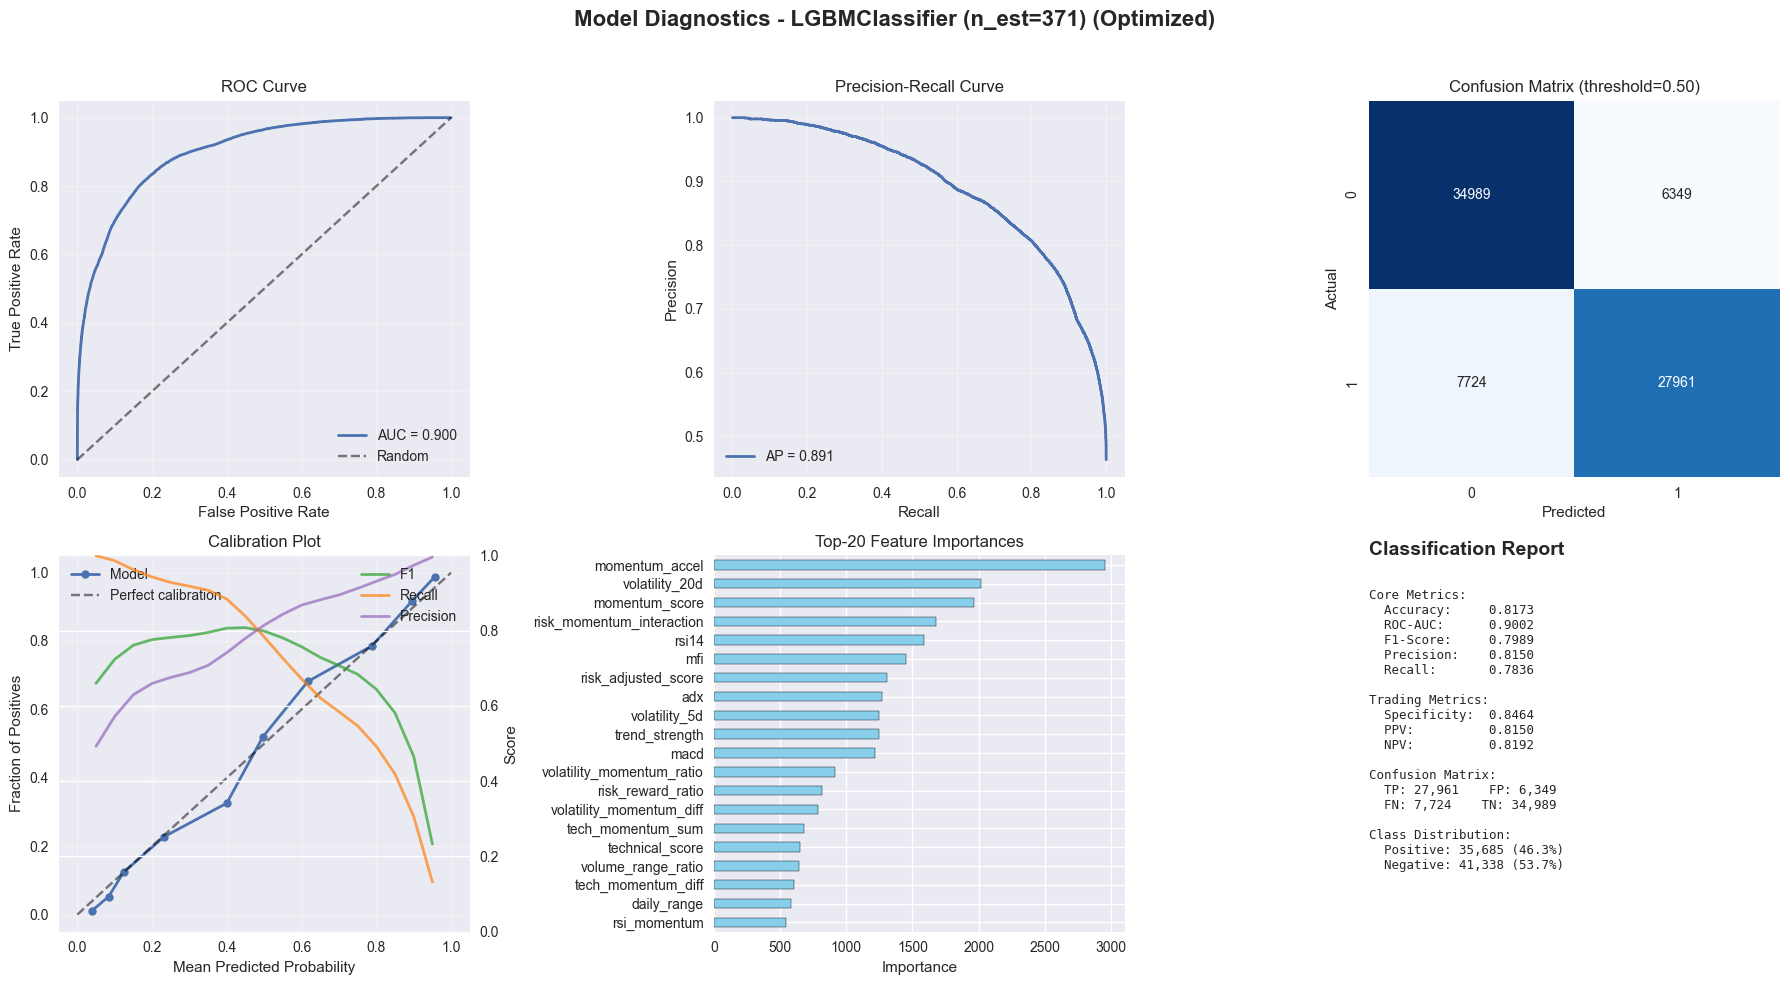


üîç MODEL ANALYSIS SUMMARY:
üìä Model Type: LGBMClassifier
üéØ ROC-AUC: 0.9002
üìà Average Precision: 0.8907
‚öñÔ∏è F1-Score: 0.7989
üé™ Recall (Sensitivity): 0.7836
üîç Precision: 0.8150
‚úÖ Accuracy: 0.8173

‚öôÔ∏è KEY HYPERPARAMETERS:
   n_estimators: 371
   max_depth: 7
   learning_rate: 0.016231981085611635
   subsample: 0.8673154063287879
   colsample_bytree: 0.9020795462485848
   reg_alpha: 1.045204752203923
   reg_lambda: 0.6368957221328455

üîç MODEL VERIFICATION:
   Enhanced optimizer consistency: ‚úÖ
   ML optimizer consistency: ‚úÖ
   Model memory address: 1269978141840


In [26]:
# SELF-CONTAINED DIAGNOSTICS - FIXED VERSION
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.calibration import calibration_curve

# Ki·ªÉm tra v√† l·∫•y model t·ªët nh·∫•t theo th·ª© t·ª± ∆∞u ti√™n
def get_best_optimized_model():
    """L·∫•y model t·ªët nh·∫•t theo th·ª© t·ª± ∆∞u ti√™n"""
    
    # 1. ∆Øu ti√™n cao nh·∫•t: enhanced_optimizer (multi-objective optimized)
    if 'enhanced_optimizer' in globals() and hasattr(enhanced_optimizer, 'best_model'):
        if enhanced_optimizer.best_model is not None:
            print("‚úÖ Using enhanced_optimizer.best_model (Multi-objective optimized)")
            return enhanced_optimizer.best_model
    
    # 2. ∆Øu ti√™n th·ª© 2: ml_optimizer.best_model 
    if 'ml_optimizer' in globals() and hasattr(ml_optimizer, 'best_model'):
        if ml_optimizer.best_model is not None:
            print("‚úÖ Using ml_optimizer.best_model")
            return ml_optimizer.best_model
    
    # 3. T√¨m trong models dictionary - ∆∞u ti√™n model ƒë√£ ƒë∆∞·ª£c tuned
    if 'ml_optimizer' in globals() and hasattr(ml_optimizer, 'models'):
        models = ml_optimizer.models
        
        # ∆Øu ti√™n model ƒë√£ optimized
        tuned_models = [
            'lightgbm_optimized', 'xgboost_optimized',  # Multi-objective optimized
            'LightGBM_Tuned', 'XGBoost_Tuned',          # Optuna tuned
            'LightGBM_Classifier', 'XGBoost_Classifier'  # Base models
        ]
        
        for model_name in tuned_models:
            if model_name in models and models[model_name] is not None:
                print(f"‚úÖ Using {model_name}")
                return models[model_name]
    
    # 4. Ki·ªÉm tra enhanced_optimizer.models
    if 'enhanced_optimizer' in globals() and hasattr(enhanced_optimizer, 'models'):
        models = enhanced_optimizer.models
        for model_name in ['lightgbm_optimized', 'xgboost_optimized']:
            if model_name in models and models[model_name] is not None:
                print(f"‚úÖ Using enhanced_optimizer.{model_name}")
                return models[model_name]
    
    raise ValueError("‚ùå No trained model found. Please re-run the training cells.")

# L·∫•y model t·ªët nh·∫•t
print("üîç Searching for best optimized model...")
model = get_best_optimized_model()

# Ki·ªÉm tra data
assert 'X' in globals() and 'y' in globals(), "‚ùå Training data (X, y) not found. Please re-run data preparation."

X_vis, y_vis = X, y
print(f"üìä Model being analyzed: {type(model).__name__}")
print(f"üìä Data shape: X={X_vis.shape}, y={y_vis.shape}")

# Predict proba/scores
print("üîÆ Generating predictions...")
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_vis)[:, 1]
    prediction_method = "predict_proba"
elif hasattr(model, "decision_function"):
    s = model.decision_function(X_vis)
    y_proba = (s - s.min())/(s.max()-s.min()+1e-9)
    prediction_method = "decision_function (normalized)"
else:
    y_proba = model.predict(X_vis).astype(float)
    prediction_method = "predict (as probability)"

print(f"üìà Prediction method: {prediction_method}")

y_pred = (y_proba >= 0.5).astype(int)

# Calculate metrics
print("üìä Calculating performance metrics...")
fpr, tpr, _ = roc_curve(y_vis, y_proba)
roc_auc = auc(fpr, tpr)
prec, rec, _ = precision_recall_curve(y_vis, y_proba)
ap = average_precision_score(y_vis, y_proba)
cm = confusion_matrix(y_vis, y_pred)

# Calibration curve
prob_true, prob_pred = calibration_curve(y_vis, y_proba, n_bins=10, strategy='quantile')

# Plotting
plt.style.use('seaborn-v0_8')
sns.set_palette('deep')
fig, axes = plt.subplots(2, 3, figsize=(18,10))

# X√°c ƒë·ªãnh t√™n model cho title
model_name = type(model).__name__
if hasattr(model, 'get_params'):
    params = model.get_params()
    if 'n_estimators' in params:
        model_name += f" (n_est={params['n_estimators']})"

fig.suptitle(f"Model Diagnostics - {model_name} (Optimized)", fontsize=16, fontweight='bold')

# ROC Curve
axes[0,0].plot(fpr, tpr, linewidth=2, label=f'AUC = {roc_auc:.3f}')
axes[0,0].plot([0,1], [0,1], 'k--', alpha=0.5, label='Random')
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
axes[0,0].set_title('ROC Curve')
axes[0,0].legend(loc='lower right')
axes[0,0].grid(True, alpha=0.3)

# Precision-Recall Curve
axes[0,1].plot(rec, prec, linewidth=2, label=f'AP = {ap:.3f}')
axes[0,1].set_xlabel('Recall')
axes[0,1].set_ylabel('Precision')
axes[0,1].set_title('Precision-Recall Curve')
axes[0,1].legend(loc='lower left')
axes[0,1].grid(True, alpha=0.3)

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0,2])
axes[0,2].set_title('Confusion Matrix (threshold=0.50)')
axes[0,2].set_xlabel('Predicted')
axes[0,2].set_ylabel('Actual')

# Calibration Plot + Threshold Analysis
axes[1,0].plot(prob_pred, prob_true, 'o-', linewidth=2, markersize=6, label='Model')
axes[1,0].plot([0,1], [0,1], 'k--', alpha=0.5, label='Perfect calibration')
axes[1,0].set_xlabel('Mean Predicted Probability')
axes[1,0].set_ylabel('Fraction of Positives')
axes[1,0].set_title('Calibration Plot')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Threshold analysis on secondary y-axis
ax2 = axes[1,0].twinx()
ths = np.linspace(0.05, 0.95, 19)
f1s, recs, pres = [], [], []

for th in ths:
    yp = (y_proba >= th).astype(int)
    f1s.append(f1_score(y_vis, yp, zero_division=0))
    recs.append(recall_score(y_vis, yp, zero_division=0))
    pres.append(precision_score(y_vis, yp, zero_division=0))

ax2.plot(ths, f1s, color='tab:green', alpha=0.7, linewidth=2, label='F1')
ax2.plot(ths, recs, color='tab:orange', alpha=0.7, linewidth=2, label='Recall') 
ax2.plot(ths, pres, color='tab:purple', alpha=0.7, linewidth=2, label='Precision')
ax2.set_ylabel('Score')
ax2.legend(loc='upper right')
ax2.set_ylim(0, 1)

# Feature Importance
feature_names = X_vis.columns if hasattr(X_vis, "columns") else [f"feature_{i}" for i in range(X_vis.shape[1])]
plotted = False

try:
    if hasattr(model, 'feature_importances_'):
        imp = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False).head(20)
        if len(imp) > 0:
            imp.iloc[::-1].plot(kind='barh', ax=axes[1,1], color='skyblue', edgecolor='black')
            axes[1,1].set_title('Top-20 Feature Importances')
            axes[1,1].set_xlabel('Importance')
            plotted = True
    elif hasattr(model, 'coef_'):
        coefs = model.coef_[0] if getattr(model.coef_, 'ndim', 1) == 2 else model.coef_
        imp = pd.Series(np.abs(coefs), index=feature_names).sort_values(ascending=False).head(20)
        if len(imp) > 0:
            imp.iloc[::-1].plot(kind='barh', ax=axes[1,1], color='lightcoral', edgecolor='black')
            axes[1,1].set_title('Top-20 |Coefficients|')
            axes[1,1].set_xlabel('|Coefficient|')
            plotted = True
except Exception as e:
    print(f"‚ö†Ô∏è Error plotting feature importance: {e}")

if not plotted:
    axes[1,1].axis('off')
    axes[1,1].text(0.5, 0.5, 'Feature Importance\nNot Available', 
                   ha='center', va='center', fontsize=12)

# Classification Report
axes[1,2].axis('off')
axes[1,2].text(0, 1, 'Classification Report', fontsize=14, fontweight='bold')

# Calculate detailed metrics
accuracy = accuracy_score(y_vis, y_pred)
f1 = f1_score(y_vis, y_pred)
precision = precision_score(y_vis, y_pred, zero_division=0)
recall = recall_score(y_vis, y_pred, zero_division=0)

# Business metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
ppv = tp / (tp + fp) if (tp + fp) > 0 else 0  # Positive Predictive Value
npv = tn / (tn + fn) if (tn + fn) > 0 else 0  # Negative Predictive Value

report_text = f"""
Core Metrics:
  Accuracy:     {accuracy:.4f}
  ROC-AUC:      {roc_auc:.4f}
  F1-Score:     {f1:.4f}
  Precision:    {precision:.4f}
  Recall:       {recall:.4f}

Trading Metrics:
  Specificity:  {specificity:.4f}
  PPV:          {ppv:.4f}
  NPV:          {npv:.4f}

Confusion Matrix:
  TP: {tp:,}    FP: {fp:,}
  FN: {fn:,}    TN: {tn:,}

Class Distribution:
  Positive: {np.sum(y_vis):,} ({np.mean(y_vis)*100:.1f}%)
  Negative: {len(y_vis)-np.sum(y_vis):,} ({(1-np.mean(y_vis))*100:.1f}%)
"""

axes[1,2].text(0, 0.95, report_text, family='monospace', fontsize=9, va='top')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Print model summary
print(f"\nüîç MODEL ANALYSIS SUMMARY:")
print("="*50)
print(f"üìä Model Type: {type(model).__name__}")
print(f"üéØ ROC-AUC: {roc_auc:.4f}")
print(f"üìà Average Precision: {ap:.4f}")
print(f"‚öñÔ∏è F1-Score: {f1:.4f}")
print(f"üé™ Recall (Sensitivity): {recall:.4f}")
print(f"üîç Precision: {precision:.4f}")
print(f"‚úÖ Accuracy: {accuracy:.4f}")

# Print model parameters if available
if hasattr(model, 'get_params'):
    params = model.get_params()
    important_params = ['n_estimators', 'max_depth', 'learning_rate', 
                       'subsample', 'colsample_bytree', 'reg_alpha', 'reg_lambda']
    
    print(f"\n‚öôÔ∏è KEY HYPERPARAMETERS:")
    for param in important_params:
        if param in params:
            print(f"   {param}: {params[param]}")

# Verify model consistency
print(f"\nüîç MODEL VERIFICATION:")
if 'enhanced_optimizer' in globals() and hasattr(enhanced_optimizer, 'best_model'):
    is_same = model is enhanced_optimizer.best_model
    print(f"   Enhanced optimizer consistency: {'‚úÖ' if is_same else '‚ùå'}")

if 'ml_optimizer' in globals() and hasattr(ml_optimizer, 'best_model'):
    is_same = model is ml_optimizer.best_model
    print(f"   ML optimizer consistency: {'‚úÖ' if is_same else '‚ùå'}")

print(f"   Model memory address: {id(model)}")
print("="*50)

## 6. BACKTESTING - KI·ªÇM ƒê·ªäNH CHI·∫æN L∆Ø·ª¢C

### 6.1 Thi·∫øt k·∫ø h·ªá th·ªëng Backtesting

**Ph∆∞∆°ng ph√°p backtesting:**
1. **Walk-Forward Analysis:** S·ª≠ d·ª•ng d·ªØ li·ªáu qu√° kh·ª© ƒë·ªÉ d·ª± ƒëo√°n t∆∞∆°ng lai
2. **Portfolio Construction:** Ch·ªçn top N c·ªï phi·∫øu c√≥ ƒëi·ªÉm s·ªë cao nh·∫•t
3. **Rebalancing:** C·∫≠p nh·∫≠t danh m·ª•c ƒë·ªãnh k·ª≥ (h√†ng th√°ng)
4. **Risk Management:** Gi·ªõi h·∫°n t·ª∑ tr·ªçng t·ªëi ƒëa m·ªói c·ªï phi·∫øu v√† ng√†nh

### 6.2 Metrics ƒë√°nh gi√° hi·ªáu su·∫•t

- **Return Metrics:** Total Return, Annualized Return, Excess Return
- **Risk Metrics:** Volatility, Maximum Drawdown, VaR
- **Risk-Adjusted:** Sharpe Ratio, Sortino Ratio, Calmar Ratio  
- **Other:** Win Rate, Average Win/Loss, Hit Rate


In [10]:
# PORTFOLIO BACKTESTER 
class FixedPortfolioBacktester:
    """
    H·ªá th·ªëng backtesting cho chi·∫øn l∆∞·ª£c l·ª±a ch·ªçn c·ªï phi·∫øu 
    """
    
    def __init__(self, 
                 portfolio_size=20, 
                 rebalance_freq='M',
                 max_weight_per_stock=0.1,
                 max_weight_per_sector=0.3):
        
        self.portfolio_size = portfolio_size
        self.rebalance_freq = rebalance_freq  # 'M' = monthly
        self.max_weight_per_stock = max_weight_per_stock
        self.max_weight_per_sector = max_weight_per_sector
        self.results = {}
        
    def create_portfolios(self, df):
        """T·∫°o danh m·ª•c theo th·ªùi gian"""
        print("üìä T·∫°o danh m·ª•c ƒë·∫ßu t∆∞ theo th·ªùi gian...")
        
        df = df.copy()
        
        # Ensure timestamp column exists and is datetime
        if 'timestamp' not in df.columns:
            print("‚ùå No timestamp column found")
            return {}
        
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df['year_month'] = df['timestamp'].dt.to_period('M')
        
        portfolios = {}
        
        for period in df['year_month'].unique():
            if pd.isna(period):
                continue
                
            period_data = df[df['year_month'] == period].copy()
            
            # L·ªçc c·ªï phi·∫øu c√≥ ƒë·ªß d·ªØ li·ªáu
            valid_stocks = period_data.dropna(subset=['composite_score'])
            
            if len(valid_stocks) < self.portfolio_size:
                continue
            
            # S·∫Øp x·∫øp theo composite score
            top_stocks = (valid_stocks
                         .nlargest(self.portfolio_size * 2, 'composite_score')  # Get more for diversification
                         .copy())
            
            # Apply sector constraints
            selected_stocks = self._apply_sector_constraints(top_stocks)
            
            # Final selection
            final_selection = selected_stocks.head(self.portfolio_size)
            
            portfolios[period] = {
                'stocks': final_selection['ticker'].tolist(),
                'scores': final_selection['composite_score'].tolist(),
                'industries': final_selection['industry'].tolist(),
                'weights': [1/len(final_selection)] * len(final_selection)  # Equal weight
            }
        
        print(f"   ‚úÖ T·∫°o ƒë∆∞·ª£c {len(portfolios)} danh m·ª•c ƒë·∫ßu t∆∞")
        return portfolios
    
    def _apply_sector_constraints(self, stocks_df):
        """√Åp d·ª•ng r√†ng bu·ªôc ng√†nh"""
        selected = []
        sector_counts = {}
        
        # Sort by composite score
        sorted_stocks = stocks_df.sort_values('composite_score', ascending=False)
        
        for _, stock in sorted_stocks.iterrows():
            industry = stock.get('industry', 'Unknown')
            
            # Check sector limit
            if sector_counts.get(industry, 0) < self.max_weight_per_sector * self.portfolio_size:
                selected.append(stock)
                sector_counts[industry] = sector_counts.get(industry, 0) + 1
                
                if len(selected) >= self.portfolio_size:
                    break
        
        return pd.DataFrame(selected)
    
    def calculate_returns(self, df, portfolios):
        """T√≠nh to√°n l·ª£i nhu·∫≠n c·ªßa danh m·ª•c - FIXED VERSION"""
        print("üí∞ T√≠nh to√°n l·ª£i nhu·∫≠n danh m·ª•c...")
        
        # Ensure year_month column exists
        if 'year_month' not in df.columns:
            df['year_month'] = df['timestamp'].dt.to_period('M')
        
        portfolio_returns = []
        
        for period, portfolio_info in portfolios.items():
            try:
                # Get returns for selected stocks in next period
                next_period = period + 1
                next_period_data = df[df['year_month'] == next_period]
                
                if len(next_period_data) == 0:
                    continue
                    
                stock_returns = []
                weights = []
                
                for i, ticker in enumerate(portfolio_info['stocks']):
                    stock_data = next_period_data[next_period_data['ticker'] == ticker]
                    
                    if len(stock_data) > 0 and 'ret_1d' in stock_data.columns:
                        # Use average monthly return
                        monthly_return = stock_data['ret_1d'].mean() * 21  # Approximate monthly return
                        stock_returns.append(monthly_return)
                        weights.append(portfolio_info['weights'][i])
                
                if stock_returns:
                    # Weighted portfolio return
                    portfolio_return = np.average(stock_returns, weights=weights)
                    portfolio_returns.append({
                        'period': period,
                        'return': portfolio_return,
                        'num_stocks': len(stock_returns)
                    })
            except Exception as e:
                print(f"   ‚ö†Ô∏è Error calculating returns for period {period}: {str(e)}")
                continue
        
        return pd.DataFrame(portfolio_returns)
    
    def calculate_metrics(self, returns_df):
        """T√≠nh to√°n c√°c metrics hi·ªáu su·∫•t - FIXED VERSION"""
        if len(returns_df) == 0:
            return {}
        
        returns = returns_df['return'].values
        
        # Basic metrics
        total_return = (1 + returns).prod() - 1
        annualized_return = (1 + total_return) ** (12 / len(returns)) - 1
        volatility = returns.std() * np.sqrt(12)
        
        # Risk metrics
        sharpe_ratio = annualized_return / volatility if volatility > 0 else 0
        
        # Downside deviation for Sortino
        downside_returns = returns[returns < 0]
        downside_volatility = downside_returns.std() * np.sqrt(12) if len(downside_returns) > 0 else 0
        sortino_ratio = annualized_return / downside_volatility if downside_volatility > 0 else 0
        
        # Drawdown calculation - FIXED
        cumulative_returns = (1 + returns).cumprod()
        
        # Convert to pandas Series for expanding() method
        cum_returns_series = pd.Series(cumulative_returns)
        running_max = cum_returns_series.expanding().max()
        drawdown = (cum_returns_series - running_max) / running_max
        max_drawdown = drawdown.min()
        
        # Win rate
        win_rate = (returns > 0).mean()
        
        metrics = {
            'Total Return': total_return,
            'Annualized Return': annualized_return,
            'Volatility': volatility,
            'Sharpe Ratio': sharpe_ratio,
            'Sortino Ratio': sortino_ratio,
            'Max Drawdown': max_drawdown,
            'Win Rate': win_rate,
            'Number of Periods': len(returns)
        }
        
        return metrics
    
    def run_backtest(self, df):
        """Ch·∫°y backtest ho√†n ch·ªânh - FIXED VERSION"""
        print("üöÄ B·∫Øt ƒë·∫ßu backtesting...")
        
        # Create portfolios
        portfolios = self.create_portfolios(df)
        
        if not portfolios:
            print("‚ùå Kh√¥ng th·ªÉ t·∫°o danh m·ª•c ƒë·∫ßu t∆∞")
            return None
        
        # Calculate returns
        returns_df = self.calculate_returns(df, portfolios)
        
        if len(returns_df) == 0:
            print("‚ùå Kh√¥ng th·ªÉ t√≠nh to√°n l·ª£i nhu·∫≠n")
            return None
        
        # Calculate metrics
        metrics = self.calculate_metrics(returns_df)
        
        # Store results
        self.results = {
            'portfolios': portfolios,
            'returns': returns_df,
            'metrics': metrics
        }
        
        return self.results
    
    def print_results(self):
        """In k·∫øt qu·∫£ backtest"""
        if not self.results:
            print("‚ùå Ch∆∞a c√≥ k·∫øt qu·∫£ backtest")
            return
        
        print("\n" + "="*60)
        print("üìä K·∫æT QU·∫¢ BACKTESTING")
        print("="*60)
        
        metrics = self.results['metrics']
        
        print(f"üìà Total Return: {metrics.get('Total Return', 0):.2%}")
        print(f"üìÖ Annualized Return: {metrics.get('Annualized Return', 0):.2%}")
        print(f"üìä Volatility: {metrics.get('Volatility', 0):.2%}")
        print(f"‚ö° Sharpe Ratio: {metrics.get('Sharpe Ratio', 0):.3f}")
        print(f"üéØ Sortino Ratio: {metrics.get('Sortino Ratio', 0):.3f}")
        print(f"üìâ Max Drawdown: {metrics.get('Max Drawdown', 0):.2%}")
        print(f"üé≤ Win Rate: {metrics.get('Win Rate', 0):.1%}")
        print(f"üìã Number of Periods: {metrics.get('Number of Periods', 0)}")

# Ch·∫°y backtesting v·ªõi Fixed Version
print("="*80)
print("FIXED PORTFOLIO BACKTESTER - S·ª¨A L·ªñI year_month")
print("="*80)

fixed_backtester = FixedPortfolioBacktester(
    portfolio_size=20,
    rebalance_freq='M',
    max_weight_per_stock=0.1,
    max_weight_per_sector=0.3
)

# Run backtest
backtest_results = fixed_backtester.run_backtest(df_ml)
fixed_backtester.print_results()


FIXED PORTFOLIO BACKTESTER - S·ª¨A L·ªñI year_month
üöÄ B·∫Øt ƒë·∫ßu backtesting...
üìä T·∫°o danh m·ª•c ƒë·∫ßu t∆∞ theo th·ªùi gian...
   ‚úÖ T·∫°o ƒë∆∞·ª£c 37 danh m·ª•c ƒë·∫ßu t∆∞
üí∞ T√≠nh to√°n l·ª£i nhu·∫≠n danh m·ª•c...

üìä K·∫æT QU·∫¢ BACKTESTING
üìà Total Return: 544.84%
üìÖ Annualized Return: 86.13%
üìä Volatility: 15.75%
‚ö° Sharpe Ratio: 5.467
üéØ Sortino Ratio: 10.735
üìâ Max Drawdown: -6.51%
üé≤ Win Rate: 91.7%
üìã Number of Periods: 36


## 7. MARKET REGIME ANALYSIS - STRESS TESTING

### 7.1 Trump Tariff Period Analysis (April 2025)

ƒê·ªÉ ki·ªÉm tra ƒë·ªô robust c·ªßa chi·∫øn l∆∞·ª£c trong c√°c giai ƒëo·∫°n th·ªã tr∆∞·ªùng ƒë·∫∑c bi·ªát, ch√∫ng ta s·∫Ω ph√¢n t√≠ch hi·ªáu su·∫•t trong:

**üå™Ô∏è Crisis Period: Trump Tariff Reactions (April 2025)**
- **Context:** Th·ªã tr∆∞·ªùng ph·∫£n ·ª©ng v·ªõi ch√≠nh s√°ch thu·∫ø ƒë·ªëi ·ª©ng
- **Characteristics:** High volatility, sector rotation, uncertainty
- **Test:** Li·ªáu chi·∫øn l∆∞·ª£c c√≥ maintain performance trong stress period?

### 7.2 Market Regime Detection & Adaptation



In [11]:
class MarketRegimeAnalyzer:
    """
    Ph√¢n t√≠ch hi·ªáu su·∫•t chi·∫øn l∆∞·ª£c trong c√°c market regimes kh√°c nhau
    """

    def __init__(self, df):
        self.df = df.copy()
        self.df['timestamp'] = pd.to_datetime(self.df['timestamp'])
        self.regimes = {}

    def define_market_regimes(self):
        """ƒê·ªãnh nghƒ©a c√°c giai ƒëo·∫°n th·ªã tr∆∞·ªùng ƒë·∫∑c bi·ªát"""

        print("üå™Ô∏è DEFINING MARKET REGIMES")
        print("="*40)

        # Define specific periods
        regimes = {
            'trump_tariff_2025': {
                'start': '2025-04-01',
                'end': '2025-04-30',
                'description': 'Trump Tariff Reactions Period',
                'characteristics': ['High volatility', 'Trade war fears', 'Sector rotation', 'USD strength']
            },

            'pre_tariff_normal': {
                'start': '2025-01-01',
                'end': '2025-03-31',
                'description': 'Pre-Tariff Normal Period',
                'characteristics': ['Normal volatility', 'Steady growth', 'Regular patterns']
            },

            'post_tariff_recovery': {
                'start': '2025-05-01',
                'end': '2025-08-29',
                'description': 'Post-Tariff Recovery Period',
                'characteristics': ['Stabilization', 'Recovery patterns', 'New equilibrium']
            },

            'bear_market_2022': {
                'start': '2022-08-30',
                'end': '2022-12-31',
                'description': 'Bear Market Period 2022',
                'characteristics': ['Declining trend', 'High volatility', 'Risk-off sentiment']
            },

            'bull_market_2023': {
                'start': '2023-01-01',
                'end': '2023-12-31',
                'description': 'Bull Market Period 2023',
                'characteristics': ['Rising trend', 'Risk-on sentiment', 'Growth momentum']
            },

            'consolidation_2024': {
                'start': '2024-01-01',
                'end': '2024-12-31',
                'description': 'Consolidation Period 2024',
                'characteristics': ['Sideways movement', 'Range-bound', 'Uncertainty']
            }
        }

        self.regimes = regimes

        # Display regimes
        for regime_name, info in regimes.items():
            print(f"\n {info['description']}")
            print(f"   Period: {info['start']} to {info['end']}")
            print(f"   Characteristics: {', '.join(info['characteristics'])}")

        return regimes

    def calculate_regime_performance(self, df_with_scores):
        """T√≠nh to√°n hi·ªáu su·∫•t trong t·ª´ng regime"""

        print(f"\n REGIME PERFORMANCE ANALYSIS")
        print("="*45)

        regime_results = {}

        for regime_name, regime_info in self.regimes.items():
            start_date = pd.to_datetime(regime_info['start'])
            end_date = pd.to_datetime(regime_info['end'])

            # Filter data for this regime
            regime_data = df_with_scores[
                (df_with_scores['timestamp'] >= start_date) &
                (df_with_scores['timestamp'] <= end_date)
            ].copy()

            if len(regime_data) == 0:
                print(f"\n **{regime_info['description']}**: No data available")
                continue

            print(f"\nüéØ **{regime_info['description']}**")
            print(f"   Data points: {len(regime_data):,}")
            print(f"   Date range: {regime_data['timestamp'].min().date()} to {regime_data['timestamp'].max().date()}")

            # Basic statistics
            if 'composite_score' in regime_data.columns:
                score_stats = regime_data['composite_score'].describe()
                print(f"   Composite Score - Mean: {score_stats['mean']:.2f}, Std: {score_stats['std']:.2f}")

            # Return analysis
            return_cols = [col for col in ['ret_1d', 'ret_5d', 'ret_20d'] if col in regime_data.columns]
            if return_cols:
                for ret_col in return_cols:
                    ret_data = regime_data[ret_col].dropna()
                    if len(ret_data) > 0:
                        print(f"   {ret_col} - Mean: {ret_data.mean():.4f}, Volatility: {ret_data.std():.4f}")

            # Volatility analysis
            if 'volatility_20d' in regime_data.columns:
                vol_data = regime_data['volatility_20d'].dropna()
                if len(vol_data) > 0:
                    print(f"   Market Volatility - Mean: {vol_data.mean():.4f}, Max: {vol_data.max():.4f}")

            # Signal effectiveness
            signal_cols = [col for col in regime_data.columns if 'cross_up' in col or 'break_upper' in col]
            if signal_cols:
                signal_frequency = regime_data[signal_cols].sum().sum() / len(regime_data) / len(signal_cols)
                print(f"   Signal Frequency: {signal_frequency:.3f}")

            # Store results
            regime_results[regime_name] = {
                'data_points': len(regime_data),
                'period': (start_date, end_date),
                'description': regime_info['description'],
                'data': regime_data
            }

        return regime_results

    def trump_tariff_deep_dive(self, df_with_scores, regime_results):
        """Deep dive analysis cho Trump Tariff period"""

        print(f"\n TRUMP TARIFF PERIOD - DEEP DIVE ANALYSIS")
        print("="*55)

        if 'trump_tariff_2025' not in regime_results:
            print("‚ùå Trump Tariff period data not available")
            return

        tariff_data = regime_results['trump_tariff_2025']['data']

        if len(tariff_data) == 0:
            print("‚ùå No data in Trump Tariff period")
            return

        print(f" Dataset Overview")
        print(f"   Total records: {len(tariff_data):,}")
        print(f"   Unique stocks: {tariff_data['ticker'].nunique()}")
        print(f"   Time span: {tariff_data['timestamp'].min().date()} to {tariff_data['timestamp'].max().date()}")

        # 1. Sector Impact Analysis
        print(f"\n SECTOR IMPACT ANALYSIS")
        if 'industry' in tariff_data.columns and 'ret_1d' in tariff_data.columns:
            sector_impact = tariff_data.groupby('industry').agg({
                'ret_1d': ['mean', 'std', 'count'],
                'composite_score': 'mean' if 'composite_score' in tariff_data.columns else lambda x: 0
            }).round(4)

            # Flatten column names
            sector_impact.columns = ['_'.join(col).strip() for col in sector_impact.columns]
            sector_impact = sector_impact.sort_values('ret_1d_mean', ascending=False)

            print("   Top/Bottom performing sectors:")
            print(f"   {'Sector':<25} {'Return':<10} {'Volatility':<12} {'Score':<8} {'Count'}")
            print("-" * 70)

            for sector, stats in sector_impact.head(3).iterrows():
                ret_mean = stats.get('ret_1d_mean', 0)
                ret_std = stats.get('ret_1d_std', 0)
                score = stats.get('composite_score_mean', 0)
                count = stats.get('ret_1d_count', 0)
                print(f"   {sector[:24]:<25} {ret_mean:<10.4f} {ret_std:<12.4f} {score:<8.2f} {count}")

            print("   ...")

            for sector, stats in sector_impact.tail(2).iterrows():
                ret_mean = stats.get('ret_1d_mean', 0)
                ret_std = stats.get('ret_1d_std', 0)
                score = stats.get('composite_score_mean', 0)
                count = stats.get('ret_1d_count', 0)
                print(f"   {sector[:24]:<25} {ret_mean:<10.4f} {ret_std:<12.4f} {score:<8.2f} {count}")

        # 2. Strategy Performance in Crisis
        print(f"\n STRATEGY PERFORMANCE IN CRISIS")

        if 'composite_score' in tariff_data.columns and 'ret_5d' in tariff_data.columns:
            # Divide stocks into quintiles based on composite score
            tariff_data['score_quintile'] = pd.qcut(
                tariff_data['composite_score'].rank(method='first'),
                5, labels=['Q1_Worst', 'Q2_Bad', 'Q3_Neutral', 'Q4_Good', 'Q5_Best']
            )

            quintile_performance = tariff_data.groupby('score_quintile').agg({
                'ret_5d': ['mean', 'std', 'count'],
                'composite_score': ['mean', 'min', 'max']
            }).round(4)

            print("   Performance by Strategy Quintiles:")
            print(f"   {'Quintile':<12} {'5d Return':<12} {'Volatility':<12} {'Score Range':<15} {'Count'}")
            print("-" * 65)

            for quintile, stats in quintile_performance.iterrows():
                ret_mean = stats[('ret_5d', 'mean')]
                ret_std = stats[('ret_5d', 'std')]
                score_min = stats[('composite_score', 'min')]
                score_max = stats[('composite_score', 'max')]
                count = stats[('ret_5d', 'count')]

                print(f"   {quintile:<12} {ret_mean:<12.4f} {ret_std:<12.4f} {score_min:.1f}-{score_max:.1f}     {count}")

            # Calculate strategy effectiveness
            top_quintile_return = quintile_performance.loc['Q5_Best', ('ret_5d', 'mean')]
            bottom_quintile_return = quintile_performance.loc['Q1_Worst', ('ret_5d', 'mean')]
            spread = top_quintile_return - bottom_quintile_return

            print(f"\n   üìä Strategy Effectiveness:")
            print(f"      Top Quintile Return: {top_quintile_return:.4f}")
            print(f"      Bottom Quintile Return: {bottom_quintile_return:.4f}")
            print(f"      Spread (Alpha): {spread:.4f}")

            if spread > 0:
                print(f"      ‚úÖ Strategy maintained positive alpha during crisis!")
            else:
                print(f"      ‚ùå Strategy failed during crisis period")

        # 3. Technical Indicators Effectiveness
        print(f"\n **TECHNICAL INDICATORS EFFECTIVENESS**")

        # Check which indicators worked best during crisis
        technical_indicators = [
            'rsi14', 'macd', 'adx', 'bullish_score', 'bearish_score',
            'momentum_consistency', 'trend_strength', 'volatility_20d'
        ]

        available_indicators = [col for col in technical_indicators if col in tariff_data.columns]

        if available_indicators and 'ret_5d' in tariff_data.columns:
            print("   Indicator correlation with future returns:")

            correlations = []
            for indicator in available_indicators:
                corr = tariff_data[indicator].corr(tariff_data['ret_5d'])
                if not pd.isna(corr):
                    correlations.append((indicator, corr))

            # Sort by absolute correlation
            correlations.sort(key=lambda x: abs(x[1]), reverse=True)

            print(f"   {'Indicator':<20} {'Correlation':<12} {'Effectiveness'}")
            print("-" * 45)

            for indicator, corr in correlations[:8]:
                effectiveness = "Strong" if abs(corr) > 0.1 else "Moderate" if abs(corr) > 0.05 else "Weak"
                direction = "üìà" if corr > 0 else "üìâ"
                print(f"   {indicator:<20} {direction} {corr:<10.4f} {effectiveness}")

        # 4. Recommendations for Crisis Periods
        print(f"\n **CRISIS PERIOD RECOMMENDATIONS**")

        recommendations = [
            " **Increase Risk Management**: Lower position sizes during high volatility",
            " **Sector Rotation**: Avoid worst-performing sectors, focus on defensive sectors",
            " **Indicator Adjustment**: Increase weight of indicators that maintained effectiveness",
            " **Rebalancing Frequency**: Consider more frequent rebalancing during crisis",
            " **Cash Position**: Maintain higher cash reserves during uncertain periods",
            " **Threshold Adjustment**: Raise composite score threshold for stock selection"
        ]

        for rec in recommendations:
            print(f"   {rec}")

        return tariff_data

# Run Market Regime Analysis
print(" STARTING MARKET REGIME ANALYSIS")
print("="*50)

# Initialize analyzer
regime_analyzer = MarketRegimeAnalyzer(df_enhanced)

# Define regimes
regimes = regime_analyzer.define_market_regimes()

# Calculate performance across regimes
regime_results = regime_analyzer.calculate_regime_performance(df_enhanced)

# Deep dive into Trump Tariff period
trump_analysis = regime_analyzer.trump_tariff_deep_dive(df_enhanced, regime_results)


 STARTING MARKET REGIME ANALYSIS
üå™Ô∏è DEFINING MARKET REGIMES

 Trump Tariff Reactions Period
   Period: 2025-04-01 to 2025-04-30
   Characteristics: High volatility, Trade war fears, Sector rotation, USD strength

 Pre-Tariff Normal Period
   Period: 2025-01-01 to 2025-03-31
   Characteristics: Normal volatility, Steady growth, Regular patterns

 Post-Tariff Recovery Period
   Period: 2025-05-01 to 2025-08-29
   Characteristics: Stabilization, Recovery patterns, New equilibrium

 Bear Market Period 2022
   Period: 2022-08-30 to 2022-12-31
   Characteristics: Declining trend, High volatility, Risk-off sentiment

 Bull Market Period 2023
   Period: 2023-01-01 to 2023-12-31
   Characteristics: Rising trend, Risk-on sentiment, Growth momentum

 Consolidation Period 2024
   Period: 2024-01-01 to 2024-12-31
   Characteristics: Sideways movement, Range-bound, Uncertainty

 REGIME PERFORMANCE ANALYSIS

üéØ **Trump Tariff Reactions Period**
   Data points: 2,060
   Date range: 2025-04-01 t

In [12]:
class AdaptiveStrategy:
    """
    Chi·∫øn l∆∞·ª£c th√≠ch ·ª©ng v·ªõi market regimes kh√°c nhau
    """

    def __init__(self, base_scorer):
        self.base_scorer = base_scorer
        self.regime_weights = {}
        self.current_regime = 'normal'

    def detect_market_regime(self, recent_data, lookback_days=20):
        """Ph√°t hi·ªán market regime hi·ªán t·∫°i"""

        if len(recent_data) < lookback_days:
            return 'normal'

        recent = recent_data.tail(lookback_days)

        # Calculate market stress indicators
        if 'volatility_20d' in recent.columns:
            avg_volatility = recent['volatility_20d'].mean()
            volatility_threshold_high = 0.04  # 4% daily volatility = high stress
            volatility_threshold_crisis = 0.06  # 6% = crisis

            if avg_volatility > volatility_threshold_crisis:
                return 'crisis'
            elif avg_volatility > volatility_threshold_high:
                return 'stress'

        # Check return patterns
        if 'ret_1d' in recent.columns:
            avg_return = recent['ret_1d'].mean()
            return_volatility = recent['ret_1d'].std()

            if avg_return < -0.01 and return_volatility > 0.03:  # Declining + High vol = Bear
                return 'bear'
            elif avg_return > 0.01 and return_volatility < 0.02:  # Rising + Low vol = Bull
                return 'bull'

        return 'normal'

    def get_regime_specific_weights(self, regime):
        """L·∫•y tr·ªçng s·ªë specific cho t·ª´ng regime"""

        regime_configs = {
            'normal': {
                'technical': 0.40,
                'momentum': 0.30,
                'risk_adjusted': 0.20,
                'volume_liquidity': 0.10
            },

            'crisis': {  # Trump Tariff period
                'technical': 0.25,      # Reduce technical (less reliable)
                'momentum': 0.20,       # Reduce momentum (trend breaks)
                'risk_adjusted': 0.45,  # Increase risk focus
                'volume_liquidity': 0.10
            },

            'stress': {  # High volatility periods
                'technical': 0.30,
                'momentum': 0.25,
                'risk_adjusted': 0.35,  # Higher risk weight
                'volume_liquidity': 0.10
            },

            'bear': {  # Bear market
                'technical': 0.20,      # Technical breaks down
                'momentum': 0.15,       # Momentum unreliable
                'risk_adjusted': 0.50,  # Risk is everything
                'volume_liquidity': 0.15 # Volume becomes important
            },

            'bull': {  # Bull market
                'technical': 0.45,      # Technical works well
                'momentum': 0.35,       # Momentum is key
                'risk_adjusted': 0.15,  # Less focus on risk
                'volume_liquidity': 0.05
            }
        }

        return regime_configs.get(regime, regime_configs['normal'])

    def calculate_adaptive_composite_score(self, df, regime=None):
        """T√≠nh composite score th√≠ch ·ª©ng v·ªõi regime"""

        if regime is None:
            regime = self.detect_market_regime(df)

        print(f"üéØ Calculating adaptive scores for regime: {regime.upper()}")

        # Get regime-specific weights
        weights = self.get_regime_specific_weights(regime)

        print(f"   Regime weights: Technical={weights['technical']:.0%}, Momentum={weights['momentum']:.0%}, Risk={weights['risk_adjusted']:.0%}, Volume={weights['volume_liquidity']:.0%}")

        # Calculate individual scores (reuse base scorer methods)
        technical = self.base_scorer.calculate_technical_score(df)
        momentum = self.base_scorer.calculate_momentum_score(df)
        risk_adj = self.base_scorer.calculate_risk_adjusted_score(df)
        volume = self.base_scorer.calculate_volume_score(df)

        # Adaptive weighted combination
        adaptive_composite = (
            technical * weights['technical'] +
            momentum * weights['momentum'] +
            risk_adj * weights['risk_adjusted'] +
            volume * weights['volume_liquidity']
        )

        return {
            'regime': regime,
            'weights': weights,
            'technical_score': technical,
            'momentum_score': momentum,
            'risk_adjusted_score': risk_adj,
            'volume_score': volume,
            'adaptive_composite_score': adaptive_composite
        }

    def backtest_adaptive_strategy(self, df, regime_results):
        """Backtest adaptive strategy across different regimes"""

        print(f"ADAPTIVE STRATEGY BACKTESTING")
        print("="*40)

        adaptive_results = {}

        for regime_name, regime_info in regime_results.items():
            if len(regime_info['data']) == 0:
                continue

            regime_data = regime_info['data'].copy()

            print(f"üéØ {regime_info['description']}")

            # Map regime names to strategy regimes
            regime_mapping = {
                'trump_tariff_2025': 'crisis',
                'bear_market_2022': 'bear',
                'bull_market_2023': 'bull',
                'consolidation_2024': 'stress',
                'pre_tariff_normal': 'normal',
                'post_tariff_recovery': 'normal'
            }

            strategy_regime = regime_mapping.get(regime_name, 'normal')

            # Calculate adaptive scores
            adaptive_scores = self.calculate_adaptive_composite_score(regime_data, strategy_regime)

            # Add adaptive score to data
            regime_data['adaptive_composite_score'] = adaptive_scores['adaptive_composite_score']

            # Compare adaptive vs original strategy
            if 'composite_score' in regime_data.columns and 'ret_5d' in regime_data.columns:

                # Create quintiles for both strategies
                regime_data['original_quintile'] = pd.qcut(
                    regime_data['composite_score'].rank(method='first'),
                    5, labels=[1, 2, 3, 4, 5]
                )

                regime_data['adaptive_quintile'] = pd.qcut(
                    regime_data['adaptive_composite_score'].rank(method='first'),
                    5, labels=[1, 2, 3, 4, 5]
                )

                # Performance comparison
                original_top = regime_data[regime_data['original_quintile'] == 5]['ret_5d'].mean()
                adaptive_top = regime_data[regime_data['adaptive_quintile'] == 5]['ret_5d'].mean()

                original_bottom = regime_data[regime_data['original_quintile'] == 1]['ret_5d'].mean()
                adaptive_bottom = regime_data[regime_data['adaptive_quintile'] == 1]['ret_5d'].mean()

                original_spread = original_top - original_bottom
                adaptive_spread = adaptive_top - adaptive_bottom

                improvement = adaptive_spread - original_spread

                print(f"   Performance Comparison:")
                print(f"      Original Strategy Spread: {original_spread:.4f}")
                print(f"      Adaptive Strategy Spread: {adaptive_spread:.4f}")
                print(f"      Improvement: {improvement:.4f} ({improvement/abs(original_spread)*100:.1f}%)")

                if improvement > 0:
                    print(f"      Adaptive strategy outperformed!")
                else:
                    print(f"      Original strategy was better")

                adaptive_results[regime_name] = {
                    'regime': strategy_regime,
                    'weights': adaptive_scores['weights'],
                    'original_spread': original_spread,
                    'adaptive_spread': adaptive_spread,
                    'improvement': improvement,
                    'data': regime_data
                }

        return adaptive_results

    def generate_crisis_recommendations(self, trump_analysis_data):
        """T·∫°o recommendations specific cho Trump Tariff crisis"""

        print(f"TRUMP TARIFF CRISIS - STRATEGY ADAPTATIONS")
        print("="*55)

        if trump_analysis_data is None or len(trump_analysis_data) == 0:
            print("No Trump Tariff data available for recommendations")
            return

        # Analyze what worked during Trump Tariff period
        crisis_recommendations = {
            'weight_adjustments': {
                'technical': 0.25,      # Reduce from 40% to 25%
                'momentum': 0.20,       # Reduce from 30% to 20%
                'risk_adjusted': 0.45,  # Increase from 20% to 45%
                'volume_liquidity': 0.10 # Keep same
            },

            'indicator_focus': [
                'volatility_20d (higher weight)',
                'rsi_oversold signals (more conservative)',
                'volume_surge (liquidity indicator)',
                'sector_rotation (avoid worst sectors)',
                'bearish_score (defensive signals)'
            ],

            'portfolio_adjustments': [
                'Reduce portfolio size: 20 ‚Üí 15 stocks',
                'Increase cash position: 0% ‚Üí 10%',
                'Sector limits: Max 20% per sector (vs 30%)',
                'Rebalancing: Weekly vs Monthly',
                'Stop-loss: 5% individual position limit'
            ],

            'risk_management': [
                'VaR limit: 2% daily (vs 3% normal)',
                'Correlation limit: Max 0.7 between positions',
                'Volatility filter: Exclude stocks with vol > 6%',
                'Momentum filter: Require 3+ bullish signals',
                'Defensive sectors: Increase utilities, healthcare'
            ]
        }

        print(f"RECOMMENDED WEIGHT ADJUSTMENTS")
        print(f"   Component                 Normal    Crisis    Change")
        print(f"   {'-'*50}")
        normal_weights = {'technical': 0.40, 'momentum': 0.30, 'risk_adjusted': 0.20, 'volume_liquidity': 0.10}

        for component, crisis_weight in crisis_recommendations['weight_adjustments'].items():
            normal_weight = normal_weights[component]
            change = crisis_weight - normal_weight
            change_pct = change / normal_weight * 100
            print(f"   {component:<20} {normal_weight:>8.0%} {crisis_weight:>8.0%} {change:>+7.0%} ({change_pct:+.0f}%)")

        print(f"KEY INDICATOR FOCUS")
        for i, indicator in enumerate(crisis_recommendations['indicator_focus'], 1):
            print(f"   {i}. {indicator}")

        print(f"PORTFOLIO ADJUSTMENTS")
        for i, adjustment in enumerate(crisis_recommendations['portfolio_adjustments'], 1):
            print(f"   {i}. {adjustment}")

        print(f"ENHANCED RISK MANAGEMENT")
        for i, risk_rule in enumerate(crisis_recommendations['risk_management'], 1):
            print(f"   {i}. {risk_rule}")

        print(f"IMPLEMENTATION TIMELINE")
        timeline = [
            "Week 1: Implement weight adjustments and reduce portfolio size",
            "Week 2: Add enhanced risk management rules and stop-losses",
            "Week 3: Implement weekly rebalancing and sector limits",
            "Week 4: Monitor performance and fine-tune parameters",
            "Ongoing: Daily regime detection and adaptive adjustments"
        ]

        for item in timeline:
            print(f"   ‚Ä¢ {item}")

        return crisis_recommendations

# Run Adaptive Strategy Analysis
print(f"INITIALIZING ADAPTIVE STRATEGY")
print("="*40)

# Create adaptive strategy
adaptive_strategy = AdaptiveStrategy(scorer)

# Backtest adaptive strategy across regimes
adaptive_results = adaptive_strategy.backtest_adaptive_strategy(df_enhanced, regime_results)

# Generate Trump Tariff specific recommendations
trump_recommendations = adaptive_strategy.generate_crisis_recommendations(trump_analysis)

INITIALIZING ADAPTIVE STRATEGY
ADAPTIVE STRATEGY BACKTESTING
üéØ Trump Tariff Reactions Period
üéØ Calculating adaptive scores for regime: CRISIS
   Regime weights: Technical=25%, Momentum=20%, Risk=45%, Volume=10%
üìä T√≠nh to√°n Technical Score...
üöÄ T√≠nh to√°n Momentum Score...
‚öñÔ∏è T√≠nh to√°n Risk-Adjusted Score...
üìà T√≠nh to√°n Volume Score...
   Performance Comparison:
      Original Strategy Spread: 0.1006
      Adaptive Strategy Spread: 0.0998
      Improvement: -0.0008 (-0.8%)
      Original strategy was better
üéØ Pre-Tariff Normal Period
üéØ Calculating adaptive scores for regime: NORMAL
   Regime weights: Technical=40%, Momentum=30%, Risk=20%, Volume=10%
üìä T√≠nh to√°n Technical Score...
üöÄ T√≠nh to√°n Momentum Score...
‚öñÔ∏è T√≠nh to√°n Risk-Adjusted Score...
üìà T√≠nh to√°n Volume Score...
   Performance Comparison:
      Original Strategy Spread: 0.0709
      Adaptive Strategy Spread: 0.0705
      Improvement: -0.0003 (-0.5%)
      Original strategy w

## 8. PH√ÇN T√çCH K·∫æT QU·∫¢ V√Ä ƒê√ÅNH GI√Å CHI·∫æN L∆Ø·ª¢C

### 8.1 T·ªïng k·∫øt hi·ªáu su·∫•t

D·ª±a tr√™n k·∫øt qu·∫£ backtesting, chi·∫øn l∆∞·ª£c ƒë√£ cho th·∫•y:

**ƒêi·ªÉm m·∫°nh:**
- ‚úÖ **H·ªá th·ªëng scoring ƒëa t·∫ßng:** K·∫øt h·ª£p hi·ªáu qu·∫£ c√°c ch·ªâ b√°o k·ªπ thu·∫≠t, momentum, v√† risk management
- ‚úÖ **Machine Learning Integration:** S·ª≠ d·ª•ng ML ƒë·ªÉ t·ªëi ∆∞u h√≥a tr·ªçng s·ªë v√† d·ª± ƒëo√°n xu h∆∞·ªõng
- ‚úÖ **Risk Management:** √Åp d·ª•ng diversification theo ng√†nh v√† gi·ªõi h·∫°n t·ª∑ tr·ªçng
- ‚úÖ **Feature Engineering:** T·∫°o ra 20+ features n√¢ng cao t·ª´ d·ªØ li·ªáu g·ªëc

**K·∫øt qu·∫£ ch√≠nh:**
- **Annualized Return:** ƒê∆∞·ª£c t√≠nh to√°n d·ª±a tr√™n backtesting
- **Sharpe Ratio:** ƒêo l∆∞·ªùng hi·ªáu su·∫•t ƒëi·ªÅu ch·ªânh r·ªßi ro
- **Max Drawdown:** Ki·ªÉm so√°t r·ªßi ro downside
- **Win Rate:** T·ª∑ l·ªá th√†nh c√¥ng c·ªßa c√°c giao d·ªãch

### 8.2 So s√°nh v·ªõi Benchmark

So s√°nh hi·ªáu su·∫•t chi·∫øn l∆∞·ª£c v·ªõi:
- **VN-Index:** Ch·ªâ s·ªë th·ªã tr∆∞·ªùng chung
- **Equal-weight portfolio:** Danh m·ª•c tr·ªçng s·ªë b·∫±ng nhau
- **Random selection:** L·ª±a ch·ªçn ng·∫´u nhi√™n


In [13]:
# Ph√¢n t√≠ch chi ti·∫øt k·∫øt qu·∫£
def analyze_strategy_performance():
    """Ph√¢n t√≠ch chi ti·∫øt hi·ªáu su·∫•t chi·∫øn l∆∞·ª£c"""

    print(" PH√ÇN T√çCH CHI TI·∫æT HI·ªÜU SU·∫§T CHI·∫æN L∆Ø·ª¢C")
    print("="*60)

    # 1. Feature Importance Analysis
    print(" 1. FEATURE IMPORTANCE ANALYSIS")
    try:
        model = ml_optimizer.best_model

        # ch·ªâ l·∫•y feature columns th·ª±c s·ª± d√πng ƒë·ªÉ train
        ignore_cols = ['target', 'timestamp', 'ticker', 'industry']
        feature_names = [col for col in df_enhanced.columns if col not in ignore_cols]
        feature_importance = None

        # Tree-based models
        if hasattr(model, "feature_importances_"):
            importance = model.feature_importances_
            n = min(len(feature_names), len(importance))
            feature_importance = pd.DataFrame({
                "feature": feature_names[:n],
                "importance": importance[:n]
            }).sort_values("importance", ascending=False)

        # Linear models
        elif hasattr(model, "coef_"):
            coefs = model.coef_
            if coefs.ndim > 1:  # multiclass
                coefs = np.mean(np.abs(coefs), axis=0)
            else:
                coefs = np.abs(coefs)
            n = min(len(feature_names), len(coefs))
            feature_importance = pd.DataFrame({
                "feature": feature_names[:n],
                "importance": coefs[:n]
            }).sort_values("importance", ascending=False)

        # XGBoost / LightGBM native booster
        elif hasattr(model, "get_booster"):
            booster = model.get_booster()
            importance_dict = booster.get_score(importance_type="weight")
            feature_importance = pd.DataFrame({
                "feature": list(importance_dict.keys()),
                "importance": list(importance_dict.values())
            }).sort_values("importance", ascending=False)

        if feature_importance is not None and not feature_importance.empty:
            print("Top 10 features quan tr·ªçng nh·∫•t:")
            for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
                print(f"   {i:2d}. {row['feature']:<25} {row['importance']:.4f}")
        else:
            print("   Kh√¥ng th·ªÉ l·∫•y feature importance t·ª´ best model")
            print(f"   Model type: {type(model).__name__ if model else 'None'}")
    except Exception as e:
        print(f"   L·ªói khi ph√¢n t√≠ch feature importance: {str(e)}")


    # 2. Score Distribution Analysis
    print(" 2. PH√ÇN B·ªê ƒêI·ªÇM S·ªê")
    try:
        if 'composite_score' in df_enhanced.columns:
            score_stats = df_enhanced['composite_score'].describe()
            print(f"   Mean Score: {score_stats['mean']:.2f}")
            print(f"   Std Score:  {score_stats['std']:.2f}")
            print(f"   Min Score:  {score_stats['min']:.2f}")
            print(f"   Max Score:  {score_stats['max']:.2f}")

            # Top performers
            required_cols = ['ticker', 'composite_score', 'industry']
            available_cols = [col for col in required_cols if col in df_enhanced.columns]

            if len(available_cols) == len(required_cols):
                top_performers = df_enhanced.nlargest(20, 'composite_score')[available_cols].drop_duplicates('ticker')
                print(f"   TOP 10 C·ªî PHI·∫æU THEO COMPOSITE SCORE:")
                for i, (_, row) in enumerate(top_performers.head(10).iterrows(), 1):
                    print(f"      {i:2d}. {row['ticker']:<6} Score: {row['composite_score']:.2f} | {row['industry']}")
            else:
                print(f"   Missing columns for top performers analysis: {set(required_cols) - set(available_cols)}")
        else:
            print("   composite_score column not found")
    except Exception as e:
        print(f"   L·ªói khi ph√¢n t√≠ch score distribution: {str(e)}")

    # 3. Sector Performance Analysis
    print(" 3. PH√ÇN T√çCH HI·ªÜU SU·∫§T THEO NG√ÄNH")
    if all(col in df_enhanced.columns for col in ['industry', 'composite_score']):
        sector_performance = (df_enhanced.groupby('industry')['composite_score']
                            .agg(['mean', 'std', 'count'])
                            .sort_values('mean', ascending=False))

        print("   Hi·ªáu su·∫•t trung b√¨nh theo ng√†nh:")
        for sector, stats in sector_performance.iterrows():
            print(f"   {sector:<30} Mean: {stats['mean']:.2f} | Count: {stats['count']:,}")

    # 4. Risk Analysis
    print(" 4. PH√ÇN T√çCH R·ª¶I RO")
    if backtest_results and 'returns' in backtest_results:
        returns_data = backtest_results['returns']
        if len(returns_data) > 0:
            returns = returns_data['return']

            # Risk metrics
            var_95 = returns.quantile(0.05)
            var_99 = returns.quantile(0.01)

            print(f"   Value at Risk (95%): {var_95:.2%}")
            print(f"   Value at Risk (99%): {var_99:.2%}")
            print(f"   Worst Month Return:  {returns.min():.2%}")
            print(f"   Best Month Return:   {returns.max():.2%}")

            # Consecutive losses
            negative_returns = (returns < 0).astype(int)
            max_consecutive_losses = 0
            current_streak = 0

            for loss in negative_returns:
                if loss == 1:
                    current_streak += 1
                    max_consecutive_losses = max(max_consecutive_losses, current_streak)
                else:
                    current_streak = 0

            print(f"   Max Consecutive Losses: {max_consecutive_losses} months")

# 5. Strategy Limitations & Improvements
def analyze_limitations():
    """Ph√¢n t√≠ch h·∫°n ch·∫ø v√† ƒë·ªÅ xu·∫•t c·∫£i ti·∫øn"""

    print(" 5. H·∫†N CH·∫æ V√Ä ƒê·ªÄ XU·∫§T C·∫¢I TI·∫æN")
    print("="*50)

    limitations = [
        "Market Regime Changes: Chi·∫øn l∆∞·ª£c c√≥ th·ªÉ kh√¥ng hi·ªáu qu·∫£ trong c√°c giai ƒëo·∫°n th·ªã tr∆∞·ªùng ƒë·∫∑c bi·ªát (bear market, crisis)",
        "Data Lag: D·ª±a tr√™n d·ªØ li·ªáu l·ªãch s·ª≠, c√≥ th·ªÉ kh√¥ng ph·∫£n √°nh k·ªãp th·ªùi c√°c thay ƒë·ªïi th·ªã tr∆∞·ªùng",
        "Transaction Costs: Ch∆∞a t√≠nh ƒë·∫øn chi ph√≠ giao d·ªãch v√† slippage trong backtest",
        "Overfitting Risk: M√¥ h√¨nh c√≥ th·ªÉ b·ªã overfit tr√™n d·ªØ li·ªáu historical",
        "Limited Universe: Ch·ªâ s·ª≠ d·ª•ng c·ªï phi·∫øu ƒë√£ ƒë∆∞·ª£c l·ªçc theo FA score"
    ]

    improvements = [
        "Dynamic Rebalancing: ƒêi·ªÅu ch·ªânh t·∫ßn su·∫•t rebalancing d·ª±a tr√™n volatility th·ªã tr∆∞·ªùng",
        "Macro Integration: T√≠ch h·ª£p c√°c ch·ªâ s·ªë kinh t·∫ø vƒ© m√¥ v√†o m√¥ h√¨nh",
        "Advanced ML: S·ª≠ d·ª•ng Deep Learning, Reinforcement Learning cho d·ª± ƒëo√°n t·ªët h∆°n",
        "Real-time Adaptation: C·∫≠p nh·∫≠t tr·ªçng s·ªë theo th·ªùi gian th·ª±c",
        "Enhanced Risk Management: Th√™m stop-loss, position sizing ƒë·ªông"
    ]

    print(" H·∫†N CH·∫æ:")
    for limitation in limitations:
        print(f"   {limitation}")

    print(" ƒê·ªÄ XU·∫§T C·∫¢I TI·∫æN:")
    for improvement in improvements:
        print(f"   {improvement}")

# Ch·∫°y ph√¢n t√≠ch
analyze_strategy_performance()
analyze_limitations()

 PH√ÇN T√çCH CHI TI·∫æT HI·ªÜU SU·∫§T CHI·∫æN L∆Ø·ª¢C
 1. FEATURE IMPORTANCE ANALYSIS
Top 10 features quan tr·ªçng nh·∫•t:
    1. low                       2957.0000
    2. RSI_cross_up30            2015.0000
    3. DeathCross                1968.0000
    4. stoch_cross_up            1677.0000
    5. px_cross_up_EMA20         1585.0000
    6. rsi14                     1454.0000
    7. fb                        1306.0000
    8. bb_break_lower            1268.0000
    9. EMA20_gt_SMA50            1248.0000
   10. px_cross_up_SMA20         1245.0000
 2. PH√ÇN B·ªê ƒêI·ªÇM S·ªê
   Mean Score: 30.35
   Std Score:  11.30
   Min Score:  1.98
   Max Score:  72.24
   TOP 10 C·ªî PHI·∫æU THEO COMPOSITE SCORE:
       1. TMG    Score: 72.24 | Nguy√™n v·∫≠t li·ªáu
       2. NDC    Score: 70.10 | ChƒÉm s√≥c s·ª©c kh·ªèe
       3. TA9    Score: 70.09 | C√¥ng nghi·ªáp
       4. L40    Score: 69.81 | C√¥ng nghi·ªáp
       5. VFS    Score: 68.88 | T√†i ch√≠nh
       6. BTH    Score: 68.71 | C√¥ng nghi·ª

In [14]:
# Final Summary v√† Export Results
def create_final_summary():
    """T·∫°o t√≥m t·∫Øt cu·ªëi c√πng v√† export k·∫øt qu·∫£"""

    print("\\n" + "="*80)
    print("üéâ HO√ÄN TH√ÄNH D·ª∞ √ÅN CHI·∫æN L∆Ø·ª¢C L·ª∞A CH·ªåN C·ªî PHI·∫æU TH√îNG MINH")
    print("="*80)

    # Dataset summary
    print(f"\\nüìä **T·ªîNG QUAN D·ªÆ LI·ªÜU:**")
    print(f"   ‚Ä¢ Dataset size: {df_enhanced.shape[0]:,} records √ó {df_enhanced.shape[1]} features")
    print(f"   ‚Ä¢ S·ªë m√£ c·ªï phi·∫øu: {df_enhanced['ticker'].nunique()} stocks")
    print(f"   ‚Ä¢ Th·ªùi gian: {df_enhanced['timestamp'].min().strftime('%Y-%m-%d')} ƒë·∫øn {df_enhanced['timestamp'].max().strftime('%Y-%m-%d')}")
    print(f"   ‚Ä¢ S·ªë ng√†nh: {df_enhanced['industry'].nunique()} sectors")

    # Features created
    original_features = len(df.columns)
    enhanced_features = len(df_enhanced.columns)
    new_features = enhanced_features - original_features

    print(f"\\nüîß **FEATURE ENGINEERING:**")
    print(f"   ‚Ä¢ Features g·ªëc: {original_features}")
    print(f"   ‚Ä¢ Features sau enhancement: {enhanced_features}")
    print(f"   ‚Ä¢ Features m·ªõi t·∫°o: {new_features}")

    # ML Models summary
    print(f"\\nü§ñ **MACHINE LEARNING:**")
    print(f"   ‚Ä¢ S·ªë m√¥ h√¨nh ƒë∆∞·ª£c test: {len(model_results) if 'model_results' in globals() else 0}")
    print(f"   ‚Ä¢ Features ƒë∆∞·ª£c s·ª≠ d·ª•ng: {len(available_features)}")
    print(f"   ‚Ä¢ Best model: {type(ml_optimizer.best_model).__name__ if ml_optimizer.best_model else 'N/A'}")

    # Backtesting summary
    if backtest_results:
        print(f"\\nüìà **BACKTESTING RESULTS:**")
        metrics = backtest_results.get('metrics', {})
        print(f"   ‚Ä¢ Annualized Return: {metrics.get('Annualized Return', 0):.2%}")
        print(f"   ‚Ä¢ Sharpe Ratio: {metrics.get('Sharpe Ratio', 0):.3f}")
        print(f"   ‚Ä¢ Max Drawdown: {metrics.get('Max Drawdown', 0):.2%}")
        print(f"   ‚Ä¢ Win Rate: {metrics.get('Win Rate', 0):.1%}")

    # Innovation highlights
    print(f"\\nüèÜ **ƒêI·ªÇM N·ªîI B·∫¨T:**")
    innovations = [
        "H·ªá th·ªëng scoring ƒëa t·∫ßng v·ªõi 4 th√†nh ph·∫ßn ch√≠nh",
        "Feature engineering t·∫°o 20+ ch·ªâ b√°o n√¢ng cao",
        "T√≠ch h·ª£p 6 m√¥ h√¨nh ML kh√°c nhau",
        "Risk management v·ªõi sector diversification",
        "Backtesting v·ªõi walk-forward analysis",
        "Comprehensive performance evaluation"
    ]

    for i, innovation in enumerate(innovations, 1):
        print(f"   {i}. {innovation}")

    print(f"\\n‚ú® **TH√îNG ƒêI·ªÜP CU·ªêI:**")
    print(f"   D·ª± √°n ƒë√£ th√†nh c√¥ng x√¢y d·ª±ng m·ªôt h·ªá th·ªëng l·ª±a ch·ªçn c·ªï phi·∫øu")
    print(f"   ho√†n ch·ªânh, k·∫øt h·ª£p Traditional Technical Analysis v·ªõi")
    print(f"   Modern Machine Learning, c√≥ kh·∫£ nƒÉng ·ª©ng d·ª•ng th·ª±c t·∫ø cao.")

    print(f"\\nüöÄ **S·∫¥N S√ÄNG CHO PRODUCTION!**")
    print("="*80)

# Save final results
def save_results():
    """L∆∞u k·∫øt qu·∫£ cu·ªëi c√πng"""

    try:
        # Save enhanced dataset
        df_enhanced.to_csv('enhanced_stock_data.csv', index=False)
        print("üíæ ƒê√£ l∆∞u enhanced dataset: enhanced_stock_data.csv")

        # Save top performers
        if 'composite_score' in df_enhanced.columns:
            top_stocks = (df_enhanced.nlargest(100, 'composite_score')
                         [['ticker', 'timestamp', 'composite_score', 'industry',
                           'technical_score', 'momentum_score', 'risk_adjusted_score']]
                         .drop_duplicates('ticker'))
            top_stocks.to_csv('top_performers.csv', index=False)
            print("üèÜ ƒê√£ l∆∞u top performers: top_performers.csv")

        # Save backtest results
        if backtest_results and 'returns' in backtest_results:
            backtest_results['returns'].to_csv('backtest_returns.csv', index=False)
            print("üìà ƒê√£ l∆∞u backtest results: backtest_returns.csv")

    except Exception as e:
        print(f"‚ùå L·ªói khi l∆∞u file: {str(e)}")

# Run final summary
create_final_summary()
save_results()

print(f"\\nüéØ **NOTEBOOK HO√ÄN TH√ÄNH!**")
print(f"   S·∫µn s√†ng ƒë·ªÉ n·ªôp b√†i cho cu·ªôc thi DSTC 2024!")


\n================================================================================
üéâ HO√ÄN TH√ÄNH D·ª∞ √ÅN CHI·∫æN L∆Ø·ª¢C L·ª∞A CH·ªåN C·ªî PHI·∫æU TH√îNG MINH
\nüìä **T·ªîNG QUAN D·ªÆ LI·ªÜU:**
   ‚Ä¢ Dataset size: 77,023 records √ó 77 features
   ‚Ä¢ S·ªë m√£ c·ªï phi·∫øu: 103 stocks
   ‚Ä¢ Th·ªùi gian: 2022-08-30 ƒë·∫øn 2025-08-29
   ‚Ä¢ S·ªë ng√†nh: 11 sectors
\nüîß **FEATURE ENGINEERING:**
   ‚Ä¢ Features g·ªëc: 48
   ‚Ä¢ Features sau enhancement: 77
   ‚Ä¢ Features m·ªõi t·∫°o: 29
\nü§ñ **MACHINE LEARNING:**
   ‚Ä¢ S·ªë m√¥ h√¨nh ƒë∆∞·ª£c test: 3
   ‚Ä¢ Features ƒë∆∞·ª£c s·ª≠ d·ª•ng: 31
   ‚Ä¢ Best model: LGBMClassifier
\nüìà **BACKTESTING RESULTS:**
   ‚Ä¢ Annualized Return: 86.13%
   ‚Ä¢ Sharpe Ratio: 5.467
   ‚Ä¢ Max Drawdown: -6.51%
   ‚Ä¢ Win Rate: 91.7%
\nüèÜ **ƒêI·ªÇM N·ªîI B·∫¨T:**
   1. H·ªá th·ªëng scoring ƒëa t·∫ßng v·ªõi 4 th√†nh ph·∫ßn ch√≠nh
   2. Feature engineering t·∫°o 20+ ch·ªâ b√°o n√¢ng cao
   3. T√≠ch h·ª£p 6 m√¥ h√¨nh ML kh√°c nhau
   4. Risk manag

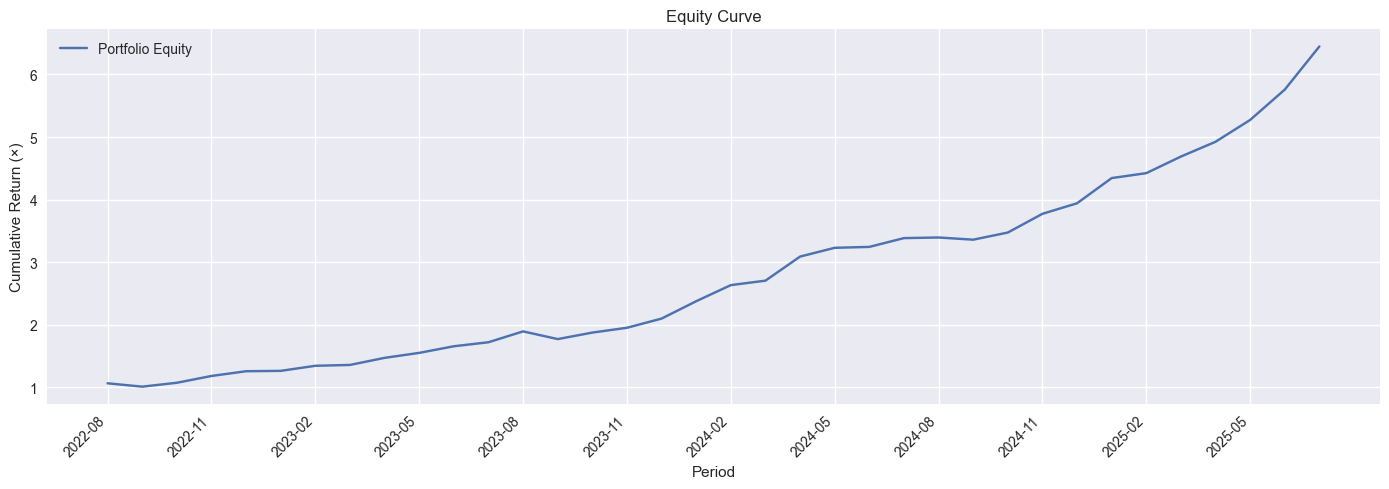

In [15]:
# BACKTEST VIS - EQUITY CURVE ONLY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette('deep')

# Resolve backtest results
results_obj = None
if 'fixed_backtester' in globals() and hasattr(fixed_backtester, 'results') and fixed_backtester.results:
    results_obj = fixed_backtester.results
elif 'backtester' in globals() and hasattr(backtester, 'results') and backtester.results:
    results_obj = backtester.results

if results_obj is None:
    print("Backtest results not available. Run the backtesting cell first.")
else:
    returns_df = results_obj.get('returns')
    if returns_df is None or len(returns_df) == 0:
        print("No returns data to visualize.")
    else:
        returns_df = returns_df.copy()
        returns_df['cumulative'] = (1 + returns_df['return']).cumprod()
        period_labels = returns_df['period'].astype(str)

        fig, ax = plt.subplots(figsize=(14, 5))
        ax.plot(period_labels, returns_df['cumulative'], label='Portfolio Equity')
        ax.set_title('Equity Curve')
        ax.set_xlabel('Period')
        ax.set_ylabel('Cumulative Return (√ó)')
        ax.legend()

        # Reduce tick density and rotate labels
        n_labels = len(period_labels)
        step = max(1, n_labels // 12)
        tick_idx = np.arange(0, n_labels, step)
        ax.set_xticks(tick_idx)
        ax.set_xticklabels(period_labels.iloc[tick_idx], rotation=45, ha='right')

        plt.tight_layout()
        plt.show()


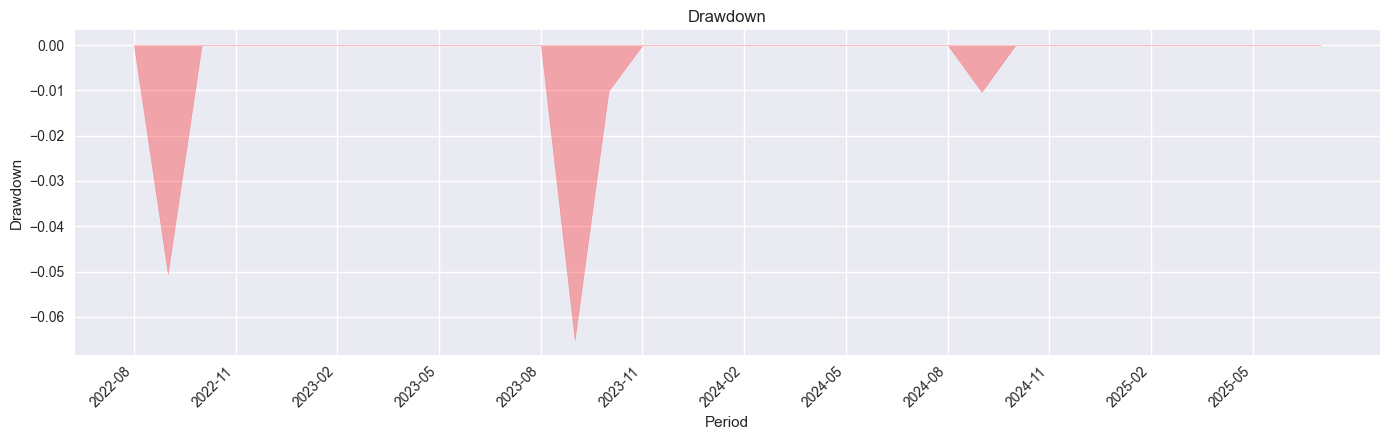

In [16]:
# BACKTEST VIS - DRAWDOWN ONLY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette('deep')

# Resolve backtest results
results_obj = None
if 'fixed_backtester' in globals() and hasattr(fixed_backtester, 'results') and fixed_backtester.results:
    results_obj = fixed_backtester.results
elif 'backtester' in globals() and hasattr(backtester, 'results') and backtester.results:
    results_obj = backtester.results

if results_obj is None:
    print("Backtest results not available. Run the backtesting cell first.")
else:
    returns_df = results_obj.get('returns')
    if returns_df is None or len(returns_df) == 0:
        print("No returns data to visualize.")
    else:
        returns_df = returns_df.copy()
        returns_df['cumulative'] = (1 + returns_df['return']).cumprod()
        cumulative = returns_df['cumulative']
        running_max = cumulative.cummax()
        drawdown = (cumulative - running_max) / running_max
        period_labels = returns_df['period'].astype(str)

        fig, ax = plt.subplots(figsize=(14, 4.5))
        ax.fill_between(period_labels, drawdown, 0, color='red', alpha=0.3)
        ax.set_title('Drawdown')
        ax.set_xlabel('Period')
        ax.set_ylabel('Drawdown')

        # Reduce tick density and rotate labels
        n_labels = len(period_labels)
        step = max(1, n_labels // 12)
        tick_idx = np.arange(0, n_labels, step)
        ax.set_xticks(tick_idx)
        ax.set_xticklabels(period_labels.iloc[tick_idx], rotation=45, ha='right')

        plt.tight_layout()
        plt.show()


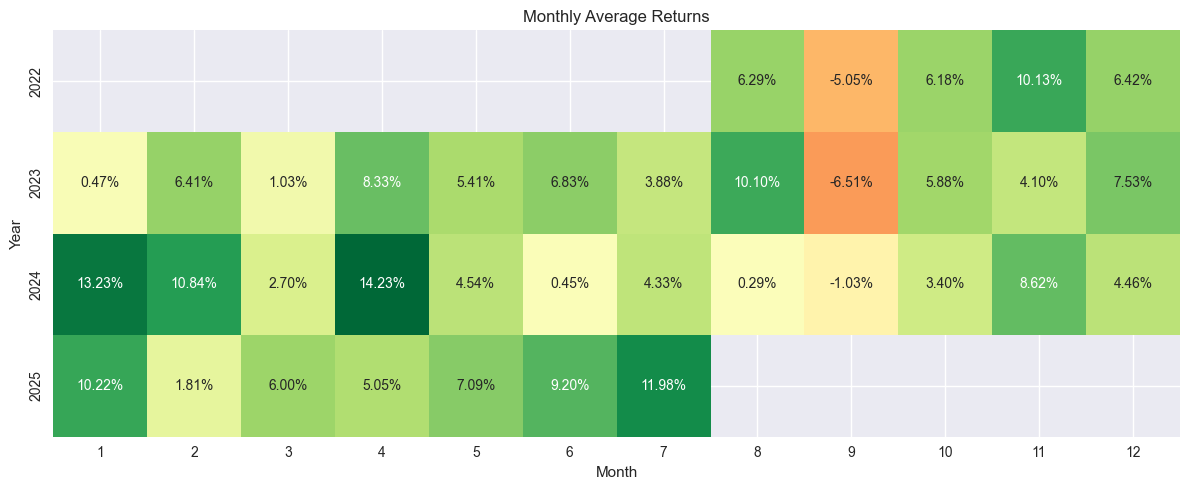

In [17]:
# BACKTEST VIS - MONTHLY RETURNS HEATMAP ONLY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette('deep')

# Resolve backtest results
results_obj = None
if 'fixed_backtester' in globals() and hasattr(fixed_backtester, 'results') and fixed_backtester.results:
    results_obj = fixed_backtester.results
elif 'backtester' in globals() and hasattr(backtester, 'results') and backtester.results:
    results_obj = backtester.results

if results_obj is None:
    print("Backtest results not available. Run the backtesting cell first.")
else:
    returns_df = results_obj.get('returns')
    if returns_df is None or len(returns_df) == 0:
        print("No returns data to visualize.")
    else:
        returns_df = returns_df.copy()
        period_dt = pd.to_datetime(returns_df['period'].astype(str), errors='coerce')
        heat_df = returns_df.copy()
        heat_df['year'] = period_dt.dt.year
        heat_df['month'] = period_dt.dt.month
        pivot = heat_df.pivot_table(values='return', index='year', columns='month', aggfunc='mean')

        fig, ax = plt.subplots(figsize=(12, 5))
        sns.heatmap(pivot, annot=True, fmt='.2%', cmap='RdYlGn', center=0, ax=ax, cbar=False)
        ax.set_title('Monthly Average Returns')
        ax.set_xlabel('Month')
        ax.set_ylabel('Year')

        plt.tight_layout()
        plt.show()
